# Market Mix Modeling


In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/Projects/Market Mix Modeling/

/content/drive/MyDrive/Projects/Market Mix Modeling


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from datetime import datetime, date

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

## Import the data

### Consumer Electornics

In [4]:
# Import the Consumer Electronics Data
ConsumerElectronics = pd.read_csv('ConsumerElectronics.csv')
ConsumerElectronics.head()

fsn_id           order_date  Year  Month      order_id  \
0  ACCCX3S58G7B5F6P  2015-10-17 15:11:54  2015     10  3.419301e+15   
1  ACCCX3S58G7B5F6P  2015-10-19 10:07:22  2015     10  1.420831e+15   
2  ACCCX3S5AHMF55FV  2015-10-20 15:45:56  2015     10  2.421913e+15   
3  ACCCX3S5AHMF55FV  2015-10-14 12:05:15  2015     10  4.416592e+15   
4  ACCCX3S5AHMF55FV  2015-10-17 21:25:03  2015     10  4.419525e+15   

   order_item_id   gmv  units deliverybdays deliverycdays  \
0   3.419301e+15  6400      1            \N            \N   
1   1.420831e+15  6900      1            \N            \N   
2   2.421913e+15  1990      1            \N            \N   
3   4.416592e+15  1690      1            \N            \N   
4   4.419525e+15  1618      1            \N            \N   

  s1_fact.order_payment_type  sla                 cust_id  \
0                        COD    5  -1.01299130778588E+018   
1                        COD    7  -8.99032457905512E+018   
2                        COD   10   -1.0404429420466E+018   
3                    Prepaid    4  -7.60496084352714E+018   
4                    Prepaid    6    2.8945572083453E+018   

                  pincode product_analytic_super_category  \
0  -7.79175582905735E+018                              CE   
1   7.33541149097431E+018                              CE   
2  -7.47768776228657E+018                              CE   
3  -5.83593163877661E+018                              CE   
4   5.34735360997242E+017                              CE   

  product_analytic_category product_analytic_sub_category  \
0           CameraAccessory               CameraAccessory   
1           CameraAccessory               CameraAccessory   
2           CameraAccessory               CameraAccessory   
3           CameraAccessory               CameraAccessory   
4           CameraAccessory               CameraAccessory   

  product_analytic_vertical  product_mrp  product_procurement_sla  
0              CameraTripod         7190                        0  
1              CameraTripod         7190                        0  
2              CameraTripod         2099                        3  
3              CameraTripod         2099                        3  
4              CameraTripod         2099                        3

In [5]:
# Removing '\N' and whitespaces
ConsumerElectronics = pd.read_csv("ConsumerElectronics.csv", na_values=['\\N', ' '])
print(ConsumerElectronics.shape)
ConsumerElectronics.head()

(1648824, 20)


fsn_id           order_date  Year  Month      order_id  \
0  ACCCX3S58G7B5F6P  2015-10-17 15:11:54  2015     10  3.419301e+15   
1  ACCCX3S58G7B5F6P  2015-10-19 10:07:22  2015     10  1.420831e+15   
2  ACCCX3S5AHMF55FV  2015-10-20 15:45:56  2015     10  2.421913e+15   
3  ACCCX3S5AHMF55FV  2015-10-14 12:05:15  2015     10  4.416592e+15   
4  ACCCX3S5AHMF55FV  2015-10-17 21:25:03  2015     10  4.419525e+15   

   order_item_id     gmv  units  deliverybdays  deliverycdays  \
0   3.419301e+15  6400.0      1            NaN            NaN   
1   1.420831e+15  6900.0      1            NaN            NaN   
2   2.421913e+15  1990.0      1            NaN            NaN   
3   4.416592e+15  1690.0      1            NaN            NaN   
4   4.419525e+15  1618.0      1            NaN            NaN   

  s1_fact.order_payment_type  sla       cust_id       pincode  \
0                        COD    5 -1.012991e+18 -7.791756e+18   
1                        COD    7 -8.990325e+18  7.335411e+18   
2                        COD   10 -1.040443e+18 -7.477688e+18   
3                    Prepaid    4 -7.604961e+18 -5.835932e+18   
4                    Prepaid    6  2.894557e+18  5.347354e+17   

  product_analytic_super_category product_analytic_category  \
0                              CE           CameraAccessory   
1                              CE           CameraAccessory   
2                              CE           CameraAccessory   
3                              CE           CameraAccessory   
4                              CE           CameraAccessory   

  product_analytic_sub_category product_analytic_vertical  product_mrp  \
0               CameraAccessory              CameraTripod         7190   
1               CameraAccessory              CameraTripod         7190   
2               CameraAccessory              CameraTripod         2099   
3               CameraAccessory              CameraTripod         2099   
4               CameraAccessory              CameraTripod         2099   

   product_procurement_sla  
0                        0  
1                        0  
2                        3  
3                        3  
4                        3

In [6]:
ConsumerElectronics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   fsn_id                           1648824 non-null  object 
 1   order_date                       1648824 non-null  object 
 2   Year                             1648824 non-null  int64  
 3   Month                            1648824 non-null  int64  
 4   order_id                         1648824 non-null  float64
 5   order_item_id                    1648824 non-null  float64
 6   gmv                              1643920 non-null  float64
 7   units                            1648824 non-null  int64  
 8   deliverybdays                    335852 non-null   float64
 9   deliverycdays                    335853 non-null   float64
 10  s1_fact.order_payment_type       1648824 non-null  object 
 11  sla                              1648824 non-null 

In [7]:
#Count of orders for each of the sub categories
ConsumerElectronics.product_analytic_sub_category.value_counts()

product_analytic_sub_category
Speaker                543928
CameraAccessory        239508
GamingAccessory        201899
TVVideoSmall           142995
HomeAudio              124860
Game                   114406
AudioMP3Player         112892
Camera                 101172
GamingConsole           29059
CameraStorage           17985
AudioAccessory          11713
HomeTheatre              4254
AmplifierReceiver        4056
GameMembershipCards        97
Name: count, dtype: int64

In [8]:
#Count of orders for the required three sub categories
sub_cats = ['CameraAccessory','GamingAccessory','HomeAudio']
odrs = ConsumerElectronics[ConsumerElectronics['product_analytic_sub_category'].isin(sub_cats)]
odrs.shape

(566267, 20)

## Data Cleaning and Preparation

In [9]:
unq_orders = len(ConsumerElectronics.drop_duplicates(subset = ["order_id"], keep = False))/len(ConsumerElectronics)*100
print("Percentage of unique orders for all the sub categories:", round(unq_orders, 2), '%')

Percentage of unique orders for all the sub categories: 83.02 %


In [10]:
# Check for duplicates
ConsumerElectronics.duplicated().sum()

104843

In [11]:
# Drop duplicates
ConsumerElectronics = ConsumerElectronics.drop_duplicates(subset = ["order_date", "order_id", "order_item_id" ,"units"], keep = 'first', inplace = False)

In [12]:
# Correct the data types
ConsumerElectronics['order_datetime'] = pd.to_datetime(ConsumerElectronics['order_date'], format='%Y-%m-%d %H:%M:%S')

# Removing sceintific notation in the below columns
ConsumerElectronics['cust_id'] = ConsumerElectronics['cust_id'].apply(lambda x: '{:.0f}'.format(x))
ConsumerElectronics['order_id'] = ConsumerElectronics['order_id'].apply(lambda x: '{:.0f}'.format(x))
ConsumerElectronics['order_item_id'] = ConsumerElectronics['order_item_id'].apply(lambda x: '{:.0f}'.format(x))
ConsumerElectronics['pincode'] = ConsumerElectronics['pincode'].apply(lambda x: '{:.0f}'.format(x))

In [13]:
# Creating the order_date column from order_datetime column
ConsumerElectronics['order_date'] = ConsumerElectronics['order_datetime'].dt.date

In [14]:
# As per the inputs from business, filtering out the data for the dates which are lying beyond the scope of modelling i.e. July 2015 to June 2016
start_date = pd.to_datetime("2015-07-01").date()
end_date = pd.to_datetime("2016-06-30").date()

ConsumerElectronics = ConsumerElectronics.loc[(ConsumerElectronics['order_date']>=start_date) & (ConsumerElectronics['order_date']<=end_date)]

In [15]:
# As per the inputs from business, the modelling is to be done on weekly aggregated data. Hence, creating the order_week column
ConsumerElectronics['order_week'] = ConsumerElectronics['order_datetime'].dt.isocalendar().week

In [16]:
ConsumerElectronics.head()

fsn_id  order_date  Year  Month          order_id  \
0  ACCCX3S58G7B5F6P  2015-10-17  2015     10  3419300926147000   
1  ACCCX3S58G7B5F6P  2015-10-19  2015     10  1420830839915200   
2  ACCCX3S5AHMF55FV  2015-10-20  2015     10  2421912925714800   
3  ACCCX3S5AHMF55FV  2015-10-14  2015     10  4416592101738400   
4  ACCCX3S5AHMF55FV  2015-10-17  2015     10  4419525153426400   

      order_item_id     gmv  units  deliverybdays  deliverycdays  ...  \
0  3419300926147000  6400.0      1            NaN            NaN  ...   
1  1420830839915200  6900.0      1            NaN            NaN  ...   
2  2421912925714800  1990.0      1            NaN            NaN  ...   
3  4416592101738400  1690.0      1            NaN            NaN  ...   
4  4419525153426400  1618.0      1            NaN            NaN  ...   

                cust_id               pincode product_analytic_super_category  \
0  -1012991307785880064  -7791755829057349632                              CE   
1  -8990324579055120384   7335411490974310400                              CE   
2  -1040442942046599936  -7477687762286570496                              CE   
3  -7604960843527140352  -5835931638776609792                              CE   
4   2894557208345299968    534735360997241984                              CE   

  product_analytic_category product_analytic_sub_category  \
0           CameraAccessory               CameraAccessory   
1           CameraAccessory               CameraAccessory   
2           CameraAccessory               CameraAccessory   
3           CameraAccessory               CameraAccessory   
4           CameraAccessory               CameraAccessory   

  product_analytic_vertical product_mrp product_procurement_sla  \
0              CameraTripod        7190                       0   
1              CameraTripod        7190                       0   
2              CameraTripod        2099                       3   
3              CameraTripod        2099                       3   
4              CameraTripod        2099                       3   

       order_datetime  order_week  
0 2015-10-17 15:11:54          42  
1 2015-10-19 10:07:22          43  
2 2015-10-20 15:45:56          43  
3 2015-10-14 12:05:15          42  
4 2015-10-17 21:25:03          42  

[5 rows x 22 columns]

In [17]:
# Check for null values
round(100*(ConsumerElectronics.isnull().sum()/len(ConsumerElectronics.index)),2).sort_values(ascending = False)

deliverybdays                      78.29
deliverycdays                      78.29
product_analytic_vertical           0.38
gmv                                 0.26
fsn_id                              0.00
pincode                             0.00
order_datetime                      0.00
product_procurement_sla             0.00
product_mrp                         0.00
product_analytic_sub_category       0.00
product_analytic_category           0.00
product_analytic_super_category     0.00
sla                                 0.00
cust_id                             0.00
order_date                          0.00
s1_fact.order_payment_type          0.00
units                               0.00
order_item_id                       0.00
order_id                            0.00
Month                               0.00
Year                                0.00
order_week                          0.00
dtype: float64

In [18]:
# Dropping the deliverybdays & deliverycdays columns as they consist of high %age of null values
ConsumerElectronics.drop(['deliverybdays', 'deliverycdays'], axis = 1, inplace = True)

# Drop the rows with null values in product_analytic_vertical & gmv
ConsumerElectronics = ConsumerElectronics.loc[~pd.isnull(ConsumerElectronics['product_analytic_vertical'])]
ConsumerElectronics = ConsumerElectronics.loc[~pd.isnull(ConsumerElectronics['gmv'])]

round(100*(ConsumerElectronics.isnull().sum()/len(ConsumerElectronics.index)),2).sort_values(ascending = False)

fsn_id                             0.0
order_date                         0.0
order_datetime                     0.0
product_procurement_sla            0.0
product_mrp                        0.0
product_analytic_vertical          0.0
product_analytic_sub_category      0.0
product_analytic_category          0.0
product_analytic_super_category    0.0
pincode                            0.0
cust_id                            0.0
sla                                0.0
s1_fact.order_payment_type         0.0
units                              0.0
gmv                                0.0
order_item_id                      0.0
order_id                           0.0
Month                              0.0
Year                               0.0
order_week                         0.0
dtype: float64

In [19]:
# Function to review & update the order_week data to make it contineous
def ordWeek(order_week,year):
    if((year == 2016) & (order_week <= 26)):
         return order_week+53
    else:
        return order_week

ConsumerElectronics['order_week'] = ConsumerElectronics.apply(lambda x: ordWeek(x['order_week'],x['Year']), axis = 1)
ConsumerElectronics.head()

fsn_id  order_date  Year  Month          order_id  \
0  ACCCX3S58G7B5F6P  2015-10-17  2015     10  3419300926147000   
1  ACCCX3S58G7B5F6P  2015-10-19  2015     10  1420830839915200   
2  ACCCX3S5AHMF55FV  2015-10-20  2015     10  2421912925714800   
3  ACCCX3S5AHMF55FV  2015-10-14  2015     10  4416592101738400   
4  ACCCX3S5AHMF55FV  2015-10-17  2015     10  4419525153426400   

      order_item_id     gmv  units s1_fact.order_payment_type  sla  \
0  3419300926147000  6400.0      1                        COD    5   
1  1420830839915200  6900.0      1                        COD    7   
2  2421912925714800  1990.0      1                        COD   10   
3  4416592101738400  1690.0      1                    Prepaid    4   
4  4419525153426400  1618.0      1                    Prepaid    6   

                cust_id               pincode product_analytic_super_category  \
0  -1012991307785880064  -7791755829057349632                              CE   
1  -8990324579055120384   7335411490974310400                              CE   
2  -1040442942046599936  -7477687762286570496                              CE   
3  -7604960843527140352  -5835931638776609792                              CE   
4   2894557208345299968    534735360997241984                              CE   

  product_analytic_category product_analytic_sub_category  \
0           CameraAccessory               CameraAccessory   
1           CameraAccessory               CameraAccessory   
2           CameraAccessory               CameraAccessory   
3           CameraAccessory               CameraAccessory   
4           CameraAccessory               CameraAccessory   

  product_analytic_vertical  product_mrp  product_procurement_sla  \
0              CameraTripod         7190                        0   
1              CameraTripod         7190                        0   
2              CameraTripod         2099                        3   
3              CameraTripod         2099                        3   
4              CameraTripod         2099                        3   

       order_datetime  order_week  
0 2015-10-17 15:11:54          42  
1 2015-10-19 10:07:22          43  
2 2015-10-20 15:45:56          43  
3 2015-10-14 12:05:15          42  
4 2015-10-17 21:25:03          42

In [20]:
# Drop the transactions with product mrp is 0
ConsumerElectronics = ConsumerElectronics.loc[ConsumerElectronics['product_mrp'] != 0]

# Drop the transactions where gmv is 0
ConsumerElectronics = ConsumerElectronics.loc[~(ConsumerElectronics['gmv'] == 0)]

In [21]:
# verifying the changes for gmv
len(ConsumerElectronics[ConsumerElectronics['gmv'] == 0.0])

0

In [22]:
# verifying the changes for product_mrp
len(ConsumerElectronics[ConsumerElectronics['product_mrp'] == 0.0])

0

In [23]:
# Drop the records where gmv is grater than or equal to the mrp*units since this cannot be a possibility
ConsumerElectronics = ConsumerElectronics.loc[~(ConsumerElectronics['gmv'] >= (ConsumerElectronics['product_mrp'] * ConsumerElectronics['units']))]

In [24]:
# Handle Outliers
ConsumerElectronics.describe()

Year         Month           gmv         units           sla  \
count  1.467103e+06  1.467103e+06  1.467103e+06  1.467103e+06  1.467103e+06   
mean   2.015555e+03  6.415980e+00  2.484728e+03  1.021674e+00  5.700812e+00   
min    2.015000e+03  1.000000e+00  1.000000e+01  1.000000e+00  0.000000e+00   
25%    2.015000e+03  3.000000e+00  3.390000e+02  1.000000e+00  4.000000e+00   
50%    2.016000e+03  6.000000e+00  7.490000e+02  1.000000e+00  6.000000e+00   
75%    2.016000e+03  1.000000e+01  1.989000e+03  1.000000e+00  7.000000e+00   
max    2.016000e+03  1.200000e+01  2.269470e+05  5.000000e+01  6.100000e+01   
std    4.969987e-01  3.694485e+00  5.685659e+03  2.508206e-01  2.746443e+00   

        product_mrp  product_procurement_sla                 order_datetime  \
count  1.467103e+06             1.467103e+06                        1467103   
mean   4.231029e+03             3.719294e+00  2016-01-18 06:54:37.548634624   
min    4.900000e+01            -1.000000e+00            2015-07-01 00:36:11   
25%    8.000000e+02             1.000000e+00     2015-10-28 22:51:09.500000   
50%    1.599000e+03             2.000000e+00            2016-01-20 09:38:41   
75%    3.499000e+03             3.000000e+00            2016-04-07 05:30:32   
max    2.999990e+05             1.000000e+03            2016-06-30 23:59:55   
std    8.730596e+03             3.432401e+01                            NaN   

         order_week  
count  1.467103e+06  
mean   5.552986e+01  
min    2.700000e+01  
25%    4.400000e+01  
50%    5.600000e+01  
75%    6.700000e+01  
max    7.900000e+01  
std    1.353432e+01

<Axes: >

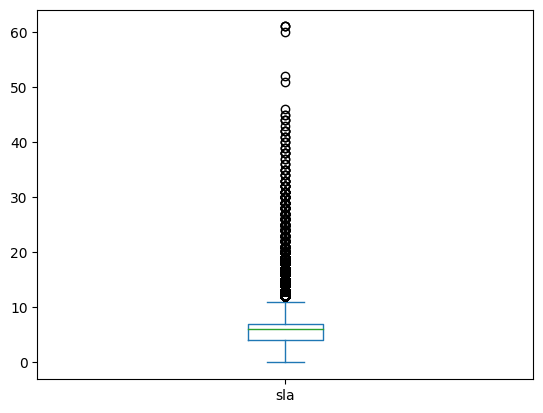

In [25]:
ConsumerElectronics['sla'].plot.box()

In [26]:
# where sla is more than 30 days
len(ConsumerElectronics.loc[ConsumerElectronics['sla'] > 30])/len(ConsumerElectronics)

4.8394693487778295e-05

In [27]:
# Drop the records as SLA of more than 30 days too rare & next to impossible
ConsumerElectronics = ConsumerElectronics.loc[ConsumerElectronics['sla'] <= 30]

# Drop the records with negative values of product_procurement_sla
ConsumerElectronics = ConsumerElectronics.loc[ConsumerElectronics['product_procurement_sla'] >= 0]

<Axes: >

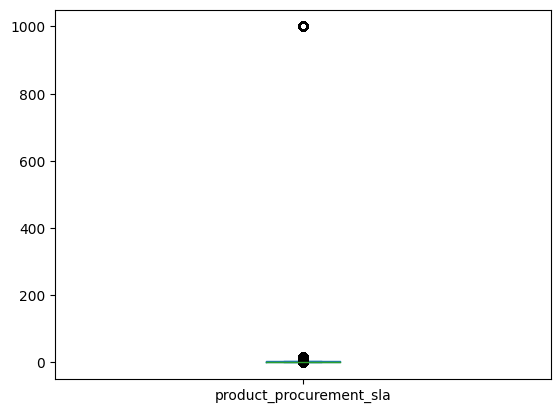

In [28]:
ConsumerElectronics['product_procurement_sla'].plot.box()

In [29]:
ConsumerElectronics['product_procurement_sla'].value_counts()/len(ConsumerElectronics.index)*100

product_procurement_sla
2       34.286591
3       19.470758
1       19.373871
5       13.927688
4        7.702707
0        2.637808
6        0.836604
7        0.790403
15       0.433465
14       0.338714
1000     0.123440
13       0.034242
8        0.030967
9        0.005909
12       0.004058
10       0.002776
Name: count, dtype: float64

From the above observation consider only those records where product_procurement_sla is less than or equal to 15 days.

In [30]:
ConsumerElectronics = ConsumerElectronics.loc[ConsumerElectronics['product_procurement_sla'] <= 15]

In [31]:
# Segment the dataset for the required three sub-categories
ConsumerElectronics = ConsumerElectronics[(ConsumerElectronics['product_analytic_sub_category']=='GamingAccessory')|(ConsumerElectronics['product_analytic_sub_category']=='CameraAccessory')|(ConsumerElectronics['product_analytic_sub_category']=='HomeAudio')]

print(ConsumerElectronics.shape)
ConsumerElectronics.head()

(493569, 20)


fsn_id  order_date  Year  Month          order_id  \
0  ACCCX3S58G7B5F6P  2015-10-17  2015     10  3419300926147000   
1  ACCCX3S58G7B5F6P  2015-10-19  2015     10  1420830839915200   
2  ACCCX3S5AHMF55FV  2015-10-20  2015     10  2421912925714800   
3  ACCCX3S5AHMF55FV  2015-10-14  2015     10  4416592101738400   
4  ACCCX3S5AHMF55FV  2015-10-17  2015     10  4419525153426400   

      order_item_id     gmv  units s1_fact.order_payment_type  sla  \
0  3419300926147000  6400.0      1                        COD    5   
1  1420830839915200  6900.0      1                        COD    7   
2  2421912925714800  1990.0      1                        COD   10   
3  4416592101738400  1690.0      1                    Prepaid    4   
4  4419525153426400  1618.0      1                    Prepaid    6   

                cust_id               pincode product_analytic_super_category  \
0  -1012991307785880064  -7791755829057349632                              CE   
1  -8990324579055120384   7335411490974310400                              CE   
2  -1040442942046599936  -7477687762286570496                              CE   
3  -7604960843527140352  -5835931638776609792                              CE   
4   2894557208345299968    534735360997241984                              CE   

  product_analytic_category product_analytic_sub_category  \
0           CameraAccessory               CameraAccessory   
1           CameraAccessory               CameraAccessory   
2           CameraAccessory               CameraAccessory   
3           CameraAccessory               CameraAccessory   
4           CameraAccessory               CameraAccessory   

  product_analytic_vertical  product_mrp  product_procurement_sla  \
0              CameraTripod         7190                        0   
1              CameraTripod         7190                        0   
2              CameraTripod         2099                        3   
3              CameraTripod         2099                        3   
4              CameraTripod         2099                        3   

       order_datetime  order_week  
0 2015-10-17 15:11:54          42  
1 2015-10-19 10:07:22          43  
2 2015-10-20 15:45:56          43  
3 2015-10-14 12:05:15          42  
4 2015-10-17 21:25:03          42

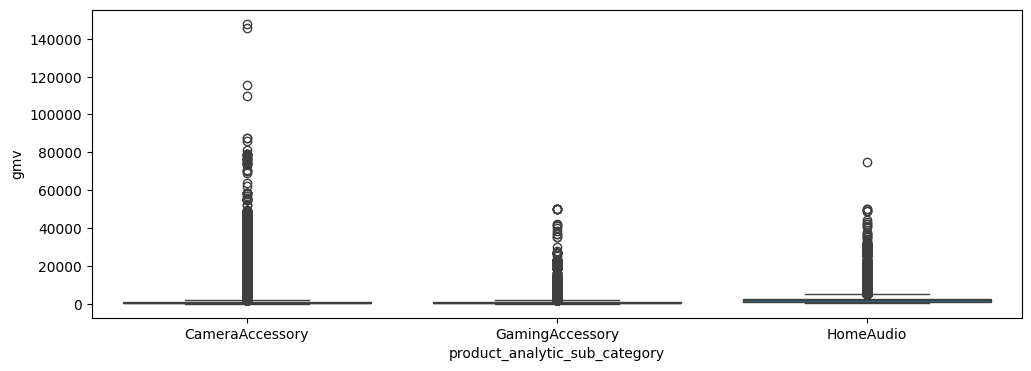

In [32]:
# Check outlier in GMV for each of the category
plt.figure(figsize = (12,4))
sns.boxplot(y = 'gmv',data = ConsumerElectronics, x = 'product_analytic_sub_category')
plt.show()

In [33]:
# Cap the gmv values for each of the categories to 0.95 quantile
cam_q95 = ConsumerElectronics.loc[(ConsumerElectronics['product_analytic_sub_category'] == 'CameraAccessory')]['gmv'].quantile(0.95)
gam_q95 = ConsumerElectronics.loc[(ConsumerElectronics['product_analytic_sub_category'] == 'GamingAccessory')]['gmv'].quantile(0.95)
hom_q95 = ConsumerElectronics.loc[(ConsumerElectronics['product_analytic_sub_category'] == 'HomeAudio')]['gmv'].quantile(0.95)

camera = ConsumerElectronics.loc[(ConsumerElectronics['product_analytic_sub_category'] == 'CameraAccessory') & (ConsumerElectronics['gmv'] < cam_q95)]
gaming = ConsumerElectronics.loc[(ConsumerElectronics['product_analytic_sub_category'] == 'GamingAccessory') & (ConsumerElectronics['gmv'] < gam_q95)]
homeaudio = ConsumerElectronics.loc[(ConsumerElectronics['product_analytic_sub_category'] == 'HomeAudio') & (ConsumerElectronics['gmv'] < hom_q95)]

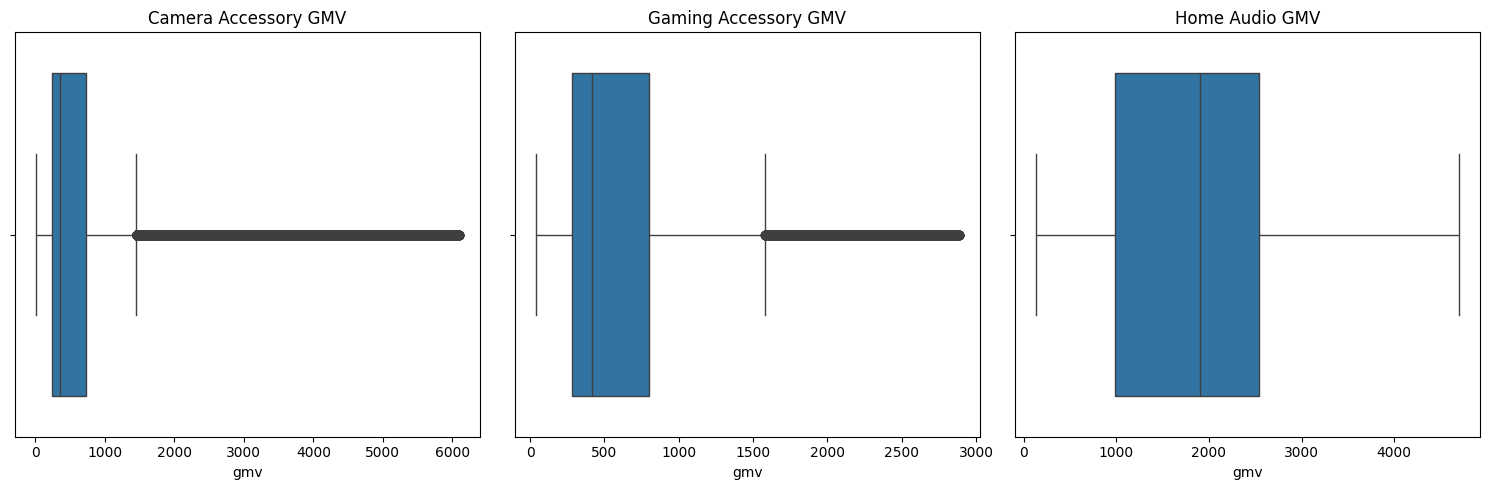

In [34]:
# Check the Outliers for GMV for each of the category

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot for CameraAccessory
sns.boxplot(ax=axes[0], x=camera['gmv'])
axes[0].set_title('Camera Accessory GMV')

# Plot for GamingAccessory
sns.boxplot(ax=axes[1], x=gaming['gmv'])
axes[1].set_title('Gaming Accessory GMV')

# Plot for HomeAudio
sns.boxplot(ax=axes[2], x=homeaudio['gmv'])
axes[2].set_title('Home Audio GMV')

plt.tight_layout()
plt.show()

In [35]:
# Concat the three categoris to a single dataframe
ConsumerElectronics = pd.concat([camera, gaming, homeaudio], axis = 0)
print(ConsumerElectronics.shape)
ConsumerElectronics.head()

(468850, 20)


fsn_id  order_date  Year  Month          order_id  \
2  ACCCX3S5AHMF55FV  2015-10-20  2015     10  2421912925714800   
3  ACCCX3S5AHMF55FV  2015-10-14  2015     10  4416592101738400   
4  ACCCX3S5AHMF55FV  2015-10-17  2015     10  4419525153426400   
5  ACCCX3S5JGAJETYR  2015-10-17  2015     10  3419188825145600   
6  ACCCX3S5JGAJETYR  2015-10-16  2015     10  3418428515041500   

      order_item_id     gmv  units s1_fact.order_payment_type  sla  \
2  2421912925714800  1990.0      1                        COD   10   
3  4416592101738400  1690.0      1                    Prepaid    4   
4  4419525153426400  1618.0      1                    Prepaid    6   
5  3419188825145600  3324.0      1                    Prepaid    5   
6  3418428515041500  3695.0      1                    Prepaid    6   

                cust_id               pincode product_analytic_super_category  \
2  -1040442942046599936  -7477687762286570496                              CE   
3  -7604960843527140352  -5835931638776609792                              CE   
4   2894557208345299968    534735360997241984                              CE   
5  -7641546361891739648  -1919052697560310016                              CE   
6    -71561404148106600   6404913202077570048                              CE   

  product_analytic_category product_analytic_sub_category  \
2           CameraAccessory               CameraAccessory   
3           CameraAccessory               CameraAccessory   
4           CameraAccessory               CameraAccessory   
5           CameraAccessory               CameraAccessory   
6           CameraAccessory               CameraAccessory   

  product_analytic_vertical  product_mrp  product_procurement_sla  \
2              CameraTripod         2099                        3   
3              CameraTripod         2099                        3   
4              CameraTripod         2099                        3   
5              CameraTripod         4044                        5   
6              CameraTripod         4044                        5   

       order_datetime  order_week  
2 2015-10-20 15:45:56          43  
3 2015-10-14 12:05:15          42  
4 2015-10-17 21:25:03          42  
5 2015-10-17 12:07:24          42  
6 2015-10-16 14:59:57          42

In [36]:
# Drop the columns which are of no use for modelling
ConsumerElectronics.drop(['fsn_id','order_item_id','pincode','product_analytic_super_category','product_analytic_category'], inplace = True, axis = 1)

# Converting the data type of week, month & year to integer
ConsumerElectronics['Year'] = ConsumerElectronics['Year'].astype('int')
ConsumerElectronics['Month'] = ConsumerElectronics['Month'].astype('int')
ConsumerElectronics['order_week'] = ConsumerElectronics['order_week'].astype('int')

ConsumerElectronics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 468850 entries, 2 to 1542377
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_date                     468850 non-null  object        
 1   Year                           468850 non-null  int64         
 2   Month                          468850 non-null  int64         
 3   order_id                       468850 non-null  object        
 4   gmv                            468850 non-null  float64       
 5   units                          468850 non-null  int64         
 6   s1_fact.order_payment_type     468850 non-null  object        
 7   sla                            468850 non-null  int64         
 8   cust_id                        468850 non-null  object        
 9   product_analytic_sub_category  468850 non-null  object        
 10  product_analytic_vertical      468850 non-null  object        
 11  prod

## Exploratory Data Analysis

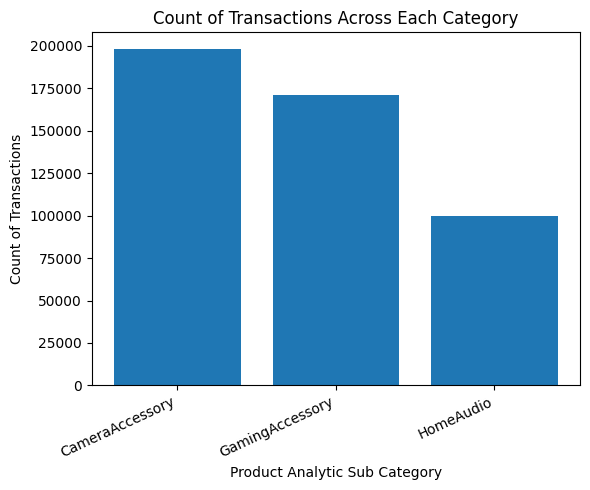

In [37]:
# Count the transactions in each sub-category
transaction_counts = ConsumerElectronics['product_analytic_sub_category'].value_counts()

plt.figure(figsize = (6,5))
plt.bar(transaction_counts.index, transaction_counts.values)
plt.title('Count of Transactions Across Each Category')
plt.xlabel('Product Analytic Sub Category')
plt.ylabel('Count of Transactions')
plt.xticks(rotation=25, ha="right")
plt.tight_layout()
plt.show()

From the above plot we can see that the maximum orders were placed for Camera Accessory followed by Gaming Accessory & then Home Audio

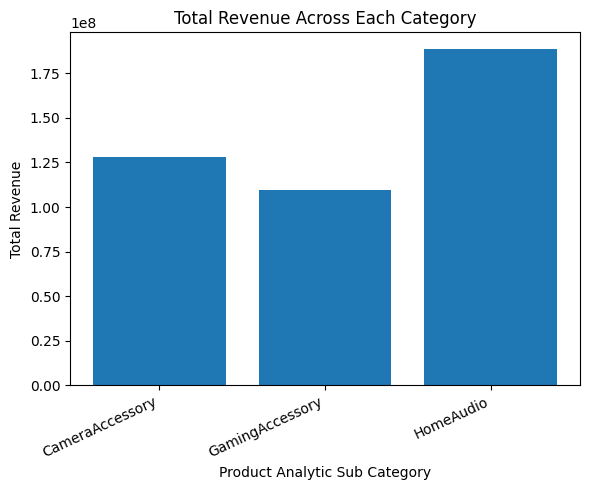

In [38]:
# Calculate total revenue across each category
total_revenue= ConsumerElectronics.groupby('product_analytic_sub_category')['gmv'].sum().reset_index()

plt.figure(figsize = (6,5))
plt.bar(total_revenue['product_analytic_sub_category'], total_revenue['gmv'])
plt.title('Total Revenue Across Each Category')
plt.xlabel('Product Analytic Sub Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=25, ha="right")
plt.tight_layout()
plt.show()

We can see that the highest revenue was generated from Home Audio followed by Camera Accessory & then Gamming Accessory

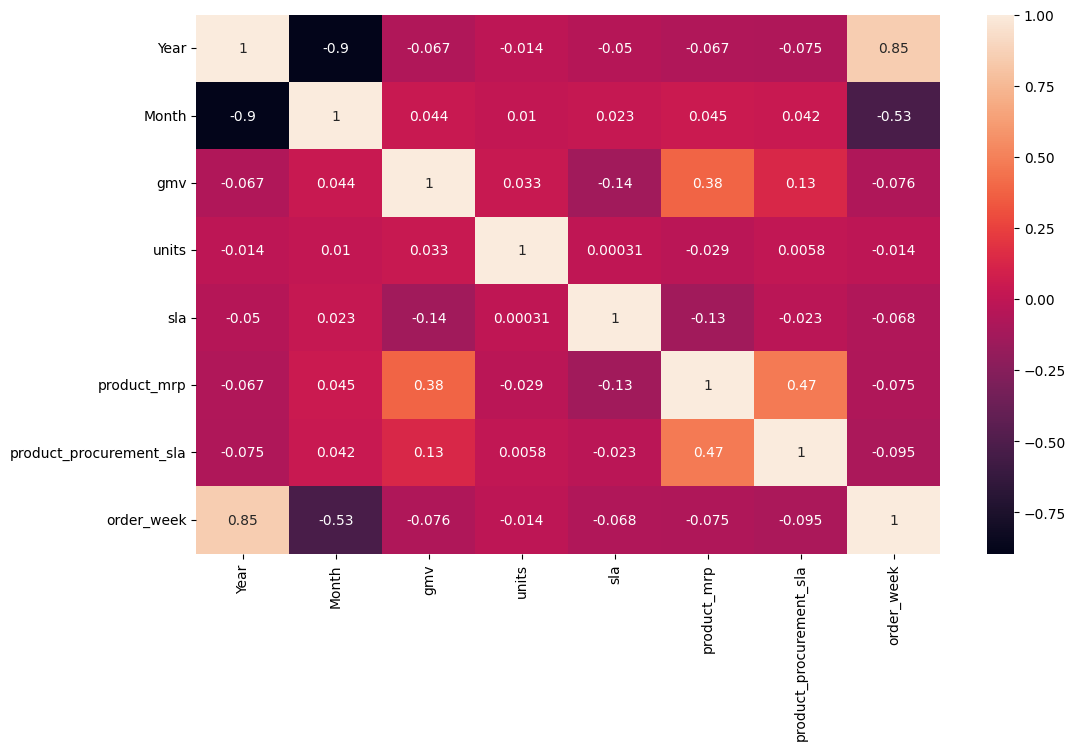

In [39]:
# Correlation Analysis
plt.figure(figsize = (12,7))
numerical_features = ConsumerElectronics.select_dtypes(include=['number'])
sns.heatmap(numerical_features.corr(), annot=True)
plt.show()

* There is a high correlation between Month & Year and Order Week & Year.
* Moderate correlation observed between Product MRP & Product Procurement SLA and GMV & Product MRP.

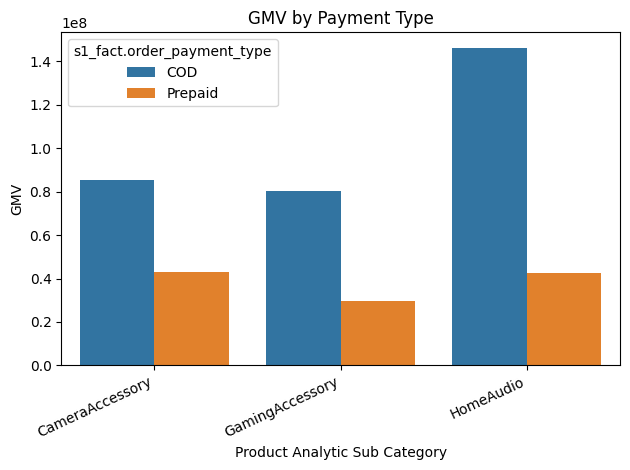

In [40]:
# Analyze GMV(revenue) by payment type for each of the product category.
gmv_by_paymentType = ConsumerElectronics.groupby(["s1_fact.order_payment_type","product_analytic_sub_category"])['gmv'].sum().reset_index()

sns.barplot(x='product_analytic_sub_category', y='gmv', hue="s1_fact.order_payment_type", data=gmv_by_paymentType)
plt.title('GMV by Payment Type')
plt.xlabel('Product Analytic Sub Category')
plt.ylabel('GMV')
plt.xticks(rotation=25, ha="right")
plt.tight_layout()
plt.show()

* The highest revenue generated by COD orders was from Home Audio followed by Camera Accessory and then Gaming Accessory.
* For the Prepaid orders, the highest revenue was generated from Camera Accessory, followed by Home Audio and then Gaming Accessory.

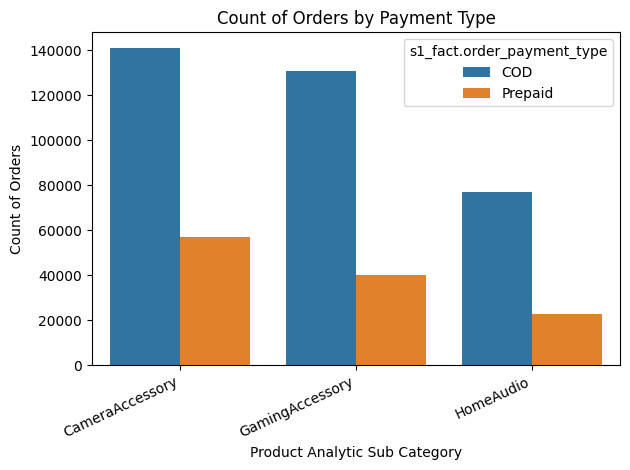

In [41]:
# Analyze the count of orders for each of the sub-categories by Payment Type
orders_by_PaymentType = ConsumerElectronics.groupby(["s1_fact.order_payment_type","product_analytic_sub_category"])['gmv'].count().reset_index().rename(columns={'gmv':'Count_of_Orders'})

sns.barplot(x='product_analytic_sub_category', y='Count_of_Orders', hue="s1_fact.order_payment_type", data=orders_by_PaymentType)
plt.title('Count of Orders by Payment Type')
plt.xlabel('Product Analytic Sub Category')
plt.ylabel('Count of Orders')
plt.xticks(rotation=25, ha="right")
plt.tight_layout()
plt.show()

The highest count of orders was generated from the Camera Accessory followed by Gaming Accessory and then Home Audio for both the payment types.

In [42]:
# Create seperate datasets for each product sub categories
gamingAcc = ConsumerElectronics[(ConsumerElectronics['product_analytic_sub_category']=='GamingAccessory')].drop('product_analytic_sub_category', axis = 1)
print(gamingAcc.shape)

cameraAcc = ConsumerElectronics[(ConsumerElectronics['product_analytic_sub_category']=='CameraAccessory')].drop('product_analytic_sub_category', axis = 1)
print(cameraAcc.shape)

homeAudio = ConsumerElectronics[(ConsumerElectronics['product_analytic_sub_category']=='HomeAudio')].drop('product_analytic_sub_category', axis = 1)
print(homeAudio.shape)

(170878, 14)
(198035, 14)
(99937, 14)


## Feature Engineering

In [43]:
# Function calculate total special and payment dates for each week
def DictToDF(valsList, ColName):
    df = pd.DataFrame(valsList)
    df[ColName] = pd.to_datetime(df[ColName]).dt.date
    df["total_"+ColName+"s"] = 1
    df['order_week'] = pd.to_datetime(df[ColName]).dt.isocalendar().week
    df['year'] = pd.to_datetime(df[ColName]).dt.year
    df['order_week'] = df.apply(lambda x: ordWeek(x['order_week'],x['year']), axis = 1)
    #df = df.groupby('order_week').sum()
    df = df.groupby('order_week')['total_'+ColName+'s'].sum().reset_index()
    df["is_"+ColName] = 1
    # Check if 'year' column exists before dropping
    #if 'year' in df.columns:
    #df.drop('year', axis=1, inplace=True)
    return df

# Function to create KPIs
def defineKPIs(df):
    # Payment_mode
    df['payment_mode'] = df['s1_fact.order_payment_type'].apply(lambda x: 0 if x == "COD" else 1)

    # Selling_price of each product
    df['selling_price'] = df['gmv']/df['units']

    # Discount offered on each product
    df['discount'] = np.round((df['product_mrp']-df['selling_price'])/df['product_mrp'],2)

    return df

# Function to define additioanl KPIs for weekly aggregated data
def weeklyAggCols():

    # Total Holidays
    holidays = {'holiday':["2016-01-01", "2016-02-16", "2016-02-14", "2016-03-17", "2016-04-03", "2016-04-06",
            "2016-05-10", "2016-05-18", "2016-06-21", "2016-06-24", "2015-07-01", "2015-08-03",
            "2015-09-07", "2015-10-12", "2015-10-31", "2015-11-11", "2015-12-25", "2015-12-26"]}
    holiday_df = DictToDF(holidays,"holiday")

    # Total number of Special sale days
    special_sale_days = {'special_sale_day':["2015-07-18","2015-07-19","2015-08-15",
                  "2015-08-16","2015-08-17","2015-08-28",
                  "2015-08-29","2015-08-30","2015-10-15",
                  "2015-10-16","2015-10-17","2015-11-07","2015-11-08","2015-11-09","2015-11-10",
                  "2015-10-11","2015-10-12","2015-11-13","2015-11-14","2015-12-25","2015-12-26",
                  "2015-12-27","2015-12-28","2015-12-29","2015-12-30","2016-01-01","2016-01-02",
                  "2016-01-03","2016-01-20","2016-01-21","2016-01-22","2016-02-01","2016-02-02",
                  "2016-02-20","2016-02-21","2016-02-14","2016-02-15","2016-03-07","2016-03-08",
                  "2016-03-09","2016-05-25","2016-05-26","2016-05-27"]}
    special_sale_day_df = DictToDF(special_sale_days,'special_sale_day')

    # Total pay days
    pay_days = {'pay_day':["2015-07-01","2015-07-15","2015-08-01","2015-08-15",
                "2015-09-01","2015-09-15","2015-10-01","2015-10-15","2015-11-01",
                "2015-11-15","2015-12-01","2015-12-15","2016-01-01","2016-01-15",
                "2016-02-01","2016-02-15","2016-03-01","2016-03-15","2016-04-01",
                "2016-04-15","2016-05-01","2016-05-15","2016-06-01","2016-06-15"]}
    pay_days_df = DictToDF(pay_days,'pay_day')

    # Merge the dataframes
    #final_df = pd.concat([holiday_df, special_sale_day_df, pay_days_df],axis = 1)
    final_df = pd.merge(holiday_df, special_sale_day_df, on='order_week', how='outer')
    final_df = pd.merge(final_df, pay_days_df, on='order_week', how='outer')

    # Fill missing values with 0
    final_df = final_df.fillna(0).astype('int')

    return final_df

In [44]:
weeklyAggCols()

order_week  total_holidays  is_holiday  total_special_sale_days  \
0           27               1           1                        0   
1           32               1           1                        0   
2           37               1           1                        0   
3           42               1           1                        4   
4           44               1           1                        0   
5           46               1           1                        4   
6           52               2           1                        3   
7           53               1           1                        6   
8           59               1           1                        1   
9           60               1           1                        3   
10          64               1           1                        0   
11          66               1           1                        0   
12          67               1           1                        0   
13          72               1           1                        0   
14          73               1           1                        0   
15          78               2           1                        0   
16          29               0           0                        2   
17          33               0           0                        2   
18          34               0           0                        1   
19          35               0           0                        3   
20          41               0           0                        1   
21          45               0           0                        2   
22          56               0           0                        3   
23          58               0           0                        2   
24          63               0           0                        3   
25          74               0           0                        3   
26          31               0           0                        0   
27          36               0           0                        0   
28          38               0           0                        0   
29          40               0           0                        0   
30          49               0           0                        0   
31          51               0           0                        0   
32          55               0           0                        0   
33          62               0           0                        0   
34          68               0           0                        0   
35          70               0           0                        0   
36          75               0           0                        0   
37          77               0           0                        0   

    is_special_sale_day  total_pay_days  is_pay_day  
0                     0               1           1  
1                     0               0           0  
2                     0               0           0  
3                     1               1           1  
4                     0               1           1  
5                     1               1           1  
6                     1               0           0  
7                     1               1           1  
8                     1               0           0  
9                     1               1           1  
10                    0               1           1  
11                    0               1           1  
12                    0               0           0  
13                    0               1           1  
14                    0               0           0  
15                    0               0           0  
16                    1               1           1  
17                    1               1           1  
18                    1               0           0  
19                    1               0           0  
20                    1               0           0  
21                    1               0       

In [45]:
# Adding the first three KPIs to each of the dataset
gamingAcc = defineKPIs(gamingAcc)
print(gamingAcc.shape)
gamingAcc.head()

(170878, 17)


order_date  Year  Month          order_id     gmv  units  \
1599  2015-10-14  2015     10  1416985339691600  2750.0      1   
1601  2015-10-17  2015     10  1419414998353400  2609.0      1   
1602  2015-10-26  2015     10  1427167582532600  2772.0      1   
1603  2015-10-16  2015     10  4417730112316700  2750.0      1   
1607  2015-10-04  2015     10  4408070947414700  2750.0      1   

     s1_fact.order_payment_type  sla               cust_id  \
1599                        COD    7   9041577304631719936   
1601                    Prepaid    5  -4824142736471789568   
1602                    Prepaid    5  -3305365297260279808   
1603                    Prepaid    7   2297791966161220096   
1607                        COD    7   4371929922837940224   

     product_analytic_vertical  product_mrp  product_procurement_sla  \
1599                   GamePad         3999                        5   
1601                   GamePad         3999                        5   
1602                   GamePad         3999                        5   
1603                   GamePad         3999                        5   
1607                   GamePad         3999                        5   

          order_datetime  order_week  payment_mode  selling_price  discount  
1599 2015-10-14 22:54:54          42             0         2750.0      0.31  
1601 2015-10-17 18:21:43          42             1         2609.0      0.35  
1602 2015-10-26 17:49:39          44             1         2772.0      0.31  
1603 2015-10-16 04:02:08          42             1         2750.0      0.31  
1607 2015-10-04 15:19:00          40             0         2750.0      0.31

In [46]:
cameraAcc = defineKPIs(cameraAcc)
print(cameraAcc.shape)
cameraAcc.head()

(198035, 17)


order_date  Year  Month          order_id     gmv  units  \
2  2015-10-20  2015     10  2421912925714800  1990.0      1   
3  2015-10-14  2015     10  4416592101738400  1690.0      1   
4  2015-10-17  2015     10  4419525153426400  1618.0      1   
5  2015-10-17  2015     10  3419188825145600  3324.0      1   
6  2015-10-16  2015     10  3418428515041500  3695.0      1   

  s1_fact.order_payment_type  sla               cust_id  \
2                        COD   10  -1040442942046599936   
3                    Prepaid    4  -7604960843527140352   
4                    Prepaid    6   2894557208345299968   
5                    Prepaid    5  -7641546361891739648   
6                    Prepaid    6    -71561404148106600   

  product_analytic_vertical  product_mrp  product_procurement_sla  \
2              CameraTripod         2099                        3   
3              CameraTripod         2099                        3   
4              CameraTripod         2099                        3   
5              CameraTripod         4044                        5   
6              CameraTripod         4044                        5   

       order_datetime  order_week  payment_mode  selling_price  discount  
2 2015-10-20 15:45:56          43             0         1990.0      0.05  
3 2015-10-14 12:05:15          42             1         1690.0      0.19  
4 2015-10-17 21:25:03          42             1         1618.0      0.23  
5 2015-10-17 12:07:24          42             1         3324.0      0.18  
6 2015-10-16 14:59:57          42             1         3695.0      0.09

In [47]:
homeAudio = defineKPIs(homeAudio)
print(homeAudio.shape)
homeAudio.head()

(99937, 17)


order_date  Year  Month          order_id     gmv  units  \
2870  2015-10-08  2015     10  1411753777965600  3700.0      1   
2871  2015-10-11  2015     10  2414104375842400  3700.0      1   
2872  2015-10-08  2015     10  4411629266828400  3700.0      1   
5960  2015-10-01  2015     10  2405684398213000  2159.0      1   
5961  2015-10-26  2015     10  3427126275487100  2159.0      1   

     s1_fact.order_payment_type  sla               cust_id  \
2870                        COD    3   8628124667745449984   
2871                        COD    5   5684936202558919680   
2872                        COD    3  -1123729755469779968   
5960                    Prepaid    6   8509075186971020288   
5961                        COD    5    349030327610672000   

     product_analytic_vertical  product_mrp  product_procurement_sla  \
2870          HomeAudioSpeaker         4599                        0   
2871          HomeAudioSpeaker         4599                        0   
2872          HomeAudioSpeaker         4599                        0   
5960          HomeAudioSpeaker         2800                        5   
5961          HomeAudioSpeaker         2800                        5   

          order_datetime  order_week  payment_mode  selling_price  discount  
2870 2015-10-08 21:34:04          41             0         3700.0      0.20  
2871 2015-10-11 16:54:52          41             0         3700.0      0.20  
2872 2015-10-08 18:06:04          41             0         3700.0      0.20  
5960 2015-10-01 21:02:49          40             1         2159.0      0.23  
5961 2015-10-26 16:41:40          44             0         2159.0      0.23

Define KPIs for Product Analytical Vertical

In [48]:
# Camera Accessory
prdVert_cam = cameraAcc.groupby(['order_week','product_analytic_vertical'])['units'].sum().reset_index()
cam_prdKPI = prdVert_cam.pivot_table(index='order_week', columns='product_analytic_vertical', values='units', aggfunc=np.sum).fillna("0").reset_index()

cols = cam_prdKPI.columns
cam_prdKPI[cols] = cam_prdKPI[cols].apply(pd.to_numeric, errors='coerce')
cameraAcc = cameraAcc.drop(['product_analytic_vertical'],axis=1)

# Count the products sold for each vertical within Camera Accessory
cam_units_sold = prdVert_cam.groupby('product_analytic_vertical')['units'].sum().reset_index().sort_values(by=['units'],ascending=False)
cam_units_sold.head()

product_analytic_vertical  units
15                     Flash  47738
3              CameraBattery  35320
12              CameraTripod  31243
17                      Lens  22590
2                  CameraBag  15159

In [49]:
# Gaming Accessory
prdVert_gam = gamingAcc.groupby(['order_week','product_analytic_vertical'])['units'].sum().reset_index()
gam_prdKPI = prdVert_gam.pivot_table(index='order_week', columns='product_analytic_vertical', values='units', aggfunc=np.sum).fillna("0")

cols = gam_prdKPI.columns
gam_prdKPI[cols] = gam_prdKPI[cols].apply(pd.to_numeric, errors='coerce')
gamingAcc = gamingAcc.drop(['product_analytic_vertical'],axis=1)

# Count the products sold for each vertical within Gaming Accessory
gam_units_sold = prdVert_gam.groupby('product_analytic_vertical')['units'].sum().reset_index().sort_values(by=['units'],ascending=False)
gam_units_sold.head()

product_analytic_vertical  units
6              GamingHeadset  58992
2                    GamePad  47353
9                GamingMouse  34614
3         GamingAccessoryKit   8046
14       TVOutCableAccessory   6575

In [50]:
# Home Audio
prdVert_hom = homeAudio.groupby(['order_week','product_analytic_vertical'])['units'].sum().reset_index()
hom_prdKPI = prdVert_hom.pivot_table(index='order_week', columns='product_analytic_vertical', values='units', aggfunc=np.sum).fillna("0")

cols = hom_prdKPI.columns
hom_prdKPI[cols] = hom_prdKPI[cols].apply(pd.to_numeric, errors='coerce')
homeAudio = homeAudio.drop(['product_analytic_vertical'],axis=1)

# Count the products sold for each vertical within Home Audio
hom_units_sold = prdVert_hom.groupby('product_analytic_vertical')['units'].sum().reset_index().sort_values(by=['units'],ascending=False)
hom_units_sold.head()

product_analytic_vertical  units
6          HomeAudioSpeaker  72198
4                   FMRadio  20909
9             VoiceRecorder   2631
0                   BoomBox   1919
2                      Dock   1573

Defining KPI for Premium Product category.
Setting the cut-off as 75 percentile for premium products as per their GMV

In [51]:
# Camera Accessory
cameraAcc['gmv'].describe()

count    198035.000000
mean        647.894799
std         784.010654
min          10.000000
25%         245.000000
50%         349.000000
75%         730.000000
max        6098.000000
Name: gmv, dtype: float64

In [52]:
cam_q75 = cameraAcc['gmv'].quantile(0.75)
cameraAcc['premium_product'] = cameraAcc['gmv'].apply(lambda x:1 if (x > cam_q75) else 0)
cameraAcc.head()

order_date  Year  Month          order_id     gmv  units  \
2  2015-10-20  2015     10  2421912925714800  1990.0      1   
3  2015-10-14  2015     10  4416592101738400  1690.0      1   
4  2015-10-17  2015     10  4419525153426400  1618.0      1   
5  2015-10-17  2015     10  3419188825145600  3324.0      1   
6  2015-10-16  2015     10  3418428515041500  3695.0      1   

  s1_fact.order_payment_type  sla               cust_id  product_mrp  \
2                        COD   10  -1040442942046599936         2099   
3                    Prepaid    4  -7604960843527140352         2099   
4                    Prepaid    6   2894557208345299968         2099   
5                    Prepaid    5  -7641546361891739648         4044   
6                    Prepaid    6    -71561404148106600         4044   

   product_procurement_sla      order_datetime  order_week  payment_mode  \
2                        3 2015-10-20 15:45:56          43             0   
3                        3 2015-10-14 12:05:15          42             1   
4                        3 2015-10-17 21:25:03          42             1   
5                        5 2015-10-17 12:07:24          42             1   
6                        5 2015-10-16 14:59:57          42             1   

   selling_price  discount  premium_product  
2         1990.0      0.05                1  
3         1690.0      0.19                1  
4         1618.0      0.23                1  
5         3324.0      0.18                1  
6         3695.0      0.09                1

In [53]:
# Gaming Accessory
gam_q75 = gamingAcc['gmv'].quantile(0.75)
gamingAcc['premium_product'] = gamingAcc['gmv'].apply(lambda x:1 if (x>gam_q75) else 0)
gamingAcc.head()

order_date  Year  Month          order_id     gmv  units  \
1599  2015-10-14  2015     10  1416985339691600  2750.0      1   
1601  2015-10-17  2015     10  1419414998353400  2609.0      1   
1602  2015-10-26  2015     10  1427167582532600  2772.0      1   
1603  2015-10-16  2015     10  4417730112316700  2750.0      1   
1607  2015-10-04  2015     10  4408070947414700  2750.0      1   

     s1_fact.order_payment_type  sla               cust_id  product_mrp  \
1599                        COD    7   9041577304631719936         3999   
1601                    Prepaid    5  -4824142736471789568         3999   
1602                    Prepaid    5  -3305365297260279808         3999   
1603                    Prepaid    7   2297791966161220096         3999   
1607                        COD    7   4371929922837940224         3999   

      product_procurement_sla      order_datetime  order_week  payment_mode  \
1599                        5 2015-10-14 22:54:54          42             0   
1601                        5 2015-10-17 18:21:43          42             1   
1602                        5 2015-10-26 17:49:39          44             1   
1603                        5 2015-10-16 04:02:08          42             1   
1607                        5 2015-10-04 15:19:00          40             0   

      selling_price  discount  premium_product  
1599         2750.0      0.31                1  
1601         2609.0      0.35                1  
1602         2772.0      0.31                1  
1603         2750.0      0.31                1  
1607         2750.0      0.31                1

In [54]:
# Home Audio Accessory
hom_q75 = homeAudio['gmv'].quantile(0.75)
homeAudio['premium_product'] = homeAudio['gmv'].apply(lambda x:1 if (x>hom_q75) else 0)
homeAudio.head()

order_date  Year  Month          order_id     gmv  units  \
2870  2015-10-08  2015     10  1411753777965600  3700.0      1   
2871  2015-10-11  2015     10  2414104375842400  3700.0      1   
2872  2015-10-08  2015     10  4411629266828400  3700.0      1   
5960  2015-10-01  2015     10  2405684398213000  2159.0      1   
5961  2015-10-26  2015     10  3427126275487100  2159.0      1   

     s1_fact.order_payment_type  sla               cust_id  product_mrp  \
2870                        COD    3   8628124667745449984         4599   
2871                        COD    5   5684936202558919680         4599   
2872                        COD    3  -1123729755469779968         4599   
5960                    Prepaid    6   8509075186971020288         2800   
5961                        COD    5    349030327610672000         2800   

      product_procurement_sla      order_datetime  order_week  payment_mode  \
2870                        0 2015-10-08 21:34:04          41             0   
2871                        0 2015-10-11 16:54:52          41             0   
2872                        0 2015-10-08 18:06:04          41             0   
5960                        5 2015-10-01 21:02:49          40             1   
5961                        5 2015-10-26 16:41:40          44             0   

      selling_price  discount  premium_product  
2870         3700.0      0.20                1  
2871         3700.0      0.20                1  
2872         3700.0      0.20                1  
5960         2159.0      0.23                0  
5961         2159.0      0.23                0

Importing NPS + Stock Index data and merging them with the dataset for each product category

In [55]:
# Import Net Promoter Score data
nps_stock = pd.read_excel("Media data and other information.xlsx", sheet_name = 'Monthly NPS Score', header = 0).T.reset_index()
nps_stock = nps_stock[1:13].reset_index(drop=True)
nps_stock.columns = ['DT', 'NPS', 'Stock Index']
print(nps_stock.shape)
nps_stock

(12, 3)


DT        NPS Stock Index
0   July'15  54.599588      1177.0
1    Aug'15  59.987101      1206.0
2   Sept'15  46.925419      1101.0
3    Oct'15  44.398389      1210.0
4    Nov'15       47.0      1233.0
5    Dec'15       45.8      1038.0
6    Jan'16  47.093031      1052.0
7    Feb'16  50.327406      1222.0
8    Mar'16   49.02055      1015.0
9    Apr'16  51.827605      1242.0
10   May'16  47.306951      1228.0
11  June'16  50.516687      1194.0

In [56]:
nps_stock['Year']=[2015,2015,2015,2015,2015,2015,2016,2016,2016,2016,2016,2016]
nps_stock['Month']=[7,8,9,10,11,12,1,2,3,4,5,6]
nps_stock.drop('DT',axis=1,inplace=True)
nps_stock.head()

NPS Stock Index  Year  Month
0  54.599588      1177.0  2015      7
1  59.987101      1206.0  2015      8
2  46.925419      1101.0  2015      9
3  44.398389      1210.0  2015     10
4       47.0      1233.0  2015     11

In [57]:
# Correct the data type
nps_stock['NPS'] = nps_stock['NPS'].astype('float')
nps_stock['Stock Index'] = nps_stock['Stock Index'].astype('float')

nps_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NPS          12 non-null     float64
 1   Stock Index  12 non-null     float64
 2   Year         12 non-null     int64  
 3   Month        12 non-null     int64  
dtypes: float64(2), int64(2)
memory usage: 512.0 bytes


In [58]:
# Adding the NPS feature/KPI to each of the three products category datasets
gamingAcc = pd.merge(nps_stock,gamingAcc,on=['Month','Year'],how='inner')
cameraAcc = pd.merge(nps_stock,cameraAcc,on=['Month','Year'],how='inner')
homeAudio = pd.merge(nps_stock,homeAudio,on=['Month','Year'],how='inner')

print(gamingAcc.shape)
gamingAcc.head()

(170878, 19)


NPS  Stock Index  Year  Month  order_date   order_id     gmv  units  \
0  54.599588       1177.0  2015      7  2015-07-10  169460596  2800.0      1   
1  54.599588       1177.0  2015      7  2015-07-20  173845985  2700.0      1   
2  54.599588       1177.0  2015      7  2015-07-26  176570219  2679.0      1   
3  54.599588       1177.0  2015      7  2015-07-08  168513415  2789.0      1   
4  54.599588       1177.0  2015      7  2015-07-17  172787973  2884.0      1   

  s1_fact.order_payment_type  sla               cust_id  product_mrp  \
0                    Prepaid    9   8996931547933859840         3999   
1                        COD    7   1095002556734790016         3999   
2                    Prepaid    5  -8900627232445830144         3999   
3                    Prepaid    7   6515060272718419968         3999   
4                        COD    6  -7661168602558889984         3999   

   product_procurement_sla      order_datetime  order_week  payment_mode  \
0                        5 2015-07-10 22:22:38          28             1   
1                        5 2015-07-20 09:47:28          30             0   
2                        5 2015-07-26 20:26:01          30             1   
3                        5 2015-07-08 23:17:31          28             1   
4                        5 2015-07-17 20:47:03          29             0   

   selling_price  discount  premium_product  
0         2800.0      0.30                1  
1         2700.0      0.32                1  
2         2679.0      0.33                1  
3         2789.0      0.30                1  
4         2884.0      0.28                1

Weekly Aggragte the datasets

In [59]:
# Gaming Accessory
gamingAcc_sum = gamingAcc[['gmv','units','order_week']].groupby('order_week').sum()
gamingAcc_mean = gamingAcc[['sla','product_procurement_sla','order_week','product_mrp','selling_price','NPS','discount']].groupby('order_week').mean()
gamingAcc_count = gamingAcc[['order_id','order_week','premium_product']].groupby('order_week').count().rename(columns={'order_id':'total_transactions','premium_product':'total_premiumn_products'})

gamingAcc_final = pd.concat([gamingAcc_sum,gamingAcc_mean,gamingAcc_count], axis = 1).reset_index()

# Merge with weekly aggregate columns
gamingAcc_final = pd.merge(gamingAcc_final, weeklyAggCols().reset_index(), on = 'order_week', how = 'left').fillna(0)

# Merge with Product Analytical Vertical column
gamingAcc_final = pd.merge(gamingAcc_final,gam_prdKPI,on=['order_week'],how='left')

# Drop the index columns
gamingAcc_final.drop(['index'],axis=1,inplace=True)

print(gamingAcc_final.shape)
gamingAcc_final.head()

(53, 32)


order_week           gmv  units       sla  product_procurement_sla  \
0          27  2.097400e+04     23  3.565217                 3.347826   
1          28  1.859491e+06   2758  5.373959                 3.249432   
2          29  1.577307e+06   2693  5.272986                 2.718877   
3          30  1.714138e+06   2219  5.463471                 2.594230   
4          31  1.296232e+06   1616  5.717685                 3.240514   

   product_mrp  selling_price        NPS  discount  total_transactions  ...  \
0  3596.913043     911.913043  54.599588  0.330000                  23  ...   
1  1670.005678     684.596896  54.599588  0.422820                2642  ...   
2  1641.131408     629.923254  54.599588  0.452880                2458  ...   
3  2146.765472     785.322243  54.599588  0.400047                2149  ...   
4  5320.255949     817.027653  54.603053  0.465543                1555  ...   

   GamingChargingStation  GamingHeadset  GamingKeyboard  GamingMemoryCard  \
0                    0.0            2.0             1.0               0.0   
1                    0.0          177.0           424.0              36.0   
2                    0.0          179.0           161.0              27.0   
3                    0.0          280.0           170.0              28.0   
4                    0.0          424.0            71.0              11.0   

   GamingMouse  GamingMousePad  GamingSpeaker  JoystickGamingWheel  \
0          3.0             1.0            0.0                  0.0   
1        964.0            53.0            0.0                 11.0   
2        356.0            48.0            0.0                  8.0   
3        447.0            67.0            0.0                  9.0   
4        232.0            39.0            1.0                 16.0   

   MotionController  TVOutCableAccessory  
0               0.0                  0.0  
1              16.0                 73.0  
2              11.0                 92.0  
3              11.0                 93.0  
4               8.0                 79.0  

[5 rows x 32 columns]

In [60]:
# Camera Accessory
cameraAcc_sum = cameraAcc[['gmv','units','order_week']].groupby('order_week').sum()
cameraAcc_mean = cameraAcc[['sla','product_procurement_sla','order_week','product_mrp','selling_price','NPS','discount']].groupby('order_week').mean()
cameraAcc_count = cameraAcc[['order_id','order_week','premium_product']].groupby('order_week').count().rename(columns={'order_id':'total_transactions','premium_product':'total_premiumn_products'})

cameraAcc_final = pd.concat([cameraAcc_sum,cameraAcc_mean,cameraAcc_count], axis = 1).reset_index()

# Merge with weekly aggregate columns
cameraAcc_final = pd.merge(cameraAcc_final, weeklyAggCols().reset_index(), on = 'order_week', how = 'left').fillna(0)

# Merge with Product Analytical Vertical column
cameraAcc_final = pd.merge(cameraAcc_final,cam_prdKPI,on=['order_week'],how='left')

# Drop the index columns
cameraAcc_final.drop(['index'],axis=1,inplace=True)

print(cameraAcc_final.shape)
cameraAcc_final.head()

(52, 39)


order_week        gmv  units       sla  product_procurement_sla  \
0          27    15375.0     25  2.280000                 2.960000   
1          28  1998494.0   2735  7.154612                 2.740145   
2          29  2238795.0   2901  6.498041                 2.763449   
3          30  2095171.0   2864  6.489485                 2.831400   
4          31  1411234.0   1912  6.483535                 2.776619   

   product_mrp  selling_price        NPS  discount  total_transactions  ...  \
0  1456.840000     615.000000  54.599588  0.525600                  25  ...   
1  1649.275928     748.257176  54.599588  0.465201                2613  ...   
2  1636.509797     784.252227  54.599588  0.468001                2807  ...   
3  1571.122915     743.503263  54.599588  0.459985                2758  ...   
4  1532.785950     756.950055  54.605502  0.455401                1822  ...   

   CameraTripod  ExtensionTube  Filter  Flash  FlashShoeAdapter   Lens  \
0          13.0            0.0     0.0    0.0               0.0    2.0   
1         432.0            0.0   226.0   17.0               0.0  362.0   
2         491.0            0.0   188.0   23.0               0.0  380.0   
3         456.0            0.0   195.0   18.0               0.0  420.0   
4         362.0            0.0   112.0   26.0               0.0  233.0   

   ReflectorUmbrella  Softbox  Strap  Telescope  
0                0.0      0.0    0.0        0.0  
1                0.0      0.0   12.0       16.0  
2                0.0      0.0   22.0       22.0  
3                0.0      0.0   17.0       30.0  
4                0.0      0.0   18.0       13.0  

[5 rows x 39 columns]

In [61]:
# Home Audio
homeAudio_sum = homeAudio[['gmv','units','order_week']].groupby('order_week').sum()
homeAudio_mean = homeAudio[['sla','product_procurement_sla','order_week','product_mrp','selling_price','NPS','discount']].groupby('order_week').mean()
homeAudio_count = homeAudio[['order_id','order_week','premium_product']].groupby('order_week').count().rename(columns={'order_id':'total_transactions','premium_product':'total_premiumn_products'})

homeAudio_final = pd.concat([homeAudio_sum,homeAudio_mean,homeAudio_count], axis = 1).reset_index()

# Merge with weekly aggregate columns
homeAudio_final = pd.merge(homeAudio_final, weeklyAggCols().reset_index(), on = 'order_week', how = 'left').fillna(0)

# Merge with Product Analytical Vertical column
homeAudio_final = pd.merge(homeAudio_final,hom_prdKPI,on=['order_week'],how='left')

# Drop the index columns
homeAudio_final.drop(['index'],axis=1,inplace=True)

print(homeAudio_final.shape)
homeAudio_final.head()

(50, 27)


order_week           gmv  units       sla  product_procurement_sla  \
0          27  7.366000e+04     32  3.093750                 3.718750   
1          28  3.368611e+06   1881  7.611171                 2.800215   
2          29  3.990436e+06   2192  7.147706                 2.719725   
3          30  3.551950e+06   1993  7.133165                 2.794430   
4          31  2.572890e+06   1409  7.281027                 2.679743   

   product_mrp  selling_price        NPS  discount  total_transactions  ...  \
0  4108.406250    2301.875000  54.599588  0.384687                  32  ...   
1  3021.619227    1803.084926  54.599588  0.337073                1862  ...   
2  3158.815138    1824.704587  54.599588  0.350794                2180  ...   
3  3165.847595    1787.180759  54.599588  0.349701                1975  ...   
4  3188.226819    1829.317404  54.599588  0.347318                1402  ...   

   BoomBox  DJController  Dock  DockingStation  FMRadio  HiFiSystem  \
0      4.0           0.0   0.0             0.0      2.0         0.0   
1     59.0           0.0  29.0             1.0    478.0        13.0   
2     57.0           0.0  42.0             1.0    532.0        27.0   
3     65.0           0.0  46.0             0.0    509.0        20.0   
4     37.0           0.0  37.0             0.0    372.0        11.0   

   HomeAudioSpeaker  SlingBox  SoundMixer  VoiceRecorder  
0              26.0       0.0         0.0            0.0  
1            1276.0       0.0         0.0           25.0  
2            1507.0       0.0         0.0           26.0  
3            1331.0       0.0         0.0           22.0  
4             936.0       0.0         0.0           16.0  

[5 rows x 27 columns]

Import Media Investment data & and merge them with the dataset for each product category

In [62]:
# Import Media Investment Data
media_investment = pd.read_excel('Media data and other information.xlsx', sheet_name='Media Investment', header = 2)
media_investment.head()

Unnamed: 0    Year  Month  Total Investment        TV    Digital  \
0         NaN  2015.0    7.0         17.061775  0.215330   2.533014   
1         NaN  2015.0    8.0          5.064306  0.006438   1.278074   
2         NaN  2015.0    9.0         96.254380  3.879504   1.356528   
3         NaN  2015.0   10.0        170.156297  6.144711  12.622480   
4         NaN  2015.0   11.0         51.216220  4.220630   1.275469   

   Sponsorship  Content Marketing  Online marketing   Affiliates        SEM  \
0     7.414270           0.000933          1.327278     0.547254   5.023697   
1     1.063332           0.000006          0.129244     0.073684   2.513528   
2    62.787651           0.610292         16.379990     5.038266   6.202149   
3    84.672532           3.444075         24.371778     6.973711  31.927011   
4    14.172116           0.168633         19.561574     6.595767   5.222032   

   Radio  Other  
0    NaN    NaN  
1    NaN    NaN  
2    NaN    NaN  
3    NaN    NaN  
4    NaN    NaN

In [63]:
media_investment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         0 non-null      float64
 1   Year               12 non-null     float64
 2   Month              12 non-null     float64
 3   Total Investment   12 non-null     float64
 4   TV                 13 non-null     float64
 5   Digital            12 non-null     float64
 6   Sponsorship        12 non-null     float64
 7   Content Marketing  12 non-null     float64
 8   Online marketing   12 non-null     float64
 9    Affiliates        12 non-null     float64
 10  SEM                12 non-null     float64
 11  Radio              3 non-null      float64
 12  Other              3 non-null      float64
dtypes: float64(13)
memory usage: 1.8 KB


In [64]:
# Drop the irrelevant columns
media_investment.drop('Unnamed: 0', axis=1, inplace = True)

# Correct the data type
media_investment['Year'] = pd.to_numeric(media_investment['Year'], errors='coerce').fillna(0).astype(int)
media_investment['Month']  = pd.to_numeric(media_investment['Month'], errors='coerce').fillna(0).astype(int)


# Replace Null values with 0
media_investment  = media_investment.fillna(0)

media_investment = media_investment.loc[media_investment['Year'] != 0]

print(media_investment.shape)
media_investment.head()

(12, 12)


Year  Month  Total Investment        TV    Digital  Sponsorship  \
0  2015      7         17.061775  0.215330   2.533014     7.414270   
1  2015      8          5.064306  0.006438   1.278074     1.063332   
2  2015      9         96.254380  3.879504   1.356528    62.787651   
3  2015     10        170.156297  6.144711  12.622480    84.672532   
4  2015     11         51.216220  4.220630   1.275469    14.172116   

   Content Marketing  Online marketing   Affiliates        SEM  Radio  Other  
0           0.000933          1.327278     0.547254   5.023697    0.0    0.0  
1           0.000006          0.129244     0.073684   2.513528    0.0    0.0  
2           0.610292         16.379990     5.038266   6.202149    0.0    0.0  
3           3.444075         24.371778     6.973711  31.927011    0.0    0.0  
4           0.168633         19.561574     6.595767   5.222032    0.0    0.0

In [65]:
media_investment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 0 to 11
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               12 non-null     int64  
 1   Month              12 non-null     int64  
 2   Total Investment   12 non-null     float64
 3   TV                 12 non-null     float64
 4   Digital            12 non-null     float64
 5   Sponsorship        12 non-null     float64
 6   Content Marketing  12 non-null     float64
 7   Online marketing   12 non-null     float64
 8    Affiliates        12 non-null     float64
 9   SEM                12 non-null     float64
 10  Radio              12 non-null     float64
 11  Other              12 non-null     float64
dtypes: float64(10), int64(2)
memory usage: 1.2 KB


In [66]:
# Map the Months & no of weeks in order to convert the media data on a weekly basis
weeks = {'Month':[1,2,3,4,5,6,7,8,9,10,11,12], 'number_of_weeks':[4,4,5,4,4,5,4,4,5,4,4,5]}
weeks_df = pd.DataFrame(weeks)
weeks_df

Month  number_of_weeks
0       1                4
1       2                4
2       3                5
3       4                4
4       5                4
5       6                5
6       7                4
7       8                4
8       9                5
9      10                4
10     11                4
11     12                5

In [67]:
# Merge the media_investment data with  months & no of weeks mapping
media_investment = pd.merge(media_investment,weeks_df, on = 'Month', how = 'inner')
media_investment

Year  Month  Total Investment        TV    Digital  Sponsorship  \
0   2015      7         17.061775  0.215330   2.533014     7.414270   
1   2015      8          5.064306  0.006438   1.278074     1.063332   
2   2015      9         96.254380  3.879504   1.356528    62.787651   
3   2015     10        170.156297  6.144711  12.622480    84.672532   
4   2015     11         51.216220  4.220630   1.275469    14.172116   
5   2015     12        106.745312  5.397502   3.063360    56.705419   
6   2016      1         74.196000  4.380000   0.456000     4.200000   
7   2016      2         48.052000  2.586008   1.912651    11.725555   
8   2016      3        100.024621  9.300000   2.100000    41.590000   
9   2016      4         56.848241  5.205196   0.871892    24.308354   
10  2016      5         78.057000  1.370000   0.770000    31.680000   
11  2016      6         42.834216  1.662717   1.420761    25.048541   

    Content Marketing  Online marketing   Affiliates        SEM  Radio  \
0            0.000933          1.327278     0.547254   5.023697   0.00   
1            0.000006          0.129244     0.073684   2.513528   0.00   
2            0.610292         16.379990     5.038266   6.202149   0.00   
3            3.444075         24.371778     6.973711  31.927011   0.00   
4            0.168633         19.561574     6.595767   5.222032   0.00   
5            1.067307         22.503756     6.826938  11.181030   0.00   
6            0.900000         22.900000     7.370000   4.200000   2.70   
7            0.596771         19.892366     6.465019   4.873630   0.00   
8            0.370000         18.437818     6.217667   5.193591   0.87   
9            0.034876         16.514510     5.693456   4.219958   0.00   
10           0.790000         23.650000     6.800000   6.910000   1.10   
11           0.045081          7.971300     2.768023   3.735516   0.00   

        Other  number_of_weeks  
0    0.000000                4  
1    0.000000                4  
2    0.000000                5  
3    0.000000                4  
4    0.000000                4  
5    0.000000                5  
6   27.090000                4  
7    0.000000                4  
8   15.945545                5  
9    0.000000                4  
10   4.987000                4  
11   0.000000                5

In [68]:
# Calculating & deriving the media investments on weekly basis
media_investment['TV']  = media_investment['TV']/media_investment['number_of_weeks']
media_investment['Digital']  = media_investment['Digital']/media_investment['number_of_weeks']
media_investment['Sponsorship']  = media_investment['Sponsorship']/media_investment['number_of_weeks']
media_investment['Content Marketing']  = media_investment['Content Marketing']/media_investment['number_of_weeks']
media_investment['Online marketing']  = media_investment['Online marketing']/media_investment['number_of_weeks']
media_investment[' Affiliates']  = media_investment[' Affiliates']/media_investment['number_of_weeks']
media_investment['SEM']  = media_investment['SEM']/media_investment['number_of_weeks']
media_investment['Radio']  = media_investment['Radio']/media_investment['number_of_weeks']
media_investment['Other']  = media_investment['Other']/media_investment['number_of_weeks']
media_investment

Year  Month  Total Investment        TV   Digital  Sponsorship  \
0   2015      7         17.061775  0.053833  0.633253     1.853567   
1   2015      8          5.064306  0.001610  0.319518     0.265833   
2   2015      9         96.254380  0.775901  0.271306    12.557530   
3   2015     10        170.156297  1.536178  3.155620    21.168133   
4   2015     11         51.216220  1.055157  0.318867     3.543029   
5   2015     12        106.745312  1.079500  0.612672    11.341084   
6   2016      1         74.196000  1.095000  0.114000     1.050000   
7   2016      2         48.052000  0.646502  0.478163     2.931389   
8   2016      3        100.024621  1.860000  0.420000     8.318000   
9   2016      4         56.848241  1.301299  0.217973     6.077088   
10  2016      5         78.057000  0.342500  0.192500     7.920000   
11  2016      6         42.834216  0.332543  0.284152     5.009708   

    Content Marketing  Online marketing   Affiliates       SEM  Radio  \
0            0.000233          0.331819     0.136813  1.255924  0.000   
1            0.000002          0.032311     0.018421  0.628382  0.000   
2            0.122058          3.275998     1.007653  1.240430  0.000   
3            0.861019          6.092944     1.743428  7.981753  0.000   
4            0.042158          4.890394     1.648942  1.305508  0.000   
5            0.213461          4.500751     1.365388  2.236206  0.000   
6            0.225000          5.725000     1.842500  1.050000  0.675   
7            0.149193          4.973092     1.616255  1.218407  0.000   
8            0.074000          3.687564     1.243533  1.038718  0.174   
9            0.008719          4.128627     1.423364  1.054990  0.000   
10           0.197500          5.912500     1.700000  1.727500  0.275   
11           0.009016          1.594260     0.553605  0.747103  0.000   

       Other  number_of_weeks  
0   0.000000                4  
1   0.000000                4  
2   0.000000                5  
3   0.000000                4  
4   0.000000                4  
5   0.000000                5  
6   6.772500                4  
7   0.000000                4  
8   3.189109                5  
9   0.000000                4  
10  1.246750                4  
11  0.000000                5

In [69]:
# Pull the order_week, month & year from the original dataset
order_week = ConsumerElectronics[['order_week',"Month","Year"]].drop_duplicates(keep = 'first', subset = None).reset_index().drop('index', axis = 1).sort_values(by = 'order_week')
order_week = order_week.sort_values(by = ['order_week','Month']).drop_duplicates(keep = 'last', subset = 'order_week')
order_week

order_week  Month  Year
53          27      7  2015
51          28      7  2015
49          29      7  2015
52          30      7  2015
55          31      8  2015
60          32      8  2015
61          33      8  2015
62          34      8  2015
15          35      8  2015
58          36      9  2015
54          37      9  2015
57          38      9  2015
56          39      9  2015
4           40     10  2015
2           41     10  2015
1           42     10  2015
0           43     10  2015
22          44     11  2015
5           45     11  2015
19          46     11  2015
10          47     11  2015
21          48     11  2015
23          49     12  2015
24          50     12  2015
26          51     12  2015
27          52     12  2015
28          53     12  2015
31          54      1  2016
12          55      1  2016
16          56      1  2016
33          57      1  2016
25          58      2  2016
34          59      2  2016
17          60      2  2016
8           61      2  2016
32          62      3  2016
7           63      3  2016
13          64      3  2016
37          65      3  2016
14          66      4  2016
11          67      4  2016
35          68      4  2016
6           69      4  2016
40          70      5  2016
38          71      5  2016
39          72      5  2016
43          73      5  2016
41          74      5  2016
45          75      6  2016
44          76      6  2016
46          77      6  2016
47          78      6  2016
48          79      6  2016

In [70]:
# Merge the media_investment_data with the order_week data
media_investment_weekly = pd.merge(order_week, media_investment, on = ["Month","Year"], how = "inner").drop('number_of_weeks', axis =1)
media_investment_weekly.head()

order_week  Month  Year  Total Investment        TV   Digital  Sponsorship  \
0          27      7  2015         17.061775  0.053833  0.633253     1.853567   
1          28      7  2015         17.061775  0.053833  0.633253     1.853567   
2          29      7  2015         17.061775  0.053833  0.633253     1.853567   
3          30      7  2015         17.061775  0.053833  0.633253     1.853567   
4          31      8  2015          5.064306  0.001610  0.319518     0.265833   

   Content Marketing  Online marketing   Affiliates       SEM  Radio  Other  
0           0.000233          0.331819     0.136813  1.255924    0.0    0.0  
1           0.000233          0.331819     0.136813  1.255924    0.0    0.0  
2           0.000233          0.331819     0.136813  1.255924    0.0    0.0  
3           0.000233          0.331819     0.136813  1.255924    0.0    0.0  
4           0.000002          0.032311     0.018421  0.628382    0.0    0.0

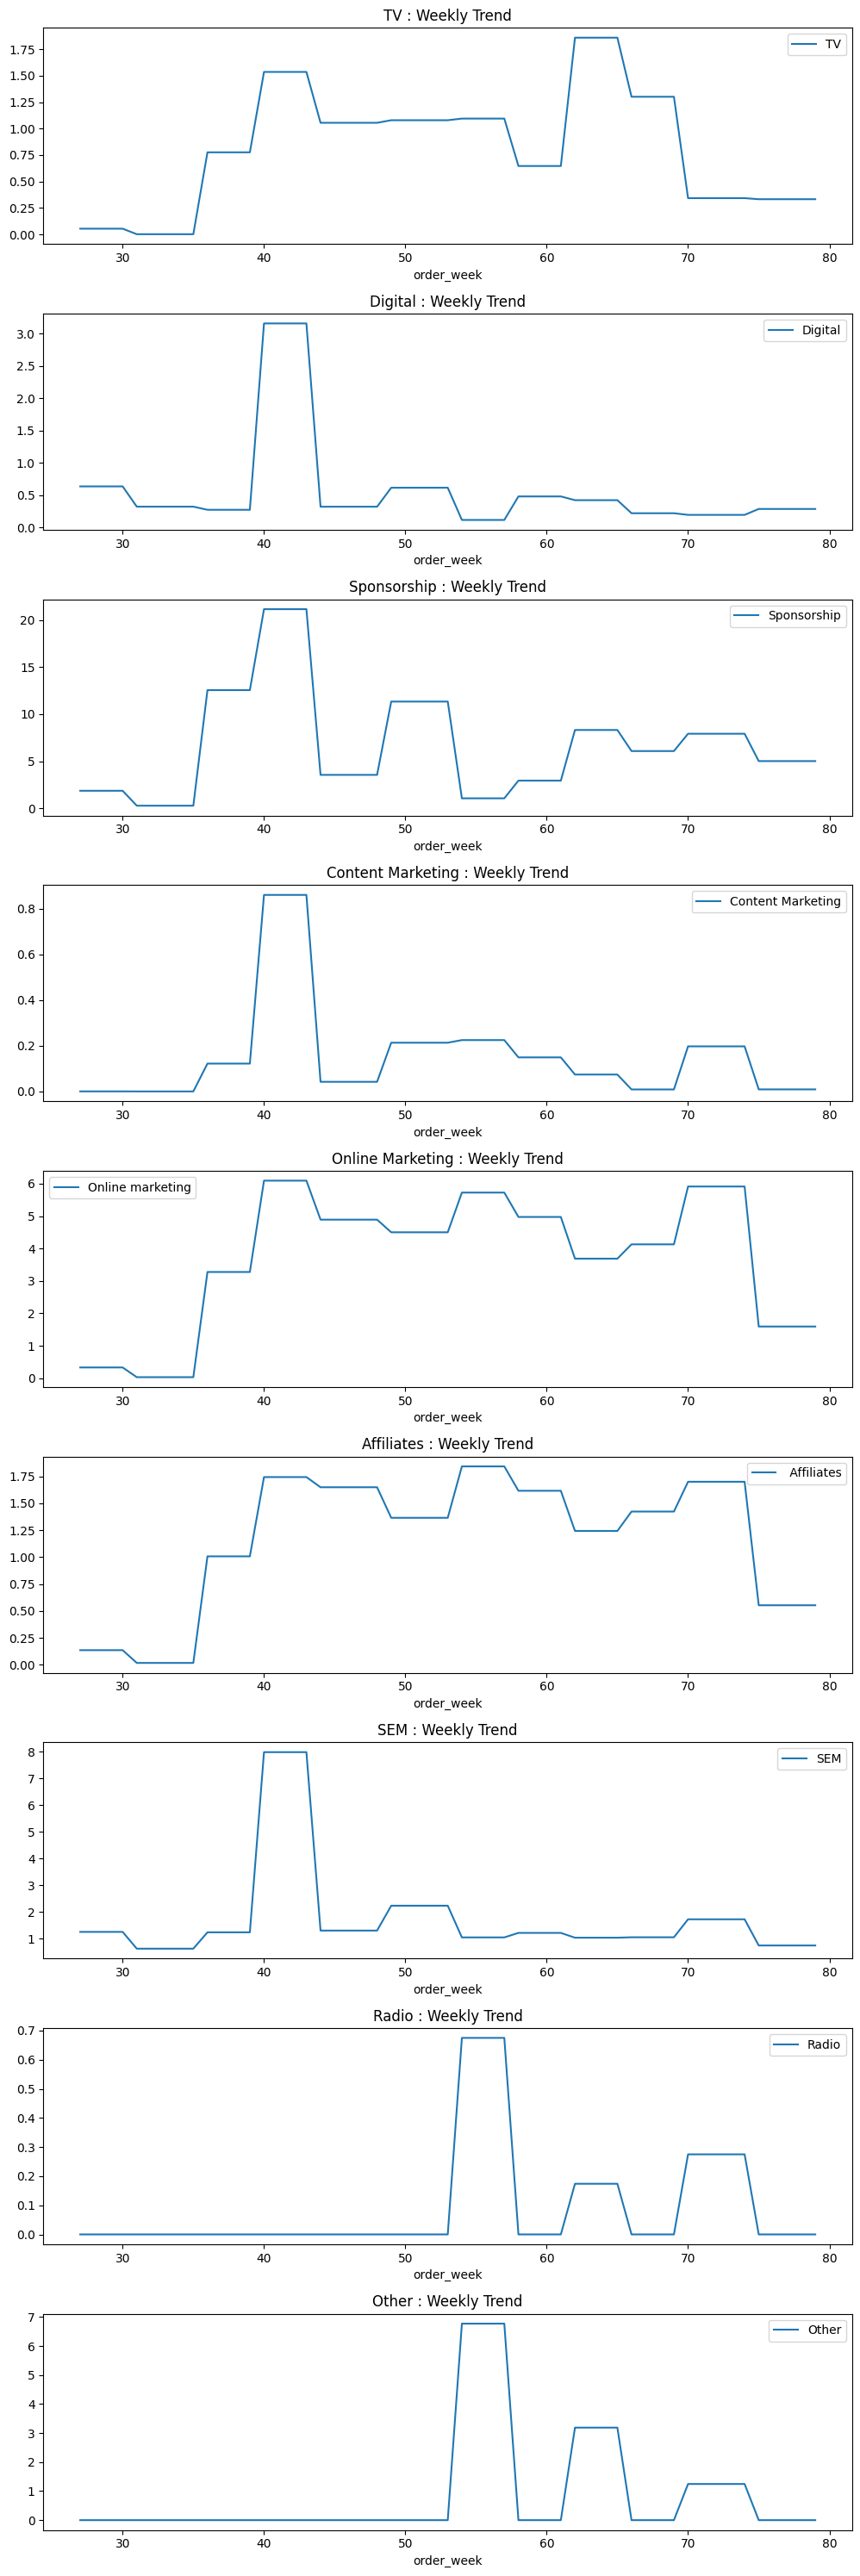

In [71]:
# Lets plot & analyze the Weekly Spends on each channel
fig = plt.figure(figsize=(10,30))

ax1 = fig.add_subplot(911)
ax1.set_title('TV : Weekly Trend')
ax2 = fig.add_subplot(912)
ax2.set_title('Digital : Weekly Trend')
ax3 = fig.add_subplot(913)
ax3.set_title('Sponsorship : Weekly Trend')
ax4 = fig.add_subplot(914)
ax4.set_title('Content Marketing : Weekly Trend')
ax5 = fig.add_subplot(915)
ax5.set_title('Online Marketing : Weekly Trend')
ax6 = fig.add_subplot(916)
ax6.set_title('Affiliates : Weekly Trend')
ax7 = fig.add_subplot(917)
ax7.set_title('SEM : Weekly Trend')
ax8 = fig.add_subplot(918)
ax8.set_title('Radio : Weekly Trend')
ax9 = fig.add_subplot(919)
ax9.set_title('Other : Weekly Trend')

media_investment_weekly.plot(x= 'order_week',y=['TV'],ax = ax1)
media_investment_weekly.plot(x= 'order_week',y=['Digital'],ax = ax2)
media_investment_weekly.plot(x= 'order_week',y=['Sponsorship'],ax = ax3)
media_investment_weekly.plot(x= 'order_week',y=['Content Marketing'],ax = ax4)
media_investment_weekly.plot(x= 'order_week',y=['Online marketing'],ax = ax5)
media_investment_weekly.plot(x= 'order_week',y=[' Affiliates'],ax = ax6)
media_investment_weekly.plot(x= 'order_week',y=['SEM'],ax = ax7)
media_investment_weekly.plot(x= 'order_week',y=['Radio'],ax = ax8)
media_investment_weekly.plot(x= 'order_week',y=['Other'],ax = ax9)

fig.tight_layout()
plt.show()

Between the weeks 39 and 45 for most of the channels, maximum amount of investments were done & that was done mainly through the sponsorship media.

In [72]:
# Function to create the adstocks data
def getAdStockData(media_investment_weekly,col_name, adstock_rate):
    media_investment_weekly['week_carry_over_1_value'] = adstock_rate**1 * media_investment_weekly[col_name]
    media_investment_weekly['week_carry_over_2_value'] = adstock_rate**2 * media_investment_weekly[col_name]
    media_investment_weekly['week_carry_over_3_value'] = adstock_rate**3 * media_investment_weekly[col_name]
    media_investment_weekly['week_carry_over_4_value'] = adstock_rate**4 * media_investment_weekly[col_name]
    media_investment_weekly['week_carry_over_5_value'] = adstock_rate**5 * media_investment_weekly[col_name]
    for i in range(0, len(media_investment_weekly)):
        week1CarryOverValue  = media_investment_weekly.loc[i-1,["week_carry_over_1_value"]][0] if(i-1 > -1) else 0
        week2CarryOverValue  = media_investment_weekly.loc[i-2,["week_carry_over_2_value"]][0] if(i-2 > -1) else 0
        week3CarryOverValue  = media_investment_weekly.loc[i-3,["week_carry_over_3_value"]][0] if(i-3 > -1) else 0
        week4CarryOverValue  = media_investment_weekly.loc[i-4,["week_carry_over_4_value"]][0] if(i-4 > -1) else 0
        week5CarryOverValue  = media_investment_weekly.loc[i-5,["week_carry_over_5_value"]][0] if(i-5 > -1) else 0
        media_investment_weekly.loc[i,"adStock_"+col_name] = media_investment_weekly.loc[i,[col_name]][0] + week1CarryOverValue + week2CarryOverValue + week3CarryOverValue + week4CarryOverValue + week5CarryOverValue
    return media_investment_weekly[["order_week","adStock_"+col_name]]

In [73]:
# Compute adstocks for each of the investment channel
adStock_TV = getAdStockData(media_investment_weekly[['TV','order_week']],"TV", 0.5)[["adStock_TV"]]
adStock_digital = getAdStockData(media_investment_weekly[['Digital','order_week']],"Digital", 0.5)[["adStock_Digital"]]
adStock_sponsorship = getAdStockData(media_investment_weekly[['Sponsorship','order_week']],"Sponsorship", 0.5)[["adStock_Sponsorship"]]
adStock_content_marketing = getAdStockData(media_investment_weekly[['Content Marketing','order_week']],"Content Marketing", 0.5)[["adStock_Content Marketing"]]
adStock_online_marketing = getAdStockData(media_investment_weekly[['Online marketing','order_week']],"Online marketing", 0.5)[["adStock_Online marketing"]]
adStock_affiliates = getAdStockData(media_investment_weekly[[' Affiliates','order_week']]," Affiliates", 0.5)[["adStock_ Affiliates"]]
adStock_SEM = getAdStockData(media_investment_weekly[['SEM','order_week']],"SEM", 0.5)[["adStock_SEM"]]
adStock_radio = getAdStockData(media_investment_weekly[['Radio','order_week']],"Radio", 0.5)[["adStock_Radio"]]
adStock_other = getAdStockData(media_investment_weekly[['Other','order_week']],"Other", 0.5)

# Concatenate all the adstocks data to form the final dataset containing all the adstock data
adstock_final = pd.concat([adStock_TV,adStock_digital,adStock_sponsorship, adStock_content_marketing, adStock_online_marketing, adStock_affiliates, adStock_SEM, adStock_radio, adStock_other], axis = 1)
adstock_final.head()

adStock_TV  adStock_Digital  adStock_Sponsorship  \
0    0.053833         0.633253             1.853567   
1    0.080749         0.949880             2.780351   
2    0.094207         1.108193             3.243743   
3    0.100936         1.187350             3.475439   
4    0.052078         0.913194             2.003552   

   adStock_Content Marketing  adStock_Online marketing  adStock_ Affiliates  \
0                   0.000233                  0.331819             0.136813   
1                   0.000350                  0.497729             0.205220   
2                   0.000408                  0.580684             0.239424   
3                   0.000437                  0.622161             0.256525   
4                   0.000220                  0.343392             0.146684   

   adStock_SEM  adStock_Radio  order_week  adStock_Other  
0     1.255924            0.0          27            0.0  
1     1.883887            0.0          28            0.0  
2     2.197868            0.0          29            0.0  
3     2.354858            0.0          30            0.0  
4     1.805811            0.0          31            0.0

In [74]:
# Merge the adstock data with the media investment data on order week
adstock_final_data = pd.merge(media_investment_weekly,adstock_final, on = "order_week", how = 'inner')

adstock_final_data.drop(['Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio', 'Other'],inplace = True, axis = 1)

print(adstock_final_data.shape)
adstock_final_data.head()

(53, 12)


order_week  Month  Year  adStock_TV  adStock_Digital  adStock_Sponsorship  \
0          27      7  2015    0.053833         0.633253             1.853567   
1          28      7  2015    0.080749         0.949880             2.780351   
2          29      7  2015    0.094207         1.108193             3.243743   
3          30      7  2015    0.100936         1.187350             3.475439   
4          31      8  2015    0.052078         0.913194             2.003552   

   adStock_Content Marketing  adStock_Online marketing  adStock_ Affiliates  \
0                   0.000233                  0.331819             0.136813   
1                   0.000350                  0.497729             0.205220   
2                   0.000408                  0.580684             0.239424   
3                   0.000437                  0.622161             0.256525   
4                   0.000220                  0.343392             0.146684   

   adStock_SEM  adStock_Radio  adStock_Other  
0     1.255924            0.0            0.0  
1     1.883887            0.0            0.0  
2     2.197868            0.0            0.0  
3     2.354858            0.0            0.0  
4     1.805811            0.0            0.0

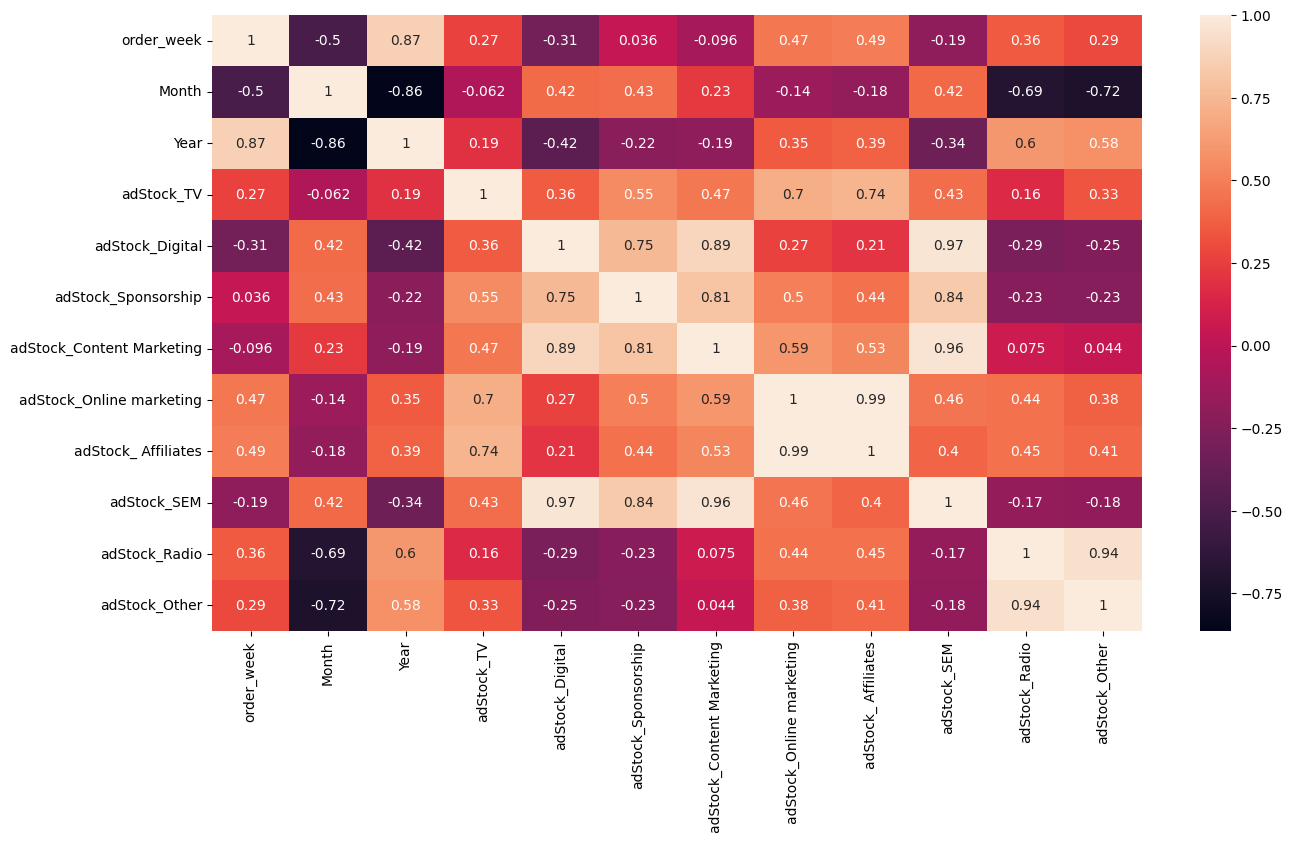

In [75]:
# Check correlation
plt.figure(figsize = (15,8))
sns.heatmap(adstock_final_data.corr(), annot = True)
plt.show()

There is a high correlation between:

* adStock_Digital & adStock_SEM
* adStock_Content Marketing & adStock_SEM
* Month & adstock_radio, Month & adstock_others
* order_week & month, year & month, order_week & year
* adStock_Affiliates & adStock_Online marketing
* adStock_Other & adStock_Radio

In [76]:
# Merge the adstock data with 3 prodyct sub categories
cameraAcc_final = pd.merge(adstock_final_data,cameraAcc_final, on = "order_week", how = 'right')
gamingAcc_final = pd.merge(adstock_final_data,gamingAcc_final, on = "order_week", how = 'right')
homeAudio_final = pd.merge(adstock_final_data,homeAudio_final, on = "order_week", how = 'right')

In [77]:
print(cameraAcc_final.shape)
cameraAcc_final.head()

(52, 50)


order_week  Month  Year  adStock_TV  adStock_Digital  adStock_Sponsorship  \
0          27      7  2015    0.053833         0.633253             1.853567   
1          28      7  2015    0.080749         0.949880             2.780351   
2          29      7  2015    0.094207         1.108193             3.243743   
3          30      7  2015    0.100936         1.187350             3.475439   
4          31      8  2015    0.052078         0.913194             2.003552   

   adStock_Content Marketing  adStock_Online marketing  adStock_ Affiliates  \
0                   0.000233                  0.331819             0.136813   
1                   0.000350                  0.497729             0.205220   
2                   0.000408                  0.580684             0.239424   
3                   0.000437                  0.622161             0.256525   
4                   0.000220                  0.343392             0.146684   

   adStock_SEM  ...  CameraTripod  ExtensionTube  Filter  Flash  \
0     1.255924  ...          13.0            0.0     0.0    0.0   
1     1.883887  ...         432.0            0.0   226.0   17.0   
2     2.197868  ...         491.0            0.0   188.0   23.0   
3     2.354858  ...         456.0            0.0   195.0   18.0   
4     1.805811  ...         362.0            0.0   112.0   26.0   

   FlashShoeAdapter   Lens  ReflectorUmbrella  Softbox  Strap  Telescope  
0               0.0    2.0                0.0      0.0    0.0        0.0  
1               0.0  362.0                0.0      0.0   12.0       16.0  
2               0.0  380.0                0.0      0.0   22.0       22.0  
3               0.0  420.0                0.0      0.0   17.0       30.0  
4               0.0  233.0                0.0      0.0   18.0       13.0  

[5 rows x 50 columns]

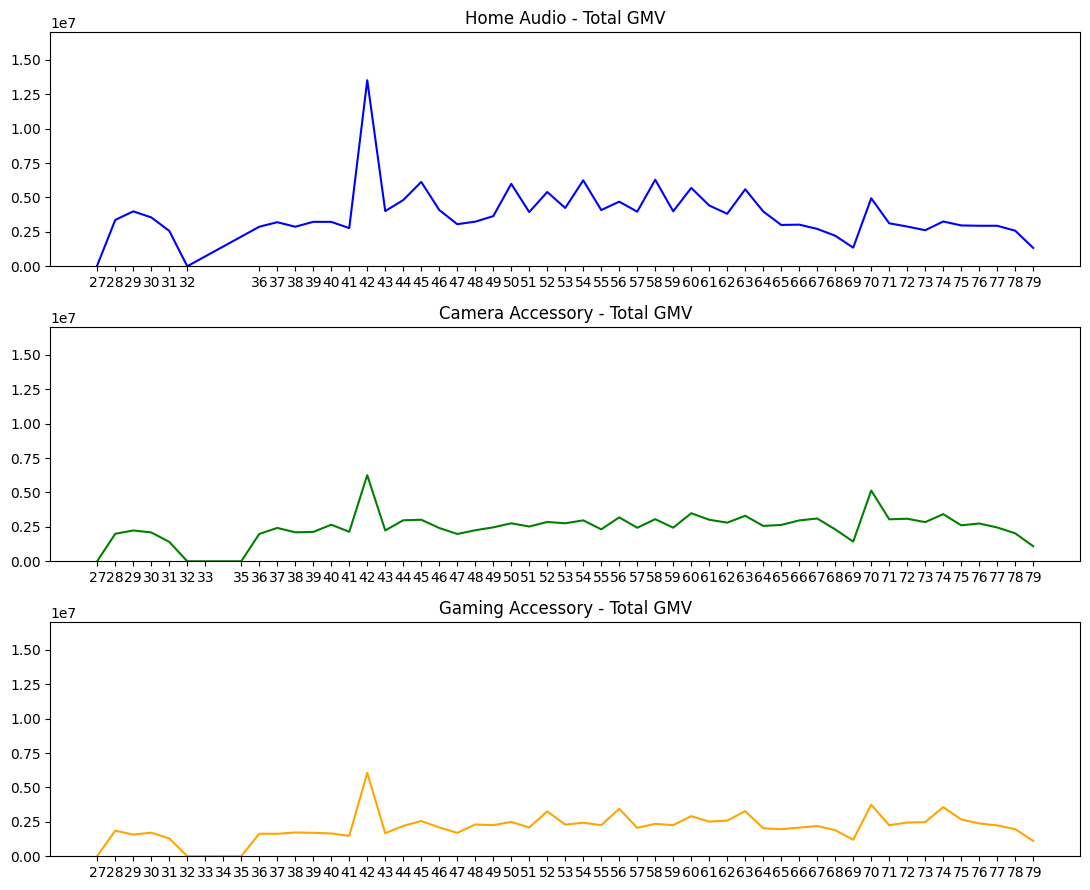

In [78]:
# Plot the GMV trend by Week
fig, axes= plt.subplots(nrows=3,ncols=1,figsize=(11,9))

ax1 = plt.subplot(3,1,1)
ax1.set_ylim(0,17000000)
ax1 = plt.title('Home Audio - Total GMV')
ax1 = plt.plot(homeAudio_final['order_week'],homeAudio_final['gmv'],color='blue')
plt.xticks(homeAudio_final['order_week'])

ax2 = plt.subplot(3,1,2)
ax2.set_ylim(0,17000000)
ax2 = plt.title('Camera Accessory - Total GMV')
ax2 = plt.plot(cameraAcc_final['order_week'],cameraAcc_final['gmv'],color='g')
plt.xticks(cameraAcc_final['order_week'])

ax3 = plt.subplot(3,1,3)
ax3.set_ylim(0,17000000)
ax3 = plt.title('Gaming Accessory - Total GMV')
ax3 = plt.plot(gamingAcc_final['order_week'],gamingAcc_final['gmv'],color='orange')
plt.xticks(gamingAcc_final['order_week'])

fig.tight_layout()
plt.show()

* The highest GMV was generated in the week-42 for all the three categories.
* The maximum GMV was generated for HomeAudio followed by Camera Accessory & then Gaming Accessory

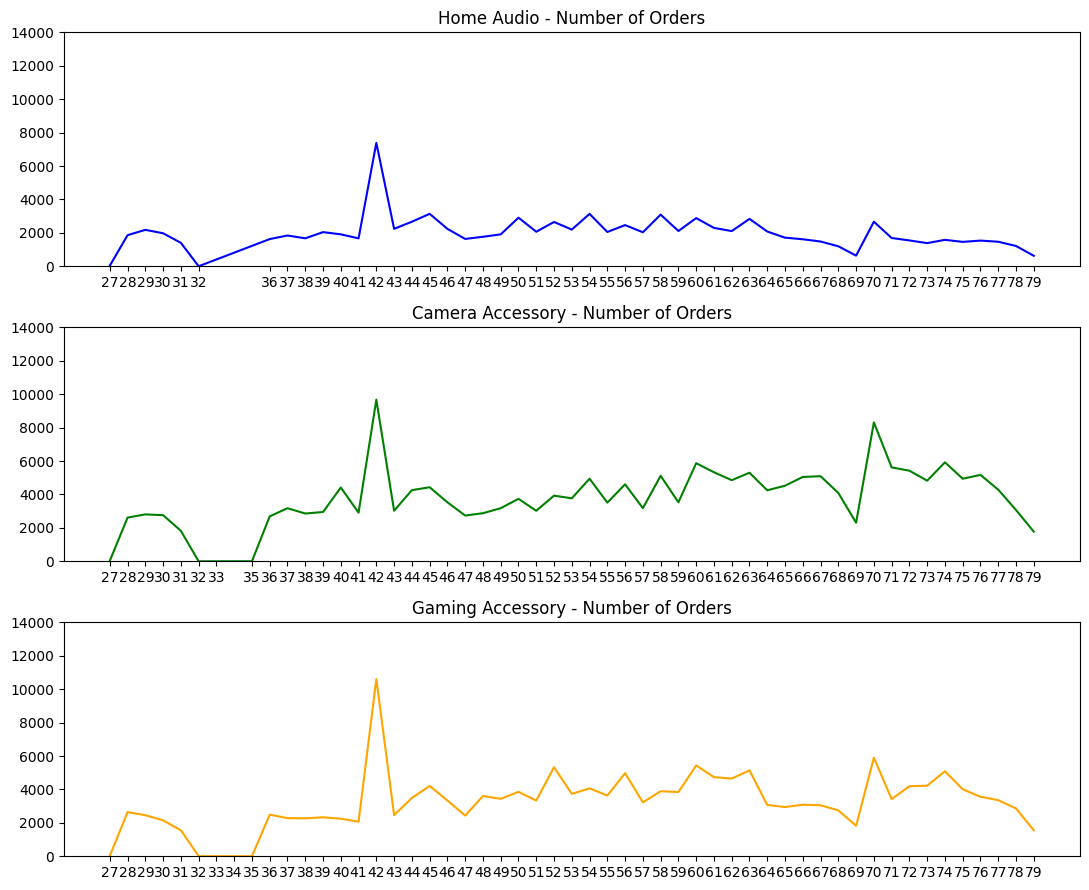

In [79]:
# Plot the No of Orders trend by Week

fig, axes= plt.subplots(nrows=3, ncols=1,figsize=(11,9))

ax1 = plt.subplot(3,1,1)
ax1.set_ylim(0,14000)
ax1 = plt.title('Home Audio - Number of Orders')
ax1 = plt.plot(homeAudio_final['order_week'],homeAudio_final['total_transactions'],color='blue')
plt.xticks(homeAudio_final['order_week'])

ax2 = plt.subplot(3,1,2)
ax2.set_ylim(0,14000)
ax2 = plt.title('Camera Accessory - Number of Orders')
ax2 = plt.plot(cameraAcc_final['order_week'],cameraAcc_final['total_transactions'],color='g')
plt.xticks(cameraAcc_final['order_week'])

ax3 = plt.subplot(3,1,3)
ax3.set_ylim(0,14000)
ax3 = plt.title('Gaming Accessory - Number of Orders')
ax3 = plt.plot(gamingAcc_final['order_week'],gamingAcc_final['total_transactions'],color='orange')
plt.xticks(gamingAcc_final['order_week'])

fig.tight_layout()
plt.show()

A similar trend is observed for no of orders as well, as the maximum number of orders were generated in week-42. And the highes was for Gaming Accessory.

In [80]:
# Lets try to find more insights around Holiday week sales & total GMV
Holiday_week_HA = homeAudio_final.groupby('is_holiday')[['gmv']].sum().reset_index()
Holiday_week_CA = cameraAcc_final.groupby('is_holiday')[['gmv']].sum().reset_index()
Holiday_week_GA = gamingAcc_final.groupby('is_holiday')[['gmv']].sum().reset_index()

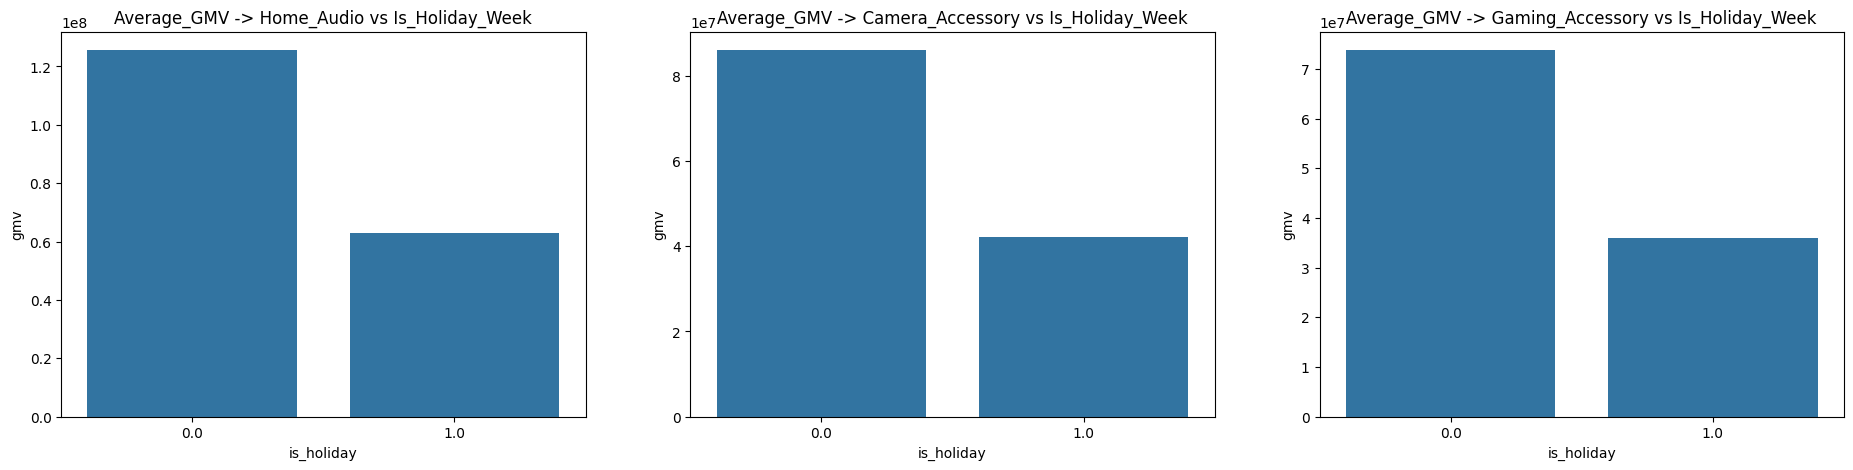

In [81]:
# Analyze the effect of Holiday week on total Sales(GMV)
plt.figure(figsize=(23,5))

ax1 = plt.subplot(1, 3, 1)
ax1 = sns.barplot(x='is_holiday', y='gmv', data=Holiday_week_HA)
ax1 = plt.title("Average_GMV -> Home_Audio vs Is_Holiday_Week")

ax2 = plt.subplot(1, 3, 2)
ax2 = sns.barplot(x='is_holiday', y='gmv', data=Holiday_week_CA)
ax2 = plt.title("Average_GMV -> Camera_Accessory vs Is_Holiday_Week")

ax3 = plt.subplot(1, 3, 3)
ax3 = sns.barplot(x='is_holiday', y='gmv', data=Holiday_week_GA)
ax3 = plt.title("Average_GMV -> Gaming_Accessory vs Is_Holiday_Week")

fig.tight_layout()
plt.show()

The total sales(GMV) on weeks without holidays is higher.

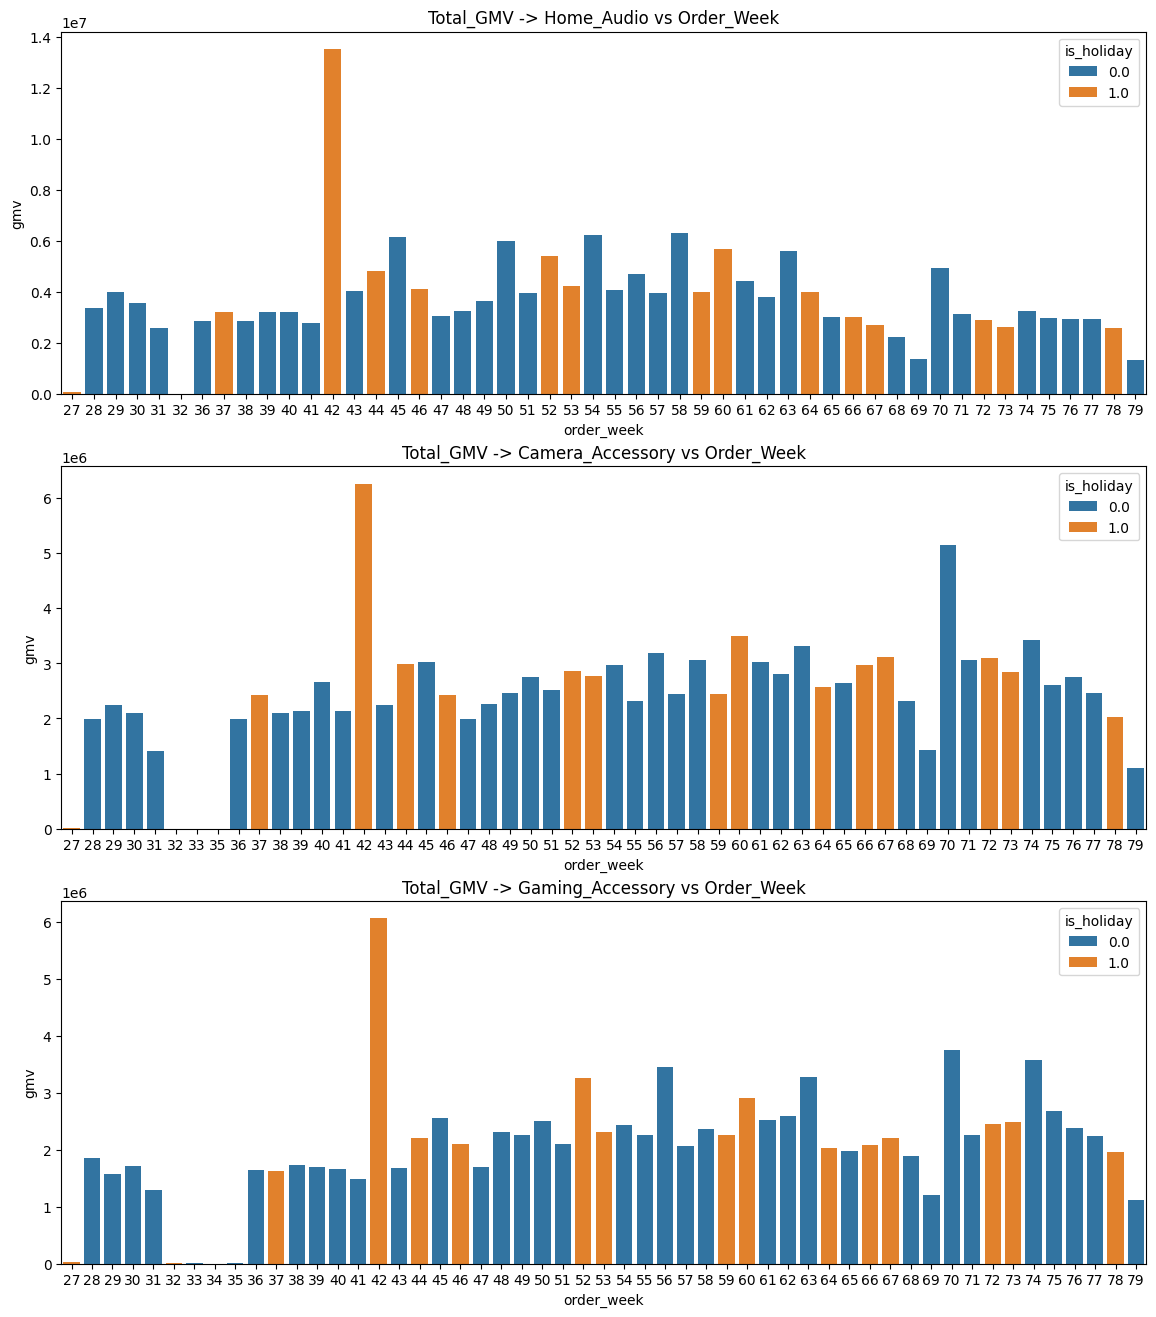

In [82]:
# Analyze the total sales(GMV) over the weeks based on whether the week has a holiday or not.

plt.figure(figsize = (14,16))
ax1 = plt.subplot(3, 1, 1)
ax1 = sns.barplot(x = 'order_week', y = 'gmv', data = homeAudio_final, hue = 'is_holiday')
ax1 = plt.title("Total_GMV -> Home_Audio vs Order_Week")

ax1 = plt.subplot(3, 1, 2)
ax1 = sns.barplot(x = 'order_week', y = 'gmv', data = cameraAcc_final, hue = 'is_holiday')
ax1 = plt.title("Total_GMV -> Camera_Accessory vs Order_Week")

ax1 = plt.subplot(3, 1, 3)
ax1 = sns.barplot(x = 'order_week', y = 'gmv', data = gamingAcc_final, hue = 'is_holiday')
ax1 = plt.title("Total_GMV -> Gaming_Accessory vs Order_Week")

fig.tight_layout()
plt.show()

It is observed that across the categories the highest sale was happened on week-24 which was a holiday week

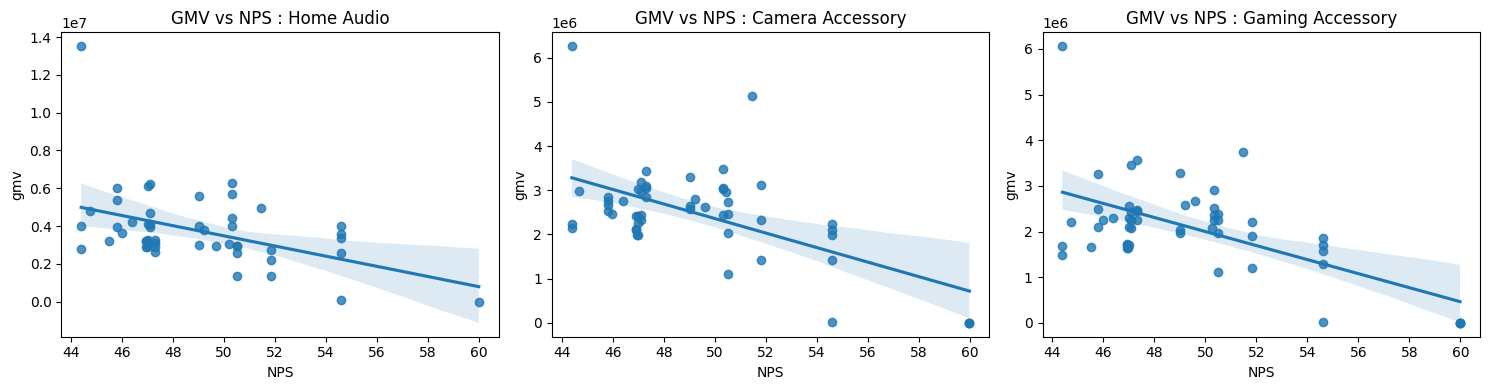

In [83]:
fig = plt.figure(figsize=(15,4))

ax1 = fig.add_subplot(131)
ax1.set_title('GMV vs NPS : Home Audio')
ax2 = fig.add_subplot(132)
ax2.set_title('GMV vs NPS : Camera Accessory')
ax3 = fig.add_subplot(133)
ax3.set_title('GMV vs NPS : Gaming Accessory')

sns.regplot(x='NPS', y='gmv', data=homeAudio_final, ax=ax1)
sns.regplot(x='NPS', y='gmv', data=cameraAcc_final, ax=ax2)
sns.regplot(x='NPS', y='gmv', data=gamingAcc_final, ax=ax3)

fig.tight_layout()
plt.show()

From the above regplot, we can see a slightly negative correlation between the NPS & total sales(GMV) across all the categories

In [84]:
# Import the climate data
climate_2015 = pd.read_excel('ONTARIO-2015.xlsx', skiprows=24)
climate_2016 = pd.read_excel('ONTARIO-2016.xlsx', skiprows=24)

# Drop null values
climate_2015.dropna(axis=1, thresh=1, inplace=True)
climate_2015.reset_index(drop=True, inplace=True)

climate_2016.dropna(axis=1, thresh=1, inplace=True)
climate_2016.reset_index(drop=True, inplace=True)

climate_2016.head()

Date/Time  Year  Month  Day Data Quality  Max Temp (°C) Max Temp Flag  \
0 2016-01-01  2016      1    1          NaN            NaN           NaN   
1 2016-01-02  2016      1    2          NaN            NaN           NaN   
2 2016-01-03  2016      1    3          NaN            NaN           NaN   
3 2016-01-04  2016      1    4          NaN            NaN           NaN   
4 2016-01-05  2016      1    5          NaN            NaN           NaN   

   Min Temp (°C) Min Temp Flag  Mean Temp (°C)  ... Cool Deg Days (°C)  \
0            NaN           NaN             NaN  ...                NaN   
1            NaN           NaN             NaN  ...                NaN   
2            NaN           NaN             NaN  ...                NaN   
3            NaN           NaN             NaN  ...                NaN   
4            NaN           NaN             NaN  ...                NaN   

   Cool Deg Days Flag Total Rain (mm)  Total Rain Flag Total Snow (cm)  \
0                 NaN             NaN              NaN             NaN   
1                 NaN             NaN              NaN             NaN   
2                 NaN             NaN              NaN             NaN   
3                 NaN             NaN              NaN             NaN   
4                 NaN             NaN              NaN             NaN   

   Total Snow Flag Total Precip (mm)  Total Precip Flag Snow on Grnd (cm)  \
0              NaN               NaN                NaN               NaN   
1              NaN               NaN                NaN               NaN   
2              NaN               NaN                NaN               NaN   
3              NaN               NaN                NaN               NaN   
4              NaN               NaN                NaN               NaN   

   Snow on Grnd Flag  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  

[5 rows x 23 columns]

In [85]:
# Delete the columns with only one unique value

drop_cols = []
for col in climate_2015.columns:
    if 'Flag' in col:
        drop_cols.append(col)

drop_cols.append('Data Quality')
climate_2015.drop(drop_cols, axis=1, inplace=True)

drop_cols = []
for col in climate_2016.columns:
    if 'Flag' in col:
        drop_cols.append(col)

drop_cols.append('Data Quality')
climate_2016.drop(drop_cols, axis=1, inplace=True)

In [86]:
# Rename the columns for convenience
climate_2015.columns = [col.replace(' (°C)','').strip() for col in climate_2015.columns]
climate_2016.columns = [col.replace(' (°C)','').strip() for col in climate_2016.columns]

climate_2015.columns

Index(['Date/Time', 'Year', 'Month', 'Day', 'Max Temp', 'Min Temp',
       'Mean Temp', 'Heat Deg Days', 'Cool Deg Days', 'Total Rain (mm)',
       'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)'],
      dtype='object')

In [87]:
# Drop rows where all the values are null
cols = ['Mean Temp','Total Rain (mm)']

climate_2015.dropna(subset=cols, inplace=True)
climate_2015.reset_index(drop=True, inplace=True)

climate_2016.dropna(subset=cols, inplace=True)
climate_2016.reset_index(drop=True, inplace=True)


climate_2015['Date/Time'] = climate_2015['Date/Time'].astype('str')
climate_2016['Date/Time'] = climate_2016['Date/Time'].astype('str')

In [88]:
# Derive the week number from the date column
import datetime
climate_2015['order_week'] = climate_2015['Date/Time'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime("%V"))
climate_2015['order_week'] = climate_2015['order_week'].apply(lambda x: str(x).lstrip('0'))

climate_2016['order_week'] = climate_2016['Date/Time'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime("%V"))
climate_2016['order_week'] = climate_2016['order_week'].apply(lambda x: str(x).lstrip('0'))
climate_2016.head()

climate_2015.head()

Date/Time  Year  Month  Day  Max Temp  Min Temp  Mean Temp  Heat Deg Days  \
0  2015-01-01  2015      1    1       0.0      -8.5       -4.3           22.3   
1  2015-01-02  2015      1    2       3.0      -3.0        0.0           18.0   
2  2015-01-03  2015      1    3       2.5      -4.0       -0.8           18.8   
3  2015-01-04  2015      1    4       2.5       0.0        1.3           16.7   
4  2015-01-05  2015      1    5     -10.0     -13.5      -11.8           29.8   

   Cool Deg Days  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  \
0            0.0              0.0              0.0                0.0   
1            0.0              0.0              0.0                0.0   
2            0.0             24.0              0.0               24.0   
3            0.0              0.0              1.0                1.0   
4            0.0              0.0              3.0                3.0   

   Snow on Grnd (cm) order_week  
0                0.0          1  
1                0.0          1  
2                0.0          1  
3                0.0          1  
4                1.0          2

In [89]:
climate_2015['order_week'] = climate_2015['order_week'].astype(int)
climate_2016['order_week'] = climate_2016['order_week'].astype(int)

# Derive order_week as per the year calendar
climate_2015['order_week'] = climate_2015.apply(lambda x: ordWeek(x['order_week'],x['Year']), axis = 1)
climate_2016['order_week'] = climate_2016.apply(lambda x: ordWeek(x['order_week'],x['Year']), axis = 1)

# Pull July to Dec data
climate_2015 = climate_2015[climate_2015['Month'] >= 7]
climate_2015.reset_index(drop=True, inplace=True)

# Pull Jan to June data
climate_2016 = climate_2016[climate_2016['Month'] <= 6]
climate_2016.reset_index(drop=True, inplace=True)
climate_2016.head()

Date/Time  Year  Month  Day  Max Temp  Min Temp  Mean Temp  Heat Deg Days  \
0  2016-01-08  2016      1    8       7.0     -14.0       -3.5           21.5   
1  2016-01-09  2016      1    9      11.0       3.0        7.0           11.0   
2  2016-01-10  2016      1   10      -1.5      -5.0       -3.3           21.3   
3  2016-01-12  2016      1   12      -5.0     -12.0       -8.5           26.5   
4  2016-01-14  2016      1   14       2.5     -10.5       -4.0           22.0   

   Cool Deg Days  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  \
0            0.0              9.0              0.0                9.0   
1            0.0             14.6              0.0               14.6   
2            0.0              0.0              7.0                7.0   
3            0.0              0.0              0.0                0.0   
4            0.0              0.0              0.0                0.0   

   Snow on Grnd (cm)  order_week  
0                0.0          54  
1                0.0          54  
2                0.0          54  
3               12.0          55  
4               11.0          55

In [90]:
climate_2015.sort_values(by=['order_week'], ascending = True, inplace = True)
climate_2016.sort_values(by=['order_week'], ascending = True, inplace = True)

In [91]:
# Aggregate the data to get weekly data -2015
climate_2015 = climate_2015.groupby(['order_week']).agg({'Max Temp':"max", 'Min Temp':"min", 'Mean Temp':"mean", 'Heat Deg Days':"mean", 'Cool Deg Days':"mean", 'Total Rain (mm)':"mean", 'Total Snow (cm)':"mean", 'Total Precip (mm)':"mean", 'Snow on Grnd (cm)':"mean"}).reset_index(drop=False)

# Aggregate the data to get weekly data -2016
climate_2016 = climate_2016.groupby(['order_week']).agg({'Max Temp':"max", 'Min Temp':"min", 'Mean Temp':"mean", 'Heat Deg Days':"mean", 'Cool Deg Days':"mean", 'Total Rain (mm)':"mean", 'Total Snow (cm)':"mean", 'Total Precip (mm)':"mean", 'Snow on Grnd (cm)':"mean"}).reset_index(drop=False)
climate_2016.head()

order_week  Max Temp  Min Temp  Mean Temp  Heat Deg Days  Cool Deg Days  \
0          54      11.0     -14.0   0.066667      17.933333            0.0   
1          55       4.5     -12.0  -3.733333      21.733333            0.0   
2          57       5.5      -9.0  -1.800000      19.800000            0.0   
3          58      13.0      -5.5   3.200000      14.800000            0.0   
4          59       5.0     -18.0  -7.266667      25.266667            0.0   

   Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  Snow on Grnd (cm)  
0         7.866667         2.333333          10.200000           0.000000  
1         2.533333         0.000000           2.533333          10.333333  
2         0.000000         0.000000           0.000000           0.000000  
3         3.400000         0.000000           3.400000           0.000000  
4         0.000000         2.666667           2.666667           2.000000

In [92]:
# Concatination 2015 & 12016 to get final climate data
climate = pd.concat([climate_2015, climate_2016], axis = 0)

# Drop the columns which are not relevant
climate=climate.drop(['Max Temp','Min Temp','Heat Deg Days','Cool Deg Days','Total Snow (cm)','Total Precip (mm)','Snow on Grnd (cm)'],axis=1)

print(climate.shape)
climate.head()

(52, 3)


order_week  Mean Temp  Total Rain (mm)
0          27  19.360000         0.000000
1          28  20.100000         4.416667
2          29  23.183333         1.400000
3          30  23.060000         1.080000
4          31  24.566667         4.633333

In [93]:
# Merge the climate data to create final datframe
cameraAcc_final_climate = pd.merge(cameraAcc_final,climate, on = "order_week", how = 'inner')
gamingAcc_final_climate = pd.merge(gamingAcc_final,climate, on = "order_week", how = 'inner')
homeAudio_final_climate = pd.merge(homeAudio_final,climate, on = "order_week", how = 'inner')

## Machine Learning Model

### Additive Linear Model

In [94]:
# Function to calculate elasticity of the KPIs
def getElasticity(train, gmv, coefficient):
    elasticity = []
    for i in coefficient.feature:
        feature_mean = train[i].mean()
        elasticity.append((((coefficient.loc[coefficient['feature']==i]['coefficient'].mean())*feature_mean)/gmv.mean()))
    coefficient['elasticity'] = pd.Series(elasticity)
    return coefficient

#### Camera Accessory

In [95]:
cameraAcc_final.head()

order_week  Month  Year  adStock_TV  adStock_Digital  adStock_Sponsorship  \
0          27      7  2015    0.053833         0.633253             1.853567   
1          28      7  2015    0.080749         0.949880             2.780351   
2          29      7  2015    0.094207         1.108193             3.243743   
3          30      7  2015    0.100936         1.187350             3.475439   
4          31      8  2015    0.052078         0.913194             2.003552   

   adStock_Content Marketing  adStock_Online marketing  adStock_ Affiliates  \
0                   0.000233                  0.331819             0.136813   
1                   0.000350                  0.497729             0.205220   
2                   0.000408                  0.580684             0.239424   
3                   0.000437                  0.622161             0.256525   
4                   0.000220                  0.343392             0.146684   

   adStock_SEM  ...  CameraTripod  ExtensionTube  Filter  Flash  \
0     1.255924  ...          13.0            0.0     0.0    0.0   
1     1.883887  ...         432.0            0.0   226.0   17.0   
2     2.197868  ...         491.0            0.0   188.0   23.0   
3     2.354858  ...         456.0            0.0   195.0   18.0   
4     1.805811  ...         362.0            0.0   112.0   26.0   

   FlashShoeAdapter   Lens  ReflectorUmbrella  Softbox  Strap  Telescope  
0               0.0    2.0                0.0      0.0    0.0        0.0  
1               0.0  362.0                0.0      0.0   12.0       16.0  
2               0.0  380.0                0.0      0.0   22.0       22.0  
3               0.0  420.0                0.0      0.0   17.0       30.0  
4               0.0  233.0                0.0      0.0   18.0       13.0  

[5 rows x 50 columns]

In [96]:
# Drop the columns which are under no control of the company
cameraAcc_model = cameraAcc_final.drop(['selling_price','units','product_mrp','total_transactions'], axis = 1)
cameraAcc_model.shape

(52, 46)

In [97]:
# Split dataset into train & test
df_train, df_test = train_test_split(cameraAcc_model, train_size = 0.8, test_size = 0.2, random_state = 42)

# Separate features and target variable
y_train = df_train['gmv']
X_train = df_train.drop('gmv', axis = 1)

y_test = df_test['gmv']
X_test = df_test.drop('gmv', axis = 1)

In [98]:
# Scale the data
scaler = MinMaxScaler()

num_cols=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holidays',
       'total_special_sale_days',
       'total_pay_days',
       'Binoculars', 'CameraAccessory', 'CameraBag',
       'CameraBattery', 'CameraBatteryCharger', 'CameraBatteryGrip',
       'CameraEyeCup', 'CameraFilmRolls', 'CameraHousing', 'CameraMicrophone',
       'CameraMount', 'CameraRemoteControl', 'CameraTripod', 'ExtensionTube',
       'Filter', 'Flash', 'FlashShoeAdapter', 'Lens', 'ReflectorUmbrella',
       'Softbox', 'Strap', 'Telescope']

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [99]:
# Use RFE (Recursive Feature Eliminatio) for Feature Selection
lm = LinearRegression()

rfe = RFE(lm, n_features_to_select = 20)
rfe = rfe.fit(X_train, y_train)

In [100]:
# Top 20 features selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Year', 'adStock_Digital', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_SEM', 'adStock_Radio', 'NPS',
       'Binoculars', 'CameraBag', 'CameraBattery', 'CameraBatteryCharger',
       'CameraFilmRolls', 'CameraHousing', 'CameraMicrophone', 'CameraMount',
       'Flash', 'FlashShoeAdapter', 'Lens', 'Softbox', 'Telescope'],
      dtype='object')

In [101]:
# Create X_train_rfe with RFE selected features
X_train_rfe = X_train[cols]

# Add a constant
X_train_lm = sm.add_constant(X_train_rfe)

# Fit the model
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# Check the VIF of each features
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     285.1
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           2.44e-20
Time:                        17:25:05   Log-Likelihood:                -512.10
No. Observations:                  41   AIC:                             1066.
Df Residuals:                      20   BIC:                             1102.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  1.865594e+08
5                 adStock_SEM  5.236300e+02
2             adStock_Digital  1.985900e+02
3   adStock_Content Marketing  1.338700e+02
9                   CameraBag  6.691000e+01
11       CameraBatteryCharger  4.201000e+01
20                  Telescope  2.907000e+01
10              CameraBattery  2.808000e+01
18                       Lens  2.743000e+01
12            CameraFilmRolls  2.734000e+01
4    adStock_Online marketing  2.241000e+01
8                  Binoculars  1.489000e+01
6               adStock_Radio  1.303000e+01
14           CameraMicrophone  1.232000e+01
1                        Year  1.148000e+01
16                      Flash  9.730000e+00
15                CameraMount  7.940000e+00
19                    Softbox  6.920000e+00
7                         NPS  5.310000e+00
13              CameraHousing  3.990000e+00
17           FlashShoeAdapter  2.390000e+00

In [102]:
# Remove the feature with higher p-value
X_train_v2 = X_train_rfe.drop(['adStock_Online marketing'], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v2)

# Fit the model
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     310.3
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.57e-21
Time:                        17:25:05   Log-Likelihood:                -512.41
No. Observations:                  41   AIC:                             1065.
Df Residuals:                      21   BIC:                             1099.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  1.661775e+08
4                 adStock_SEM  3.439700e+02
3   adStock_Content Marketing  1.298900e+02
2             adStock_Digital  1.069700e+02
8                   CameraBag  6.490000e+01
10       CameraBatteryCharger  3.739000e+01
17                       Lens  2.626000e+01
9               CameraBattery  2.543000e+01
19                  Telescope  2.473000e+01
11            CameraFilmRolls  2.422000e+01
7                  Binoculars  1.478000e+01
5               adStock_Radio  1.245000e+01
13           CameraMicrophone  1.089000e+01
1                        Year  1.023000e+01
15                      Flash  9.410000e+00
18                    Softbox  6.560000e+00
14                CameraMount  6.510000e+00
6                         NPS  4.480000e+00
12              CameraHousing  3.950000e+00
16           FlashShoeAdapter  2.320000e+00

In [103]:
#removing the feature with higher p-value
X_train_v3= X_train_v2.drop(["CameraBattery"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v3)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     332.1
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.19e-22
Time:                        17:25:05   Log-Likelihood:                -513.08
No. Observations:                  41   AIC:                             1064.
Df Residuals:                      22   BIC:                             1097.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  1.609777e+08
4                 adStock_SEM  2.363400e+02
3   adStock_Content Marketing  1.064400e+02
2             adStock_Digital  8.448000e+01
8                   CameraBag  5.400000e+01
18                  Telescope  2.471000e+01
16                       Lens  2.423000e+01
10            CameraFilmRolls  2.364000e+01
9        CameraBatteryCharger  2.151000e+01
7                  Binoculars  1.447000e+01
5               adStock_Radio  1.044000e+01
12           CameraMicrophone  1.010000e+01
1                        Year  9.910000e+00
14                      Flash  9.260000e+00
13                CameraMount  5.830000e+00
17                    Softbox  5.690000e+00
6                         NPS  4.120000e+00
11              CameraHousing  3.260000e+00
15           FlashShoeAdapter  1.860000e+00

In [104]:
# Removing the feature with higher VIF values
X_train_v4= X_train_v3.drop(["adStock_Digital"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v4)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     312.4
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           3.88e-23
Time:                        17:25:05   Log-Likelihood:                -516.41
No. Observations:                  41   AIC:                             1069.
Df Residuals:                      23   BIC:                             1100.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  1.195491e+08
3                 adStock_SEM  1.114900e+02
2   adStock_Content Marketing  1.052400e+02
7                   CameraBag  5.360000e+01
15                       Lens  2.378000e+01
17                  Telescope  2.313000e+01
8        CameraBatteryCharger  2.097000e+01
9             CameraFilmRolls  1.870000e+01
6                  Binoculars  1.139000e+01
11           CameraMicrophone  9.630000e+00
4               adStock_Radio  9.470000e+00
13                      Flash  9.260000e+00
1                        Year  7.360000e+00
12                CameraMount  5.550000e+00
16                    Softbox  5.520000e+00
5                         NPS  3.370000e+00
10              CameraHousing  3.250000e+00
14           FlashShoeAdapter  1.860000e+00

In [105]:
# Removing the feature with higher p-value
X_train_v5= X_train_v4.drop(["CameraFilmRolls"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v5)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     296.5
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.29e-23
Time:                        17:25:05   Log-Likelihood:                -519.58
No. Observations:                  41   AIC:                             1073.
Df Residuals:                      24   BIC:                             1102.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  1.155597e+08
3                 adStock_SEM  9.872000e+01
2   adStock_Content Marketing  9.445000e+01
7                   CameraBag  4.336000e+01
8        CameraBatteryCharger  2.092000e+01
14                       Lens  1.880000e+01
16                  Telescope  1.184000e+01
6                  Binoculars  1.117000e+01
10           CameraMicrophone  9.270000e+00
12                      Flash  9.090000e+00
4               adStock_Radio  8.970000e+00
1                        Year  7.110000e+00
11                CameraMount  5.550000e+00
15                    Softbox  3.540000e+00
5                         NPS  2.870000e+00
9               CameraHousing  2.860000e+00
13           FlashShoeAdapter  1.840000e+00

In [106]:
# Removing the feature with higher p-value value
X_train_v6= X_train_v5.drop(["adStock_SEM"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v6)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     158.7
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           5.78e-21
Time:                        17:25:05   Log-Likelihood:                -534.44
No. Observations:                  41   AIC:                             1101.
Df Residuals:                      25   BIC:                             1128.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  1.135706e+08
6                   CameraBag  4.098000e+01
13                       Lens  1.865000e+01
7        CameraBatteryCharger  1.351000e+01
15                  Telescope  1.007000e+01
5                  Binoculars  9.440000e+00
11                      Flash  9.050000e+00
9            CameraMicrophone  8.110000e+00
1                        Year  6.990000e+00
10                CameraMount  5.300000e+00
14                    Softbox  3.450000e+00
3               adStock_Radio  3.150000e+00
2   adStock_Content Marketing  2.900000e+00
8               CameraHousing  2.830000e+00
4                         NPS  2.590000e+00
12           FlashShoeAdapter  1.680000e+00

In [107]:
# Removing the feature with higher p-value value
X_train_v7= X_train_v6.drop(["CameraMicrophone"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v7)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     174.7
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           4.94e-22
Time:                        17:25:06   Log-Likelihood:                -534.69
No. Observations:                  41   AIC:                             1099.
Df Residuals:                      26   BIC:                             1125.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  1.083009e+08
6                   CameraBag  3.197000e+01
12                       Lens  1.821000e+01
14                  Telescope  1.007000e+01
10                      Flash  8.740000e+00
5                  Binoculars  8.610000e+00
1                        Year  6.670000e+00
7        CameraBatteryCharger  5.460000e+00
9                 CameraMount  4.120000e+00
13                    Softbox  3.420000e+00
3               adStock_Radio  3.040000e+00
2   adStock_Content Marketing  2.890000e+00
8               CameraHousing  2.740000e+00
4                         NPS  2.280000e+00
11           FlashShoeAdapter  1.630000e+00

In [108]:
# Removing the feature with higher p-value value
X_train_v8= X_train_v7.drop(["Telescope"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v8)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     191.1
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           4.61e-23
Time:                        17:25:06   Log-Likelihood:                -535.14
No. Observations:                  41   AIC:                             1098.
Df Residuals:                      27   BIC:                             1122.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  1.066663e+08
6                   CameraBag  2.952000e+01
12                       Lens  1.801000e+01
5                  Binoculars  8.530000e+00
10                      Flash  7.280000e+00
1                        Year  6.560000e+00
7        CameraBatteryCharger  5.180000e+00
9                 CameraMount  3.980000e+00
13                    Softbox  3.300000e+00
3               adStock_Radio  2.970000e+00
2   adStock_Content Marketing  2.740000e+00
8               CameraHousing  2.180000e+00
4                         NPS  1.910000e+00
11           FlashShoeAdapter  1.610000e+00

In [109]:
# Removing the feature with higher p-value value
X_train_v9= X_train_v8.drop(["FlashShoeAdapter"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v9)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     192.1
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.41e-23
Time:                        17:25:06   Log-Likelihood:                -537.38
No. Observations:                  41   AIC:                             1101.
Df Residuals:                      28   BIC:                             1123.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  1.065893e+08
6                   CameraBag  2.747000e+01
11                       Lens  1.669000e+01
5                  Binoculars  8.320000e+00
10                      Flash  6.960000e+00
1                        Year  6.560000e+00
7        CameraBatteryCharger  4.210000e+00
9                 CameraMount  3.500000e+00
12                    Softbox  3.290000e+00
3               adStock_Radio  2.970000e+00
2   adStock_Content Marketing  2.700000e+00
8               CameraHousing  2.100000e+00
4                         NPS  1.890000e+00

In [110]:
# Removing the feature with higher VIF value
X_train_v10= X_train_v9.drop(["adStock_Radio"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v10)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     194.7
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           4.36e-24
Time:                        17:25:06   Log-Likelihood:                -539.58
No. Observations:                  41   AIC:                             1103.
Df Residuals:                      29   BIC:                             1124.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features          VIF
0                       const  69911395.84
5                   CameraBag        20.90
10                       Lens        13.43
4                  Binoculars         7.48
9                       Flash         6.48
1                        Year         4.30
6        CameraBatteryCharger         3.83
8                 CameraMount         3.14
11                    Softbox         2.58
2   adStock_Content Marketing         2.45
7               CameraHousing         2.10
3                         NPS         1.77

In [111]:
# Removing the feature with higher p-value value
X_train_v11= X_train_v10.drop(["Lens"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v11)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     212.9
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           5.11e-25
Time:                        17:25:06   Log-Likelihood:                -540.39
No. Observations:                  41   AIC:                             1103.
Df Residuals:                      30   BIC:                             1122.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features          VIF
0                       const  69839971.57
5                   CameraBag         7.81
4                  Binoculars         7.47
9                       Flash         5.53
1                        Year         4.30
6        CameraBatteryCharger         3.69
8                 CameraMount         2.52
2   adStock_Content Marketing         2.38
10                    Softbox         2.38
7               CameraHousing         2.08
3                         NPS         1.76

In [112]:
# Removing the feature with higher VIF value
X_train_v12= X_train_v11.drop(["adStock_Content Marketing"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v12)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     228.5
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           8.79e-26
Time:                        17:25:07   Log-Likelihood:                -541.75
No. Observations:                  41   AIC:                             1104.
Df Residuals:                      31   BIC:                             1121.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 6.399e+08 

Features          VIF
0                 const  69784267.68
4             CameraBag         7.79
3            Binoculars         6.73
8                 Flash         5.53
1                  Year         4.29
5  CameraBatteryCharger         3.44
7           CameraMount         2.51
9               Softbox         2.38
6         CameraHousing         2.01
2                   NPS         1.39

In [113]:
# Removing the feature with higher pvalue value
X_train_v13= X_train_v12.drop(["Binoculars"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v13)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     247.9
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.52e-26
Time:                        17:25:07   Log-Likelihood:                -543.13
No. Observations:                  41   AIC:                             1104.
Df Residuals:                      32   BIC:                             1120.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7.092e+08 

Features          VIF
0                 const  65845469.10
7                 Flash         5.13
1                  Year         4.05
4  CameraBatteryCharger         3.44
3             CameraBag         2.95
6           CameraMount         2.49
8               Softbox         2.20
5         CameraHousing         2.01
2                   NPS         1.39

In [114]:
# Removing the feature with higher VIF value
X_train_v14= X_train_v13.drop(["CameraMount"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v14)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     266.7
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           3.71e-27
Time:                        17:25:07   Log-Likelihood:                -544.97
No. Observations:                  41   AIC:                             1106.
Df Residuals:                      33   BIC:                             1120.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 6.392e+08 

Features          VIF
0                 const  63060537.76
6                 Flash         4.91
1                  Year         3.88
4  CameraBatteryCharger         2.97
3             CameraBag         2.95
7               Softbox         1.98
5         CameraHousing         1.87
2                   NPS         1.36

Your current OLS regression results indicate a strong model fit, with an R-squared value of 0.983, suggesting that the model explains approximately 98.3% of the variability in the dependent variable (gmv).

Observations:
* All predictors have p-values less than 0.05, indicating that they are statistically significant in predicting the dependent variable.
* The VIF values are relatively low. Note: VIF values below 5 indicate no significant multicollinearity issues.

Evaluate the model

In [115]:
X_train_lm.columns

Index(['const', 'Year', 'NPS', 'CameraBag', 'CameraBatteryCharger',
       'CameraHousing', 'Flash', 'Softbox'],
      dtype='object')

In [116]:
# Prepare the X-test data features for model Evaluation & Predictions
X_test = X_test[X_train_lm.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)

# Make predictions using the final model
y_test_pred = lr.predict(X_test)

# Calculate R-squared
r2_score(y_test, y_test_pred)

0.8507839728182528

The R-sqaured value of 85.07% indicates that the model isperforming well and is able to predict the outcomes effectively based on the features selected.

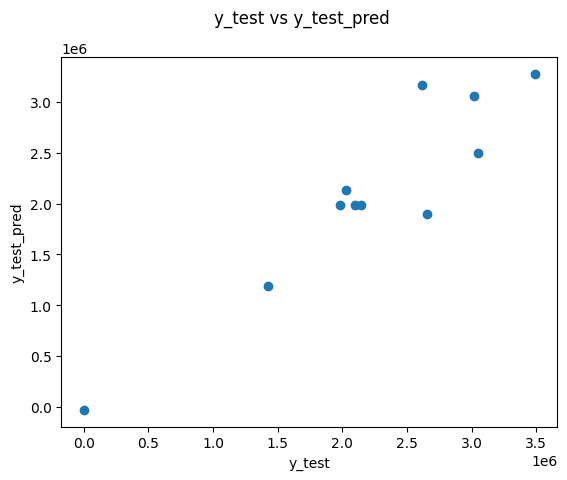

In [117]:
# Plot y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.show()

The scatter plot shows a general upward trend between actual and predicted values, indicating the model is performing reasonably well. However, the scatter and potential outliers suggest room for improvement. Further analysis is needed to assess model performance and identify areas for improvement.

In [118]:
# Elasticity
coefficients = pd.DataFrame(pd.DataFrame(lr.params)[1:]).reset_index()
coefficients.columns = ['feature','coefficient']
coefficients = coefficients[coefficients['feature'] != 'Year'].reset_index(drop=True)
coefficients

feature   coefficient
0                   NPS -6.262941e+05
1             CameraBag  4.564420e+06
2  CameraBatteryCharger  8.060874e+05
3         CameraHousing -7.896082e+05
4                 Flash  1.408280e+06
5               Softbox -6.965917e+05

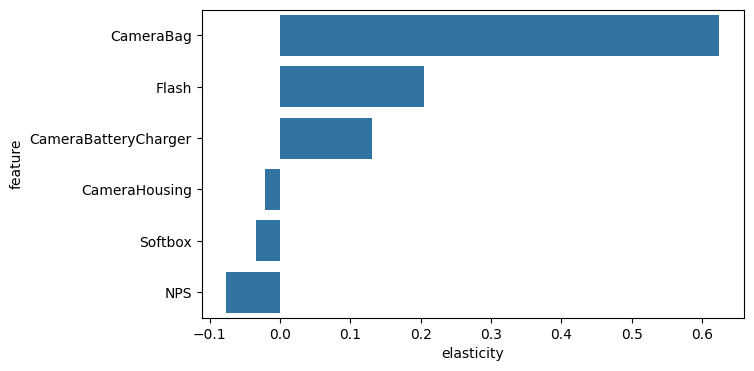

In [119]:
elasticity = getElasticity(X_train_lm, y_train, coefficients)

plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity.sort_values('elasticity', ascending = False))
plt.show()

The plot shows the elasticity of different features with respect to a target variable. CameraBag has the highest positive elasticity, indicating that increasing its price significantly increases demand, while NPS has the highest negative elasticity, suggesting that increasing its price significantly decreases demand

#### Gaming Accessory

In [120]:
gamingAcc_final.head()

order_week  Month  Year  adStock_TV  adStock_Digital  adStock_Sponsorship  \
0          27      7  2015    0.053833         0.633253             1.853567   
1          28      7  2015    0.080749         0.949880             2.780351   
2          29      7  2015    0.094207         1.108193             3.243743   
3          30      7  2015    0.100936         1.187350             3.475439   
4          31      8  2015    0.052078         0.913194             2.003552   

   adStock_Content Marketing  adStock_Online marketing  adStock_ Affiliates  \
0                   0.000233                  0.331819             0.136813   
1                   0.000350                  0.497729             0.205220   
2                   0.000408                  0.580684             0.239424   
3                   0.000437                  0.622161             0.256525   
4                   0.000220                  0.343392             0.146684   

   adStock_SEM  ...  GamingChargingStation  GamingHeadset  GamingKeyboard  \
0     1.255924  ...                    0.0            2.0             1.0   
1     1.883887  ...                    0.0          177.0           424.0   
2     2.197868  ...                    0.0          179.0           161.0   
3     2.354858  ...                    0.0          280.0           170.0   
4     1.805811  ...                    0.0          424.0            71.0   

   GamingMemoryCard  GamingMouse  GamingMousePad  GamingSpeaker  \
0               0.0          3.0             1.0            0.0   
1              36.0        964.0            53.0            0.0   
2              27.0        356.0            48.0            0.0   
3              28.0        447.0            67.0            0.0   
4              11.0        232.0            39.0            1.0   

   JoystickGamingWheel  MotionController  TVOutCableAccessory  
0                  0.0               0.0                  0.0  
1                 11.0              16.0                 73.0  
2                  8.0              11.0                 92.0  
3                  9.0              11.0                 93.0  
4                 16.0               8.0                 79.0  

[5 rows x 43 columns]

In [121]:
# Drop the columns which are under no control of the company
gamingAcc_model = gamingAcc_final.drop(['selling_price','units','product_mrp','total_transactions'], axis = 1)
gamingAcc_model.shape

(53, 39)

In [122]:
# Split dataset into train & test
df_train, df_test = train_test_split(gamingAcc_model, train_size = 0.8, test_size = 0.2, random_state = 42)

# Separate features and target variable
y_train = df_train['gmv']
X_train = df_train.drop('gmv', axis = 1)

y_test = df_test['gmv']
X_test = df_test.drop('gmv', axis = 1)

In [123]:
# Scale all the numerical values
scaler = MinMaxScaler()
num_cols = ['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other','sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holidays',
       'total_special_sale_days',
       'total_pay_days',
       'CoolingPad', 'GameControlMount', 'GamePad', 'GamingAccessoryKit',
       'GamingAdapter', 'GamingChargingStation', 'GamingHeadset',
       'GamingKeyboard', 'GamingMemoryCard', 'GamingMouse', 'GamingMousePad',
       'GamingSpeaker', 'JoystickGamingWheel', 'MotionController',
       'TVOutCableAccessory']

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [124]:
# Execute RFE by limiting the features to 20
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

# top 20 features selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['adStock_TV', 'adStock_Digital', 'adStock_Sponsorship',
       'adStock_Content Marketing', 'adStock_Online marketing',
       'adStock_ Affiliates', 'adStock_SEM', 'adStock_Radio', 'adStock_Other',
       'NPS', 'total_special_sale_days', 'GamingAccessoryKit',
       'GamingChargingStation', 'GamingHeadset', 'GamingKeyboard',
       'GamingMemoryCard', 'GamingMouse', 'GamingMousePad',
       'JoystickGamingWheel', 'TVOutCableAccessory'],
      dtype='object')

In [125]:
# Create X_train_rfe dataframe with RFE selected features
X_train_rfe = X_train[cols]

# Adding a constant
X_train_lm = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     177.8
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           4.45e-19
Time:                        17:25:09   Log-Likelihood:                -533.07
No. Observations:                  42   AIC:                             1108.
Df Residuals:                      21   BIC:                             1145.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features      VIF
6       adStock_ Affiliates  2467.33
5  adStock_Online marketing  2350.31
7               adStock_SEM  2300.37
9             adStock_Other  1972.02
8             adStock_Radio  1697.87

In [126]:
# Removing the feature with higher p-value
X_train_v2 = X_train_rfe.drop(["adStock_Content Marketing"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v2)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     196.0
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           3.11e-20
Time:                        17:25:09   Log-Likelihood:                -533.08
No. Observations:                  42   AIC:                             1106.
Df Residuals:                      22   BIC:                             1141.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features      VIF
5       adStock_ Affiliates  2435.59
4  adStock_Online marketing  2318.97
6               adStock_SEM  1766.55
7             adStock_Radio  1299.70
2           adStock_Digital  1289.15

In [127]:
# Removing the feature with higher p-value
X_train_v3 = X_train_v2.drop(["adStock_Online marketing"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v3)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     216.0
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           2.09e-21
Time:                        17:25:09   Log-Likelihood:                -533.10
No. Observations:                  42   AIC:                             1104.
Df Residuals:                      23   BIC:                             1137.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    8

Features      VIF
5      adStock_SEM  1658.20
6    adStock_Radio  1288.52
7    adStock_Other  1226.53
2  adStock_Digital  1177.61
0            const   256.59

In [128]:
# Removing the feature with higher p-value
X_train_v4 = X_train_v3.drop(["adStock_SEM"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v4)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     223.6
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           2.86e-22
Time:                        17:25:09   Log-Likelihood:                -534.46
No. Observations:                  42   AIC:                             1105.
Df Residuals:                      24   BIC:                             1136.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

Features     VIF
6        adStock_Other  411.76
5        adStock_Radio  368.25
0                const  170.20
1           adStock_TV  115.21
4  adStock_ Affiliates   75.85

In [129]:
# Removing the feature with higher p-value
X_train_v5 = X_train_v4.drop(["GamingAccessoryKit"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v5)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     218.4
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           8.35e-23
Time:                        17:25:10   Log-Likelihood:                -537.08
No. Observations:                  42   AIC:                             1108.
Df Residuals:                      25   BIC:                             1138.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

Features     VIF
6        adStock_Other  318.87
5        adStock_Radio  303.21
0                const   94.21
1           adStock_TV   75.60
4  adStock_ Affiliates   60.22

In [130]:
# Removing the feature with higher p-value
X_train_v6 = X_train_v5.drop(["GamingMousePad"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v6)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     215.7
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           2.32e-23
Time:                        17:25:10   Log-Likelihood:                -539.50
No. Observations:                  42   AIC:                             1111.
Df Residuals:                      26   BIC:                             1139.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

Features     VIF
6             adStock_Other  289.74
5             adStock_Radio  271.65
0                     const   93.90
1                adStock_TV   71.13
4       adStock_ Affiliates   55.01
3       adStock_Sponsorship   38.74
2           adStock_Digital   14.24
7                       NPS    9.40
13              GamingMouse    7.40
10            GamingHeadset    5.88
15      TVOutCableAccessory    5.66
9     GamingChargingStation    4.74
12         GamingMemoryCard    4.19
14      JoystickGamingWheel    3.58
11           GamingKeyboard    3.41
8   total_special_sale_days    3.11

In [131]:
# Removing the feature with higher VIF value
X_train_v7 = X_train_v6.drop(["adStock_Other"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v7)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     128.9
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           5.65e-21
Time:                        17:25:10   Log-Likelihood:                -552.41
No. Observations:                  42   AIC:                             1135.
Df Residuals:                      27   BIC:                             1161.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

Features    VIF
0                const  86.71
3  adStock_Sponsorship  16.55
4  adStock_ Affiliates   8.74
2      adStock_Digital   8.72
6                  NPS   8.57

In [132]:
# Removing the feature with higher p-value value
X_train_v8 = X_train_v7.drop(["adStock_Radio"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v8)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     137.8
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           8.29e-22
Time:                        17:25:10   Log-Likelihood:                -553.30
No. Observations:                  42   AIC:                             1135.
Df Residuals:                      28   BIC:                             1159.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

Features    VIF
0                const  86.61
3  adStock_Sponsorship  13.11
5                  NPS   8.40
4  adStock_ Affiliates   8.34
2      adStock_Digital   7.95

In [133]:
# Removing the feature with higher p-value value
X_train_v9 = X_train_v8.drop(["adStock_Digital"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v9)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     135.9
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           4.06e-22
Time:                        17:25:10   Log-Likelihood:                -555.98
No. Observations:                  42   AIC:                             1138.
Df Residuals:                      29   BIC:                             1161.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

Features    VIF
0                   const  85.52
4                     NPS   8.02
3     adStock_ Affiliates   7.54
10            GamingMouse   5.81
6   GamingChargingStation   4.51

In [134]:
# Removing the feature with higher VIF value
X_train_v10 = X_train_v9.drop(["NPS"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v10)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     92.06
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           5.36e-20
Time:                        17:25:10   Log-Likelihood:                -566.45
No. Observations:                  42   AIC:                             1157.
Df Residuals:                      30   BIC:                             1178.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    7

Features   VIF
0                  const  9.65
9            GamingMouse  5.66
3    adStock_ Affiliates  5.35
5  GamingChargingStation  4.23
6          GamingHeadset  3.96

In [135]:
# Removing the feature with higher pvalue value
X_train_v11 = X_train_v10.drop(["adStock_ Affiliates"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v11)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     104.5
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           5.13e-21
Time:                        17:25:11   Log-Likelihood:                -566.47
No. Observations:                  42   AIC:                             1155.
Df Residuals:                      31   BIC:                             1174.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    8

Features   VIF
0                  const  8.54
8            GamingMouse  5.52
4  GamingChargingStation  4.23
5          GamingHeadset  3.21
7       GamingMemoryCard  3.05

In [136]:
# Removing the feature with higher pvalue value
X_train_v12 = X_train_v11.drop(["adStock_Sponsorship"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v12)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     118.2
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           5.65e-22
Time:                        17:25:11   Log-Likelihood:                -566.76
No. Observations:                  42   AIC:                             1154.
Df Residuals:                      32   BIC:                             1171.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    8

Features   VIF
0                  const  8.53
7            GamingMouse  4.90
3  GamingChargingStation  4.22
6       GamingMemoryCard  3.05
4          GamingHeadset  2.87

In [137]:
# Removing the feature with higher pvalue value
X_train_v13 = X_train_v12.drop(["GamingChargingStation"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v13)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     131.3
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           9.23e-23
Time:                        17:25:11   Log-Likelihood:                -567.64
No. Observations:                  42   AIC:                             1153.
Df Residuals:                      33   BIC:                             1169.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

Features   VIF
0                const  8.16
6          GamingMouse  3.88
3        GamingHeadset  2.69
4       GamingKeyboard  2.41
8  TVOutCableAccessory  1.77

In [138]:
# Removing the feature with higher pvalue value
X_train_v14 = X_train_v13.drop(["total_special_sale_days"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v14)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     150.4
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.12e-23
Time:                        17:25:11   Log-Likelihood:                -568.21
No. Observations:                  42   AIC:                             1152.
Df Residuals:                      34   BIC:                             1166.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.362e+05   8

Features   VIF
0                const  7.26
5          GamingMouse  3.33
2        GamingHeadset  2.67
3       GamingKeyboard  2.37
7  TVOutCableAccessory  1.70

After multiple iterations of fine-tuning the model with manual feature eliminations, we have reached a stable & statistically significant model where the p-values & VIFs of all the features are within the acceptable range. Hence, we can consider this as our FINAL base model.

In [139]:
# Evaluate the model
X_test = X_test[X_train_lm.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)

# Make predictions using the final model
y_test_pred = lr.predict(X_test)

r2_score(y_test, y_test_pred)

0.9281228106876166

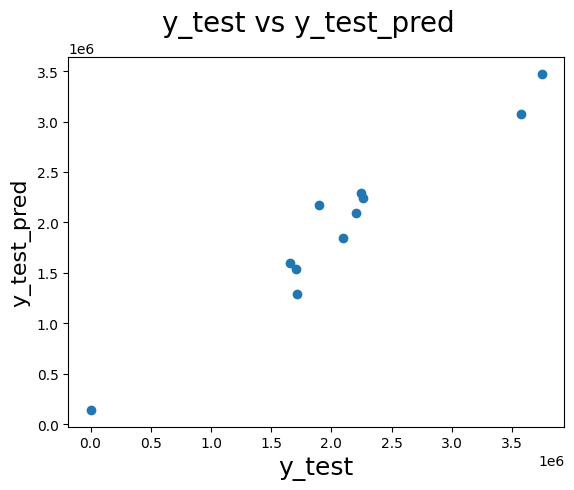

In [140]:
# Plot y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                               # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label
plt.show()

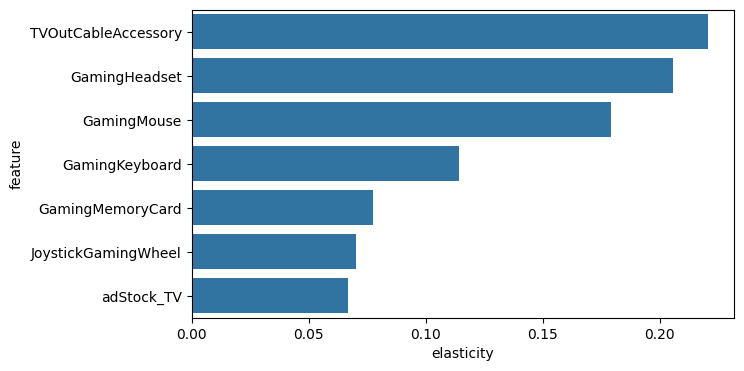

In [141]:
# Check elasticity
coefficients = pd.DataFrame(pd.DataFrame(lr.params)[1:]).reset_index()
coefficients.columns = ['feature','coefficient']
elasticity = getElasticity(X_train_lm, y_train, coefficients)

plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity.sort_values('elasticity', ascending = False))
plt.show()

#### Home Audio

In [142]:
homeAudio_final.head()

order_week  Month  Year  adStock_TV  adStock_Digital  adStock_Sponsorship  \
0          27      7  2015    0.053833         0.633253             1.853567   
1          28      7  2015    0.080749         0.949880             2.780351   
2          29      7  2015    0.094207         1.108193             3.243743   
3          30      7  2015    0.100936         1.187350             3.475439   
4          31      8  2015    0.052078         0.913194             2.003552   

   adStock_Content Marketing  adStock_Online marketing  adStock_ Affiliates  \
0                   0.000233                  0.331819             0.136813   
1                   0.000350                  0.497729             0.205220   
2                   0.000408                  0.580684             0.239424   
3                   0.000437                  0.622161             0.256525   
4                   0.000220                  0.343392             0.146684   

   adStock_SEM  ...  BoomBox  DJController  Dock  DockingStation  FMRadio  \
0     1.255924  ...      4.0           0.0   0.0             0.0      2.0   
1     1.883887  ...     59.0           0.0  29.0             1.0    478.0   
2     2.197868  ...     57.0           0.0  42.0             1.0    532.0   
3     2.354858  ...     65.0           0.0  46.0             0.0    509.0   
4     1.805811  ...     37.0           0.0  37.0             0.0    372.0   

   HiFiSystem  HomeAudioSpeaker  SlingBox  SoundMixer  VoiceRecorder  
0         0.0              26.0       0.0         0.0            0.0  
1        13.0            1276.0       0.0         0.0           25.0  
2        27.0            1507.0       0.0         0.0           26.0  
3        20.0            1331.0       0.0         0.0           22.0  
4        11.0             936.0       0.0         0.0           16.0  

[5 rows x 38 columns]

In [143]:
# Drop the columns which are under no control of the company
homeAudio_model = homeAudio_final.drop(['selling_price','units','product_mrp','total_transactions'], axis = 1)
homeAudio_model.shape

(50, 34)

In [144]:
# splitting dataset into train & test
df_train, df_test = train_test_split(homeAudio_model, train_size = 0.8, test_size = 0.2, random_state = 42)

# Separate features and target variable
y_train = df_train['gmv']
X_train = df_train.drop('gmv', axis = 1)

y_test = df_test['gmv']
X_test = df_test.drop('gmv', axis = 1)

In [145]:
# Scaling all the numerical values
scaler = MinMaxScaler()
num_cols = ['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holidays',
       'total_special_sale_days',
       'total_pay_days', 'BoomBox',
       'DJController', 'Dock', 'DockingStation', 'FMRadio', 'HiFiSystem',
       'HomeAudioSpeaker', 'SlingBox', 'SoundMixer', 'VoiceRecorder']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [146]:
# Apply  RFE by limiting the features to 20
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

# top 20 features selected by RFE
cols = X_train.columns[rfe.support_]

# Creating X_train_rfe dataframe with RFE selected features
X_train_rfe = X_train[cols]

In [147]:
# Adding a constant
X_train_lm = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1110.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           4.79e-25
Time:                        17:25:13   Log-Likelihood:                -497.65
No. Observations:                  40   AIC:                             1037.
Df Residuals:                      19   BIC:                             1073.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                     const  5.397785e+08
8               adStock_SEM  3.166830e+03
3           adStock_Digital  2.303520e+03
7       adStock_ Affiliates  1.818830e+03
6  adStock_Online marketing  1.681280e+03

In [148]:
# Removing the feature with higher p-value
X_train_v2 = X_train_rfe.drop(["adStock_Radio"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v2)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1229.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.34e-26
Time:                        17:25:13   Log-Likelihood:                -497.66
No. Observations:                  40   AIC:                             1035.
Df Residuals:                      20   BIC:                             1069.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                      const  2.442711e+08
7        adStock_ Affiliates  1.561620e+03
6   adStock_Online marketing  1.359630e+03
3            adStock_Digital  4.334800e+02
5  adStock_Content Marketing  2.575400e+02

In [149]:
# Removing the feature with higher p-value
X_train_v3 = X_train_v2.drop(["HiFiSystem"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v3)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1342.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           4.13e-28
Time:                        17:25:13   Log-Likelihood:                -497.96
No. Observations:                  40   AIC:                             1034.
Df Residuals:                      21   BIC:                             1066.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                      const  2.340088e+08
7        adStock_ Affiliates  1.476160e+03
6   adStock_Online marketing  1.283830e+03
3            adStock_Digital  4.318200e+02
5  adStock_Content Marketing  2.563200e+02

In [150]:
# Removing the feature with higher p-value
X_train_v4 = X_train_v3.drop(["sla"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v4)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1443.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.47e-29
Time:                        17:25:13   Log-Likelihood:                -498.59
No. Observations:                  40   AIC:                             1033.
Df Residuals:                      22   BIC:                             1064.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                     const  2.238333e+08
7       adStock_ Affiliates  1.205800e+03
6  adStock_Online marketing  1.110740e+03
3           adStock_Digital  3.949100e+02
8               adStock_SEM  2.440100e+02

In [151]:
# Removing the feature with higher p-value
X_train_v5 = X_train_v4.drop(["adStock_Content Marketing"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v5)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1534.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           5.93e-31
Time:                        17:25:14   Log-Likelihood:                -499.46
No. Observations:                  40   AIC:                             1033.
Df Residuals:                      23   BIC:                             1062.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features           VIF
0                     const  1.772544e+08
5  adStock_Online marketing  1.093890e+03
6       adStock_ Affiliates  1.057700e+03
7               adStock_SEM  2.193800e+02
3           adStock_Digital  1.575900e+02

In [152]:
# Removing the feature with higher p-value
X_train_v6 = X_train_v5.drop(["adStock_SEM"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v6)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1645.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           2.18e-32
Time:                        17:25:14   Log-Likelihood:                -500.21
No. Observations:                  40   AIC:                             1032.
Df Residuals:                      24   BIC:                             1059.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features           VIF
0                     const  1.364581e+08
6       adStock_ Affiliates  1.040420e+03
5  adStock_Online marketing  1.034150e+03
2                adStock_TV  2.519000e+01
4       adStock_Sponsorship  2.335000e+01

In [153]:
# Removing the feature with higher p-value
X_train_v7 = X_train_v6.drop(["adStock_Sponsorship"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v7)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1626.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           2.25e-33
Time:                        17:25:14   Log-Likelihood:                -502.63
No. Observations:                  40   AIC:                             1035.
Df Residuals:                      25   BIC:                             1061.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features           VIF
0                      const  1.183284e+08
5        adStock_ Affiliates  2.068200e+02
4   adStock_Online marketing  2.036600e+02
9                       Dock  1.210000e+01
11                   FMRadio  9.350000e+00

In [154]:
# Removing the feature with higher p-value
X_train_v8 = X_train_v7.drop(["adStock_Other"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v8)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1703.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.23e-34
Time:                        17:25:14   Log-Likelihood:                -503.98
No. Observations:                  40   AIC:                             1036.
Df Residuals:                      26   BIC:                             1060.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features          VIF
0                      const  84244572.24
5        adStock_ Affiliates       189.27
4   adStock_Online marketing       181.54
8                       Dock        11.87
10                   FMRadio         8.97

In [155]:
# Removing the feature with higher p-value
X_train_v9 = X_train_v8.drop(["DockingStation"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v9)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1832.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           4.95e-36
Time:                        17:25:14   Log-Likelihood:                -504.86
No. Observations:                  40   AIC:                             1036.
Df Residuals:                      27   BIC:                             1058.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features          VIF
0                     const  76894214.94
5       adStock_ Affiliates       188.35
4  adStock_Online marketing       178.76
8                      Dock        11.00
9                   FMRadio         8.54

In [156]:
# Removing the feature with higher p-value
X_train_v10 = X_train_v9.drop(["SoundMixer"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v10)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1916.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           3.16e-37
Time:                        17:25:14   Log-Likelihood:                -506.43
No. Observations:                  40   AIC:                             1037.
Df Residuals:                      28   BIC:                             1057.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features          VIF
0                     const  75487826.08
5       adStock_ Affiliates       174.26
4  adStock_Online marketing       165.85
9                   FMRadio         7.59
8                      Dock         7.11

In [157]:
# Removing the feature with higher p-value
X_train_v11 = X_train_v10.drop(["Dock"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v11)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2037.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.79e-38
Time:                        17:25:14   Log-Likelihood:                -507.82
No. Observations:                  40   AIC:                             1038.
Df Residuals:                      29   BIC:                             1056.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features          VIF
0                     const  71272829.44
5       adStock_ Affiliates       174.08
4  adStock_Online marketing       165.85
7                  discount         6.96
8                   FMRadio         5.13

In [158]:
# Removing the feature with higher p-value
X_train_v12 = X_train_v11.drop(["adStock_Digital"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v12)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2178.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.05e-39
Time:                        17:25:14   Log-Likelihood:                -509.26
No. Observations:                  40   AIC:                             1039.
Df Residuals:                      30   BIC:                             1055.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features          VIF
0                     const  71202387.85
4       adStock_ Affiliates       117.54
3  adStock_Online marketing       103.66
6                  discount         5.41
8          HomeAudioSpeaker         4.56

In [159]:
# Removing the feature with higher p-value
X_train_v13 = X_train_v12.drop(["Year"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v13)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2310.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           8.30e-41
Time:                        17:25:14   Log-Likelihood:                -511.10
No. Observations:                  40   AIC:                             1040.
Df Residuals:                      31   BIC:                             1055.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features     VIF
3       adStock_ Affiliates  108.52
2  adStock_Online marketing   96.84
0                     const   28.84
5                  discount    5.38
7          HomeAudioSpeaker    4.23

In [160]:
# Removing the feature with higher p-value
X_train_v14 = X_train_v13.drop(["adStock_TV"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v14)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2468.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           7.41e-42
Time:                        17:25:15   Log-Likelihood:                -513.07
No. Observations:                  40   AIC:                             1042.
Df Residuals:                      32   BIC:                             1056.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features    VIF
2       adStock_ Affiliates  69.29
1  adStock_Online marketing  67.34
0                     const  28.61
4                  discount   5.27
6          HomeAudioSpeaker   4.18

In [161]:
# Removing the feature with higher p-value
X_train_v15 = X_train_v14.drop(["adStock_ Affiliates"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v15)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2891.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           2.01e-43
Time:                        17:25:15   Log-Likelihood:                -513.61
No. Observations:                  40   AIC:                             1041.
Df Residuals:                      33   BIC:                             1053.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features    VIF
0                     const  28.60
3                  discount   5.11
5          HomeAudioSpeaker   4.16
1  adStock_Online marketing   3.24
2   product_procurement_sla   2.96

In [162]:
# Removing the feature with higher p-value
X_train_v16 = X_train_v15.drop(["product_procurement_sla"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v16)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     3276.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.39e-44
Time:                        17:25:15   Log-Likelihood:                -515.34
No. Observations:                  40   AIC:                             1043.
Df Residuals:                      34   BIC:                             1053.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features    VIF
0                     const  28.55
4          HomeAudioSpeaker   3.71
3                   FMRadio   2.74
2                  discount   1.94
1  adStock_Online marketing   1.83

In [163]:
# Removing the feature with higher p-value
X_train_v17 = X_train_v16.drop(["adStock_Online marketing"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v17)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     3834.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.05e-45
Time:                        17:25:15   Log-Likelihood:                -517.24
No. Observations:                  40   AIC:                             1044.
Df Residuals:                      35   BIC:                             1053.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -8925.2206   8.94e+04  

Features    VIF
0             const  28.01
3  HomeAudioSpeaker   3.59
2           FMRadio   2.74
1          discount   1.66
4     VoiceRecorder   1.10

After multiple iterations of fine-tuning the model with manual feature eliminations, we have reached a stable & statistically significant model where the p-values & VIFs of all the features are within the acceptable range. Hence, we can consider this as our FINAL base model.

In [164]:
# Model Evaluation
X_test = X_test[X_train_lm.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)

# Making predictions using the final model
y_test_pred = lr.predict(X_test)

r2_score(y_test, y_test_pred)

0.9873829605345082

For this model, the R-Square for the predictions made on the test data remain very close to that of train dataset. Hence, we can conclude this as the stable additive model.

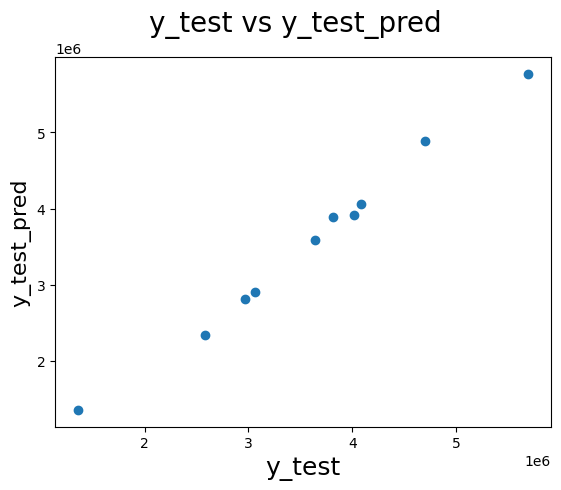

In [165]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                               # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label
plt.show()

From the above plot, we can see a good linear relationship between the actual & the predicted values of the test data

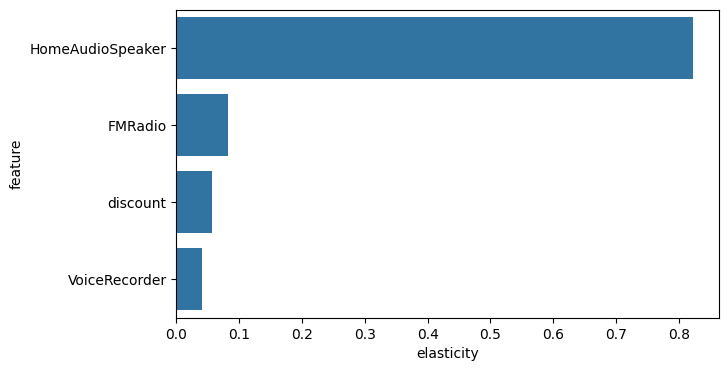

In [166]:
# Check Elasticity
coefficients = pd.DataFrame(pd.DataFrame(lr.params)[1:]).reset_index()
coefficients.columns = ['feature','coefficient']
elasticity = getElasticity(X_train_lm, y_train, coefficients)
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity.sort_values('elasticity', ascending = False))
plt.show()

### Multiplicative Model

#### Camera Accessory

In [167]:
cameraAcc_final.head()

order_week  Month  Year  adStock_TV  adStock_Digital  adStock_Sponsorship  \
0          27      7  2015    0.053833         0.633253             1.853567   
1          28      7  2015    0.080749         0.949880             2.780351   
2          29      7  2015    0.094207         1.108193             3.243743   
3          30      7  2015    0.100936         1.187350             3.475439   
4          31      8  2015    0.052078         0.913194             2.003552   

   adStock_Content Marketing  adStock_Online marketing  adStock_ Affiliates  \
0                   0.000233                  0.331819             0.136813   
1                   0.000350                  0.497729             0.205220   
2                   0.000408                  0.580684             0.239424   
3                   0.000437                  0.622161             0.256525   
4                   0.000220                  0.343392             0.146684   

   adStock_SEM  ...  CameraTripod  ExtensionTube  Filter  Flash  \
0     1.255924  ...          13.0            0.0     0.0    0.0   
1     1.883887  ...         432.0            0.0   226.0   17.0   
2     2.197868  ...         491.0            0.0   188.0   23.0   
3     2.354858  ...         456.0            0.0   195.0   18.0   
4     1.805811  ...         362.0            0.0   112.0   26.0   

   FlashShoeAdapter   Lens  ReflectorUmbrella  Softbox  Strap  Telescope  
0               0.0    2.0                0.0      0.0    0.0        0.0  
1               0.0  362.0                0.0      0.0   12.0       16.0  
2               0.0  380.0                0.0      0.0   22.0       22.0  
3               0.0  420.0                0.0      0.0   17.0       30.0  
4               0.0  233.0                0.0      0.0   18.0       13.0  

[5 rows x 50 columns]

In [168]:
# Replacing '0' values with '0.000001' in order to avoide null values after performing the log transform of the dataset
# Performing log transformation of the dataset & dropping the features which not in control of the company
cameraAcc_model2 = np.log(cameraAcc_final.replace(0.0, 0.000001).drop(['selling_price','units','product_mrp','total_transactions'], axis = 1))

#Test-train split
df_train, df_test = train_test_split(cameraAcc_model2, train_size = 0.8, test_size = 0.2, random_state = 100)

# Assigning the X_train, X_test, y_train & y_test values
y_train = df_train.pop('gmv')
X_train = df_train

y_test = df_test.pop('gmv')
X_test = df_test

cameraAcc_model2.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'NPS', 'discount', 'total_premiumn_products',
       'total_holidays', 'is_holiday', 'total_special_sale_days',
       'is_special_sale_day', 'total_pay_days', 'is_pay_day', 'Binoculars',
       'CameraAccessory', 'CameraBag', 'CameraBattery', 'CameraBatteryCharger',
       'CameraBatteryGrip', 'CameraEyeCup', 'CameraFilmRolls', 'CameraHousing',
       'CameraMicrophone', 'CameraMount', 'CameraRemoteControl',
       'CameraTripod', 'ExtensionTube', 'Filter', 'Flash', 'FlashShoeAdapter',
       'Lens', 'ReflectorUmbrella', 'Softbox', 'Strap', 'Telescope'],
      dtype='object')

In [169]:
# Scaling all the numerical values
scaler = MinMaxScaler()
num_cols = ['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holidays',
       'total_special_sale_days',
       'total_pay_days',
       'Binoculars', 'CameraAccessory', 'CameraBag', 'CameraBattery',
       'CameraBatteryCharger', 'CameraBatteryGrip', 'CameraEyeCup',
       'CameraFilmRolls', 'CameraHousing', 'CameraMicrophone', 'CameraMount',
       'CameraRemoteControl', 'CameraTripod', 'ExtensionTube', 'Filter',
       'Flash', 'FlashShoeAdapter', 'Lens', 'ReflectorUmbrella', 'Softbox',
       'Strap', 'Telescope']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [170]:
# Executing RFE by limiting the features to 20
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

# top 20 features selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Year', 'adStock_TV', 'adStock_Sponsorship',
       'adStock_Content Marketing', 'adStock_Online marketing',
       'adStock_ Affiliates', 'adStock_Radio', 'adStock_Other', 'discount',
       'total_premiumn_products', 'Binoculars', 'CameraAccessory', 'CameraBag',
       'CameraBattery', 'CameraBatteryCharger', 'CameraRemoteControl',
       'Filter', 'Flash', 'Lens', 'Strap'],
      dtype='object')

In [171]:
# Creating X_train_rfe dataframe with RFE selected features
X_train_rfe = X_train[cols]

# Adding a constant
X_train_lm = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3491.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           3.42e-31
Time:                        17:25:16   Log-Likelihood:                 94.440
No. Observations:                  41   AIC:                            -146.9
Df Residuals:                      20   BIC:                            -110.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                     const  2.897510e+11
5  adStock_Online marketing  1.467205e+04
6       adStock_ Affiliates  1.296602e+04
7             adStock_Radio  2.958530e+03
8             adStock_Other  2.842030e+03

In [172]:
# Removing the feature with higher p-value
X_train_v2 = X_train_rfe.drop(["Filter"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v2)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3769.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           6.87e-33
Time:                        17:25:16   Log-Likelihood:                 93.959
No. Observations:                  41   AIC:                            -147.9
Df Residuals:                      21   BIC:                            -113.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                     const  2.734011e+11
5  adStock_Online marketing  7.950140e+03
6       adStock_ Affiliates  7.072990e+03
7             adStock_Radio  2.953170e+03
8             adStock_Other  2.824720e+03

In [173]:
# Removing the feature with higher p-value
X_train_v3 = X_train_v2.drop(["Year"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v3)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3934.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.96e-34
Time:                        17:25:16   Log-Likelihood:                 92.778
No. Observations:                  41   AIC:                            -147.6
Df Residuals:                      22   BIC:                            -115.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features      VIF
4   adStock_Online marketing  7690.42
5        adStock_ Affiliates  6809.67
6              adStock_Radio  2886.68
7              adStock_Other  2749.06
12                 CameraBag  1415.07

In [174]:
# Removing the feature with higher p-value
X_train_v4 = X_train_v3.drop(["Binoculars"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v4)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4082.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           6.07e-36
Time:                        17:25:16   Log-Likelihood:                 91.454
No. Observations:                  41   AIC:                            -146.9
Df Residuals:                      23   BIC:                            -116.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features      VIF
4   adStock_Online marketing  7680.24
5        adStock_ Affiliates  6809.18
6              adStock_Radio  2609.81
7              adStock_Other  2514.23
12             CameraBattery  1072.42

In [175]:
# Removing the feature with higher p-value
X_train_v4 = X_train_v3.drop(["CameraBatteryCharger"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v4)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4067.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           6.33e-36
Time:                        17:25:16   Log-Likelihood:                 91.378
No. Observations:                  41   AIC:                            -146.8
Df Residuals:                      23   BIC:                            -115.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features      VIF
4   adStock_Online marketing  7299.21
5        adStock_ Affiliates  6412.48
6              adStock_Radio  2440.79
7              adStock_Other  2386.52
12                 CameraBag  1408.21

In [176]:
# Removing the feature with higher p-value
X_train_v5 = X_train_v4.drop(["Binoculars"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v5)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4283.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.70e-37
Time:                        17:25:17   Log-Likelihood:                 90.325
No. Observations:                  41   AIC:                            -146.6
Df Residuals:                      24   BIC:                            -117.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features      VIF
4   adStock_Online marketing  7296.65
5        adStock_ Affiliates  6411.66
6              adStock_Radio  2216.21
7              adStock_Other  2195.13
12             CameraBattery   926.48

In [177]:
# Removing the feature with higher p-value
X_train_v6 = X_train_v5.drop(["CameraAccessory"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v6)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4394.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           6.51e-39
Time:                        17:25:17   Log-Likelihood:                 88.689
No. Observations:                  41   AIC:                            -145.4
Df Residuals:                      25   BIC:                            -118.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features      VIF
4   adStock_Online marketing  7284.28
5        adStock_ Affiliates  6368.74
6              adStock_Radio  2119.74
7              adStock_Other  2090.27
11             CameraBattery   880.22

In [178]:
# Removing the feature with higher p-value
X_train_v7 = X_train_v6.drop(["adStock_Radio"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v7)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4542.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           2.41e-40
Time:                        17:25:17   Log-Likelihood:                 87.148
No. Observations:                  41   AIC:                            -144.3
Df Residuals:                      26   BIC:                            -118.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features      VIF
4   adStock_Online marketing  7244.71
5        adStock_ Affiliates  6359.87
10             CameraBattery   835.33
9                  CameraBag   774.01
11       CameraRemoteControl   398.66

In [179]:
# Removing the feature with higher p-value
X_train_v8 = X_train_v7.drop(["adStock_Content Marketing"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v8)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4704.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           9.25e-42
Time:                        17:25:17   Log-Likelihood:                 85.574
No. Observations:                  41   AIC:                            -143.1
Df Residuals:                      27   BIC:                            -119.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features      VIF
4        adStock_ Affiliates  1926.24
3   adStock_Online marketing  1730.32
9              CameraBattery   791.81
8                  CameraBag   765.97
10       CameraRemoteControl   371.59

In [180]:
# Removing the feature with higher VIF value
X_train_v9 = X_train_v8.drop(["adStock_ Affiliates"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v9)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3849.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.04e-41
Time:                        17:25:17   Log-Likelihood:                 79.078
No. Observations:                  41   AIC:                            -132.2
Df Residuals:                      28   BIC:                            -109.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features     VIF
8            CameraBattery  746.75
7                CameraBag  727.34
9      CameraRemoteControl  367.55
6  total_premiumn_products  275.13
0                    const  143.85

In [181]:
# Removing the feature with higher pvalue value
X_train_v10 = X_train_v9.drop(["adStock_Online marketing"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v10)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4330.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.63e-43
Time:                        17:25:17   Log-Likelihood:                 78.990
No. Observations:                  41   AIC:                            -134.0
Df Residuals:                      29   BIC:                            -113.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features     VIF
7            CameraBattery  688.20
6                CameraBag  667.00
8      CameraRemoteControl  366.60
5  total_premiumn_products  269.49
0                    const  141.40

In [182]:
# Removing the feature with higher pvalue value
X_train_v11 = X_train_v10.drop(["adStock_Sponsorship"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v11)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4654.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           5.28e-45
Time:                        17:25:17   Log-Likelihood:                 77.822
No. Observations:                  41   AIC:                            -133.6
Df Residuals:                      30   BIC:                            -114.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features     VIF
6            CameraBattery  688.20
5                CameraBag  654.15
7      CameraRemoteControl  353.00
4  total_premiumn_products  265.23
0                    const  140.49

In [183]:
# Removing the feature with higher pvalue value
X_train_v12 = X_train_v11.drop(["Lens"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v12)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4770.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           4.04e-46
Time:                        17:25:18   Log-Likelihood:                 75.496
No. Observations:                  41   AIC:                            -131.0
Df Residuals:                      31   BIC:                            -113.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features     VIF
6        CameraBattery  397.96
5            CameraBag  340.33
7  CameraRemoteControl  326.85
8                Flash  117.43
0                const   84.26

In [184]:
# Removing the feature with higher pvalue value
X_train_v13 = X_train_v12.drop(["CameraBattery"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v13)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5292.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.08e-47
Time:                        17:25:18   Log-Likelihood:                 74.562
No. Observations:                  41   AIC:                            -131.1
Df Residuals:                      32   BIC:                            -115.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features     VIF
6      CameraRemoteControl  244.09
5                CameraBag  233.66
7                    Flash  100.12
0                    const   83.10
4  total_premiumn_products   75.89

In [185]:
# Removing the feature with higher VIF value
X_train_v14 = X_train_v13.drop(["CameraRemoteControl"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v14)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5134.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           3.25e-48
Time:                        17:25:18   Log-Likelihood:                 70.576
No. Observations:                  41   AIC:                            -125.2
Df Residuals:                      33   BIC:                            -111.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
6                    Flash  87.93
0                    const  82.03
4  total_premiumn_products  73.41
7                    Strap  68.04
5                CameraBag  11.63

In [186]:
# Removing the feature with higher pvalue value
X_train_v15 = X_train_v14.drop(["Flash"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v15)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5861.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           9.46e-50
Time:                        17:25:18   Log-Likelihood:                 69.519
No. Observations:                  41   AIC:                            -125.0
Df Residuals:                      34   BIC:                            -113.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
0                    const  73.61
4  total_premiumn_products  61.51
6                    Strap  32.91
5                CameraBag   8.70
3                 discount   2.72

In [187]:
# Removing the feature with higher pvalue value
X_train_v16 = X_train_v15.drop(["Strap"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v16)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     7101.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.47e-51
Time:                        17:25:18   Log-Likelihood:                 69.121
No. Observations:                  41   AIC:                            -126.2
Df Residuals:                      35   BIC:                            -116.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
0                    const  39.00
4  total_premiumn_products   8.47
5                CameraBag   6.97
1               adStock_TV   2.22
3                 discount   1.64

In [188]:
# Removing the feature with higher pvalue value
X_train_v17 = X_train_v16.drop(["adStock_TV"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v17)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     8849.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           2.53e-53
Time:                        17:25:18   Log-Likelihood:                 68.480
No. Observations:                  41   AIC:                            -127.0
Df Residuals:                      36   BIC:                            -118.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
0                    const  38.65
3  total_premiumn_products   7.23
4                CameraBag   6.96
2                 discount   1.62
1            adStock_Other   1.50

In [189]:
# Removing the feature with higher VIF value
X_train_v18 = X_train_v17.drop(["total_premiumn_products"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v18)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     91.52
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           3.55e-17
Time:                        17:25:18   Log-Likelihood:                -29.123
No. Observations:                  41   AIC:                             66.25
Df Residuals:                      37   BIC:                             73.10
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.3169      0.501     12.612

Features    VIF
0          const  38.29
2       discount   1.62
1  adStock_Other   1.41
3      CameraBag   1.19

In [190]:
# Removing the feature with higher VIF value
X_train_v19 = X_train_v18.drop(["discount"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v19)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     139.0
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           3.32e-18
Time:                        17:25:18   Log-Likelihood:                -29.377
No. Observations:                  41   AIC:                             64.75
Df Residuals:                      38   BIC:                             69.89
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.3051      0.497     12.687

Features    VIF
0          const  38.25
1  adStock_Other   1.04
2      CameraBag   1.04

In [191]:
# Removing the feature with higher VIF value
X_train_v20 = X_train_v19.drop(["adStock_Other"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v20)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     278.1
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           2.41e-19
Time:                        17:25:18   Log-Likelihood:                -29.840
No. Observations:                  41   AIC:                             63.68
Df Residuals:                      39   BIC:                             67.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2818      0.496     12.677      0.0

Features    VIF
0      const  38.15
1  CameraBag   1.00

After multiple iterations of fine-tuning the model with manual feature eliminations, we have reached a stable & statistically significant model where the p-values & VIFs of all the features are within the acceptable range. Hence, we can consider this as our FINAL Multiplicative model.

In [192]:
# Model Evaluation
X_test = X_test[X_train_lm.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)

# Making predictions using the final model
y_test_pred = lr.predict(X_test)

r2_score(y_test, y_test_pred)

0.9907289226838001

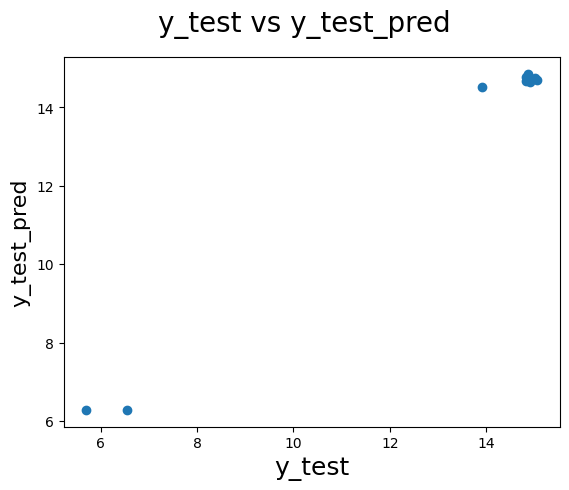

In [193]:
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                               # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label
plt.show()

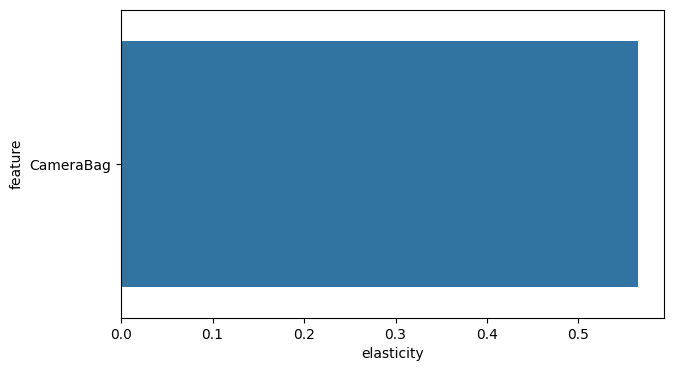

In [194]:
coefficients = pd.DataFrame(pd.DataFrame(lr.params)[1:]).reset_index()
coefficients.columns = ['feature','coefficient']
elasticity = getElasticity(X_train_lm, y_train, coefficients)

plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity.sort_values('elasticity', ascending = False))
plt.show()

#### Gaming Accessory

In [195]:
gamingAcc_final.head()

order_week  Month  Year  adStock_TV  adStock_Digital  adStock_Sponsorship  \
0          27      7  2015    0.053833         0.633253             1.853567   
1          28      7  2015    0.080749         0.949880             2.780351   
2          29      7  2015    0.094207         1.108193             3.243743   
3          30      7  2015    0.100936         1.187350             3.475439   
4          31      8  2015    0.052078         0.913194             2.003552   

   adStock_Content Marketing  adStock_Online marketing  adStock_ Affiliates  \
0                   0.000233                  0.331819             0.136813   
1                   0.000350                  0.497729             0.205220   
2                   0.000408                  0.580684             0.239424   
3                   0.000437                  0.622161             0.256525   
4                   0.000220                  0.343392             0.146684   

   adStock_SEM  ...  GamingChargingStation  GamingHeadset  GamingKeyboard  \
0     1.255924  ...                    0.0            2.0             1.0   
1     1.883887  ...                    0.0          177.0           424.0   
2     2.197868  ...                    0.0          179.0           161.0   
3     2.354858  ...                    0.0          280.0           170.0   
4     1.805811  ...                    0.0          424.0            71.0   

   GamingMemoryCard  GamingMouse  GamingMousePad  GamingSpeaker  \
0               0.0          3.0             1.0            0.0   
1              36.0        964.0            53.0            0.0   
2              27.0        356.0            48.0            0.0   
3              28.0        447.0            67.0            0.0   
4              11.0        232.0            39.0            1.0   

   JoystickGamingWheel  MotionController  TVOutCableAccessory  
0                  0.0               0.0                  0.0  
1                 11.0              16.0                 73.0  
2                  8.0              11.0                 92.0  
3                  9.0              11.0                 93.0  
4                 16.0               8.0                 79.0  

[5 rows x 43 columns]

In [196]:
# Replacing '0' values with '0.000001' in order to avoide null values after performing the log transform of the dataset
# Performing log transformation of the dataset & dropping the features which not in control of the company
gamingAcc_model2 = np.log(gamingAcc_final.replace(0.0, 0.000001).drop(['selling_price','units','product_mrp','total_transactions'], axis = 1))

#Test-train split
df_train, df_test = train_test_split(gamingAcc_model2, train_size = 0.8, test_size = 0.2, random_state = 100)

# Assigning the X_train, X_test, y_train & y_test values
y_train = df_train.pop('gmv')
X_train = df_train

y_test = df_test.pop('gmv')
X_test = df_test

# Scaling all the numerical values
scaler = MinMaxScaler()
num_cols = ['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holidays',
       'total_special_sale_days',
       'total_pay_days',
       'CoolingPad', 'GameControlMount', 'GamePad', 'GamingAccessoryKit',
       'GamingAdapter', 'GamingChargingStation', 'GamingHeadset',
       'GamingKeyboard', 'GamingMemoryCard', 'GamingMouse', 'GamingMousePad',
       'GamingSpeaker', 'JoystickGamingWheel', 'MotionController',
       'TVOutCableAccessory']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [197]:
# Executing RFE by limiting the features to 20
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

# top 20 features selected by RFE
cols = X_train.columns[rfe.support_]

# Creating X_train_rfe dataframe with RFE selected features
X_train_rfe = X_train[cols]

In [198]:
# Adding a constant
X_train_lm = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2848.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.11e-31
Time:                        17:25:19   Log-Likelihood:                 82.743
No. Observations:                  42   AIC:                            -123.5
Df Residuals:                      21   BIC:                            -87.00
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                      const  1.856963e+11
5   adStock_Online marketing  2.637698e+04
6        adStock_ Affiliates  2.401762e+04
10   total_premiumn_products  1.377050e+03
12        GamingAccessoryKit  9.682900e+02

In [199]:
# Removing the feature with higher p-value
X_train_v2 = X_train_rfe.drop(["GamingMousePad"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v2)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3127.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           2.03e-33
Time:                        17:25:20   Log-Likelihood:                 82.648
No. Observations:                  42   AIC:                            -125.3
Df Residuals:                      22   BIC:                            -90.54
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                      const  1.856963e+11
5   adStock_Online marketing  2.275529e+04
6        adStock_ Affiliates  2.048793e+04
10   total_premiumn_products  1.223450e+03
12        GamingAccessoryKit  5.833700e+02

In [200]:
# Removing the feature with higher p-value
X_train_v3 = X_train_v2.drop(["adStock_Content Marketing"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v3)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3358.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           4.59e-35
Time:                        17:25:20   Log-Likelihood:                 82.079
No. Observations:                  42   AIC:                            -126.2
Df Residuals:                      23   BIC:                            -93.14
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features           VIF
0                      const  1.774573e+11
4   adStock_Online marketing  6.419610e+03
5        adStock_ Affiliates  6.346500e+03
9    total_premiumn_products  9.255200e+02
11        GamingAccessoryKit  5.321300e+02

In [201]:
# Removing the feature with higher p-value
X_train_v4 = X_train_v3.drop(["NPS"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v4)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3628.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           9.62e-37
Time:                        17:25:20   Log-Likelihood:                 81.609
No. Observations:                  42   AIC:                            -127.2
Df Residuals:                      24   BIC:                            -95.94
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features           VIF
0                      const  1.198547e+11
5        adStock_ Affiliates  4.056010e+03
4   adStock_Online marketing  3.872110e+03
8    total_premiumn_products  9.051800e+02
10        GamingAccessoryKit  5.097500e+02

In [202]:
# Removing the feature with higher p-value
X_train_v5 = X_train_v4.drop(["adStock_TV"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v5)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3776.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           3.20e-38
Time:                        17:25:20   Log-Likelihood:                 80.316
No. Observations:                  42   AIC:                            -126.6
Df Residuals:                      25   BIC:                            -97.09
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features           VIF
0                     const  1.184332e+11
3  adStock_Online marketing  2.782180e+03
4       adStock_ Affiliates  2.602440e+03
7   total_premiumn_products  8.676900e+02
9        GamingAccessoryKit  4.682100e+02

In [203]:
# Removing the feature with higher p-value
X_train_v6 = X_train_v5.drop(["GamePad"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v6)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3873.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.33e-39
Time:                        17:25:20   Log-Likelihood:                 78.671
No. Observations:                  42   AIC:                            -125.3
Df Residuals:                      26   BIC:                            -97.54
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features           VIF
0                     const  1.154458e+11
3  adStock_Online marketing  2.766180e+03
4       adStock_ Affiliates  2.585630e+03
9             GamingAdapter  3.922000e+02
8        GamingAccessoryKit  3.204400e+02

In [204]:
# Removing the feature with higher p-value
X_train_v7 = X_train_v6.drop(["GamingAccessoryKit"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v7)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4066.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           4.31e-41
Time:                        17:25:20   Log-Likelihood:                 77.454
No. Observations:                  42   AIC:                            -124.9
Df Residuals:                      27   BIC:                            -98.84
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features           VIF
0                     const  1.029488e+11
3  adStock_Online marketing  2.760250e+03
4       adStock_ Affiliates  2.581500e+03
8             GamingAdapter  3.798300e+02
7   total_premiumn_products  2.157000e+02

In [205]:
# Removing the feature with higher p-value
X_train_v8 = X_train_v7.drop(["GamingMouse"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v8)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4312.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.29e-42
Time:                        17:25:20   Log-Likelihood:                 76.366
No. Observations:                  42   AIC:                            -124.7
Df Residuals:                      28   BIC:                            -100.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features           VIF
0                     const  1.029488e+11
3  adStock_Online marketing  2.681250e+03
4       adStock_ Affiliates  2.550000e+03
8             GamingAdapter  3.687700e+02
7   total_premiumn_products  1.992200e+02

In [206]:
# Removing the feature with higher p-value
X_train_v9 = X_train_v8.drop(["TVOutCableAccessory"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v9)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4529.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           4.67e-44
Time:                        17:25:20   Log-Likelihood:                 74.981
No. Observations:                  42   AIC:                            -124.0
Df Residuals:                      29   BIC:                            -101.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features           VIF
0                     const  1.000555e+11
3  adStock_Online marketing  2.600460e+03
4       adStock_ Affiliates  2.477960e+03
8             GamingAdapter  2.086600e+02
7   total_premiumn_products  1.918400e+02

In [207]:
# Removing the feature with higher p-value
X_train_v10 = X_train_v9.drop(["adStock_Sponsorship"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v10)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4777.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.74e-45
Time:                        17:25:21   Log-Likelihood:                 73.562
No. Observations:                  42   AIC:                            -123.1
Df Residuals:                      30   BIC:                            -102.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features           VIF
0                     const  7.918765e+10
3       adStock_ Affiliates  1.823460e+03
2  adStock_Online marketing  1.804470e+03
7             GamingAdapter  2.043500e+02
6   total_premiumn_products  1.918300e+02

In [208]:
# Removing the feature with higher p-value
X_train_v11 = X_train_v10.drop(["MotionController"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v11)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5130.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           5.51e-47
Time:                        17:25:21   Log-Likelihood:                 72.371
No. Observations:                  42   AIC:                            -122.7
Df Residuals:                      31   BIC:                            -103.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features           VIF
0                     const  7.627208e+10
2  adStock_Online marketing  1.520370e+03
3       adStock_ Affiliates  1.500640e+03
6   total_premiumn_products  1.802400e+02
7             GamingAdapter  1.313200e+02

In [209]:
# Removing the feature with higher p-value
X_train_v12= X_train_v11.drop(["adStock_ Affiliates"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v12)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5638.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.38e-48
Time:                        17:25:21   Log-Likelihood:                 71.473
No. Observations:                  42   AIC:                            -122.9
Df Residuals:                      32   BIC:                            -105.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features           VIF
0                    const  6.544218e+10
5  total_premiumn_products  1.731000e+02
6            GamingAdapter  7.573000e+01
1                     Year  6.942000e+01
3            adStock_Radio  6.673000e+01

In [210]:
# Removing the feature with higher p-value
X_train_v13= X_train_v12.drop(["GamingAdapter"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v13)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     6379.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           2.47e-50
Time:                        17:25:21   Log-Likelihood:                 70.948
No. Observations:                  42   AIC:                            -123.9
Df Residuals:                      33   BIC:                            -108.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features           VIF
0                    const  6.388220e+10
5  total_premiumn_products  9.821000e+01
1                     Year  6.776000e+01
3            adStock_Radio  6.499000e+01
7           GamingKeyboard  2.812000e+01

In [211]:
# Removing the feature with higher p-value
X_train_v14= X_train_v13.drop(["adStock_Online marketing"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v14)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     6875.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.23e-51
Time:                        17:25:21   Log-Likelihood:                 69.091
No. Observations:                  42   AIC:                            -122.2
Df Residuals:                      34   BIC:                            -108.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    5

Features           VIF
0                    const  6.340999e+10
4  total_premiumn_products  7.900000e+01
1                     Year  6.726000e+01
2            adStock_Radio  6.493000e+01
6           GamingKeyboard  2.398000e+01

In [212]:
# Removing the feature with higher p-value
X_train_v15= X_train_v14.drop(["total_premiumn_products"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v15)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     859.5
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.79e-36
Time:                        17:25:21   Log-Likelihood:                 21.707
No. Observations:                  42   AIC:                            -29.41
Df Residuals:                      35   BIC:                            -17.25
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.131e+04   5

Features           VIF
0                const  5.034261e+10
2        adStock_Radio  5.407000e+01
1                 Year  5.340000e+01
5       GamingKeyboard  7.420000e+00
6  JoystickGamingWheel  6.210000e+00

In [213]:
# Removing the feature with higher p-value
X_train_v16= X_train_v15.drop(["adStock_Radio"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v16)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     795.3
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           8.91e-36
Time:                        17:25:21   Log-Likelihood:                 15.703
No. Observations:                  42   AIC:                            -19.41
Df Residuals:                      36   BIC:                            -8.979
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2914.4564    

Features           VIF
0                const  1.257771e+09
4       GamingKeyboard  7.420000e+00
5  JoystickGamingWheel  6.120000e+00
3        GamingHeadset  4.440000e+00
2             discount  1.570000e+00

In [214]:
# Removing the feature with higher p-value
X_train_v17= X_train_v16.drop(["GamingKeyboard"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v17)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     240.5
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           6.25e-26
Time:                        17:25:21   Log-Likelihood:                -14.075
No. Observations:                  42   AIC:                             38.15
Df Residuals:                      37   BIC:                             46.84
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2299.2429   1

Features           VIF
0                const  1.253406e+09
4  JoystickGamingWheel  3.440000e+00
3        GamingHeadset  3.340000e+00
1                 Year  1.330000e+00
2             discount  1.290000e+00

In [215]:
# Removing the feature with higher p-value
X_train_v18= X_train_v17.drop(["discount"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v18)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     329.2
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           3.16e-27
Time:                        17:25:21   Log-Likelihood:                -14.078
No. Observations:                  42   AIC:                             36.16
Df Residuals:                      38   BIC:                             43.11
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2242.9711   1

Features           VIF
0                const  1.071376e+09
3  JoystickGamingWheel  3.210000e+00
2        GamingHeadset  3.180000e+00
1                 Year  1.140000e+00

In [216]:
# Removing the feature with higher p-value
X_train_v19= X_train_v18.drop(["Year"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v19)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     486.2
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           2.69e-28
Time:                        17:25:21   Log-Likelihood:                -14.918
No. Observations:                  42   AIC:                             35.84
Df Residuals:                      39   BIC:                             41.05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   6.1255    

Features    VIF
0                const  38.25
1        GamingHeadset   3.16
2  JoystickGamingWheel   3.16

After multiple iterations of fine-tuning the model with manual feature eliminations, we have reached a stable & statistically significant model where the p-values & VIFs of all the features are within the acceptable range. Hence, we can consider this as our FINAL Multiplicative model.

In [217]:
# Model Evaluation
# preparing the X-test data features for model Evaluation & Predictions
X_test = X_test[X_train_lm.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)

# Making predictions using the final model
y_test_pred = lr.predict(X_test)

r2_score(y_test, y_test_pred)

0.9440955085036055

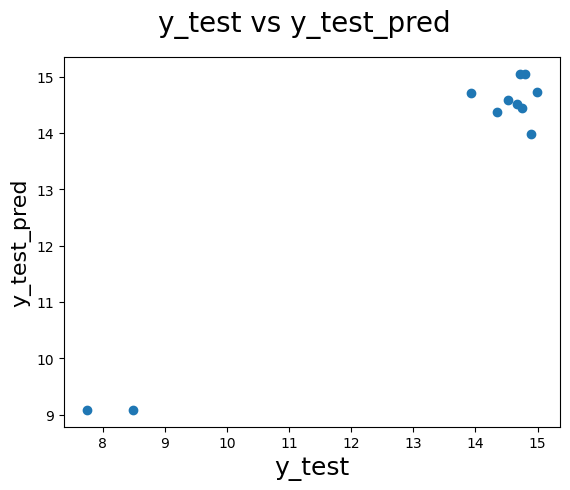

In [218]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                               # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label
plt.show()

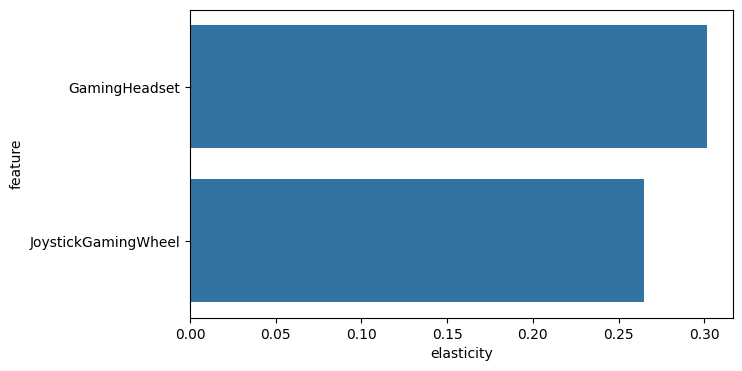

In [219]:
# Check elastivity
coefficients = pd.DataFrame(pd.DataFrame(lr.params)[1:]).reset_index()
coefficients.columns = ['feature','coefficient']
elasticity = getElasticity(X_train_lm, y_train, coefficients)

plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity.sort_values('elasticity', ascending = False))
plt.show()

#### Home Audio

In [220]:
homeAudio_final.head()

order_week  Month  Year  adStock_TV  adStock_Digital  adStock_Sponsorship  \
0          27      7  2015    0.053833         0.633253             1.853567   
1          28      7  2015    0.080749         0.949880             2.780351   
2          29      7  2015    0.094207         1.108193             3.243743   
3          30      7  2015    0.100936         1.187350             3.475439   
4          31      8  2015    0.052078         0.913194             2.003552   

   adStock_Content Marketing  adStock_Online marketing  adStock_ Affiliates  \
0                   0.000233                  0.331819             0.136813   
1                   0.000350                  0.497729             0.205220   
2                   0.000408                  0.580684             0.239424   
3                   0.000437                  0.622161             0.256525   
4                   0.000220                  0.343392             0.146684   

   adStock_SEM  ...  BoomBox  DJController  Dock  DockingStation  FMRadio  \
0     1.255924  ...      4.0           0.0   0.0             0.0      2.0   
1     1.883887  ...     59.0           0.0  29.0             1.0    478.0   
2     2.197868  ...     57.0           0.0  42.0             1.0    532.0   
3     2.354858  ...     65.0           0.0  46.0             0.0    509.0   
4     1.805811  ...     37.0           0.0  37.0             0.0    372.0   

   HiFiSystem  HomeAudioSpeaker  SlingBox  SoundMixer  VoiceRecorder  
0         0.0              26.0       0.0         0.0            0.0  
1        13.0            1276.0       0.0         0.0           25.0  
2        27.0            1507.0       0.0         0.0           26.0  
3        20.0            1331.0       0.0         0.0           22.0  
4        11.0             936.0       0.0         0.0           16.0  

[5 rows x 38 columns]

In [221]:
# Replacing '0' values with '0.000001' in order to avoide null values after performing the log transform of the dataset
# Performing log transformation of the dataset & dropping the features which not in control of the company
homeAudio_model2 = np.log(homeAudio_final.replace(0.0, 0.000001).drop(['selling_price','units','product_mrp','total_transactions'], axis = 1))

#Test-train split
df_train, df_test = train_test_split(homeAudio_model2, train_size = 0.8, test_size = 0.2, random_state = 100)

# Assigning the X_train, X_test, y_train & y_test values
y_train = df_train.pop('gmv')
X_train = df_train

y_test = df_test.pop('gmv')
X_test = df_test

# Scaling all the numerical values
scaler = MinMaxScaler()
num_cols = ['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holidays',
       'total_special_sale_days',
       'total_pay_days', 'BoomBox',
       'DJController', 'Dock', 'DockingStation', 'FMRadio', 'HiFiSystem',
       'HomeAudioSpeaker', 'SlingBox', 'SoundMixer', 'VoiceRecorder']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [222]:
# Executing RFE by limiting the features to 20
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

# top 20 features selected by RFE
cols = X_train.columns[rfe.support_]

# Creating X_train_rfe dataframe with RFE selected features
X_train_rfe = X_train[cols]

In [223]:
# Adding a constant
X_train_lm = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2688.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.08e-28
Time:                        17:25:22   Log-Likelihood:                 116.21
No. Observations:                  40   AIC:                            -190.4
Df Residuals:                      19   BIC:                            -155.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [224]:
# Removing the feature with higher p-value
X_train_v2 = X_train_rfe.drop(["total_premiumn_products"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v2)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2973.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.97e-30
Time:                        17:25:22   Log-Likelihood:                 116.18
No. Observations:                  40   AIC:                            -192.4
Df Residuals:                      20   BIC:                            -158.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [225]:
# Removing the feature with higher p-value
X_train_v3 = X_train_v2.drop(["adStock_Content Marketing"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v3)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3284.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           3.47e-32
Time:                        17:25:22   Log-Likelihood:                 116.11
No. Observations:                  40   AIC:                            -194.2
Df Residuals:                      21   BIC:                            -162.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [226]:
# Removing the feature with higher p-value
X_train_v4 = X_train_v3.drop(["Dock"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v4)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3492.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           8.91e-34
Time:                        17:25:23   Log-Likelihood:                 115.26
No. Observations:                  40   AIC:                            -194.5
Df Residuals:                      22   BIC:                            -164.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [227]:
# Removing the feature with higher p-value
X_train_v5 = X_train_v4.drop(["VoiceRecorder"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v5)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3787.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.83e-35
Time:                        17:25:23   Log-Likelihood:                 114.79
No. Observations:                  40   AIC:                            -195.6
Df Residuals:                      23   BIC:                            -166.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [228]:
# Removing the feature with higher p-value
X_train_v6 = X_train_v5.drop(["BoomBox"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v6)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4129.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           3.52e-37
Time:                        17:25:23   Log-Likelihood:                 114.37
No. Observations:                  40   AIC:                            -196.7
Df Residuals:                      24   BIC:                            -169.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [229]:
# Removing the feature with higher p-value
X_train_v7 = X_train_v6.drop(["adStock_Online marketing"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v7)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4144.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.90e-38
Time:                        17:25:23   Log-Likelihood:                 112.25
No. Observations:                  40   AIC:                            -194.5
Df Residuals:                      25   BIC:                            -169.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -6074.6555   1

In [230]:
# Removing the feature with higher p-value
X_train_v8 = X_train_v7.drop(["HiFiSystem"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v8)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4074.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.48e-39
Time:                        17:25:23   Log-Likelihood:                 109.64
No. Observations:                  40   AIC:                            -191.3
Df Residuals:                      26   BIC:                            -167.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -7030.3990   1

In [231]:
# Removing the feature with higher p-value
X_train_v9 = X_train_v8.drop(["adStock_Radio"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v9)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4172.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           7.51e-41
Time:                        17:25:23   Log-Likelihood:                 107.77
No. Observations:                  40   AIC:                            -189.5
Df Residuals:                      27   BIC:                            -167.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -6960.7911   1

In [232]:
# Removing the feature with higher p-value
X_train_v10 = X_train_v9.drop(["NPS"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v10)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4546.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.79e-42
Time:                        17:25:23   Log-Likelihood:                 107.02
No. Observations:                  40   AIC:                            -190.0
Df Residuals:                      28   BIC:                            -169.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -7728.9955   1

In [233]:
# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

Features           VIF
0                const  1.122714e+11
1                 Year  1.190600e+02
7        adStock_Other  1.185600e+02
5  adStock_ Affiliates  3.985000e+01
2           adStock_TV  3.729000e+01

In [234]:
# Removing the feature with higher p-value
X_train_v11 = X_train_v10.drop(["Year"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v11)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1771.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.35e-37
Time:                        17:25:23   Log-Likelihood:                 85.577
No. Observations:                  40   AIC:                            -149.2
Df Residuals:                      29   BIC:                            -130.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  11.2429    

In [235]:
# Removing the feature with higher p-value
X_train_v12 = X_train_v11.drop(["adStock_SEM"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v12)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2028.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           3.05e-39
Time:                        17:25:23   Log-Likelihood:                 85.503
No. Observations:                  40   AIC:                            -151.0
Df Residuals:                      30   BIC:                            -134.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  11.2376    

In [236]:
# Removing the feature with higher p-value
X_train_v13 = X_train_v12.drop(["adStock_Sponsorship"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v13)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2353.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           6.24e-41
Time:                        17:25:23   Log-Likelihood:                 85.458
No. Observations:                  40   AIC:                            -152.9
Df Residuals:                      31   BIC:                            -137.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  11.2381    

In [237]:
# Removing the feature with higher p-value
X_train_v14 = X_train_v13.drop(["adStock_TV"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v14)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2759.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.25e-42
Time:                        17:25:23   Log-Likelihood:                 85.338
No. Observations:                  40   AIC:                            -154.7
Df Residuals:                      32   BIC:                            -141.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  11.2376    

In [238]:
# Removing the feature with higher p-value
X_train_v15 = X_train_v14.drop(["adStock_Digital"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v15)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     3278.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           2.53e-44
Time:                        17:25:23   Log-Likelihood:                 85.089
No. Observations:                  40   AIC:                            -156.2
Df Residuals:                      33   BIC:                            -144.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  11.2350    

In [239]:
# Removing the feature with higher p-value
X_train_v16 = X_train_v15.drop(["adStock_Other"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v16)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     3801.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.12e-45
Time:                        17:25:23   Log-Likelihood:                 83.809
No. Observations:                  40   AIC:                            -155.6
Df Residuals:                      34   BIC:                            -145.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  11.2417    

In [240]:
# Removing the feature with higher p-value
X_train_v17 = X_train_v16.drop(["adStock_ Affiliates"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v17)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     4593.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           4.47e-47
Time:                        17:25:23   Log-Likelihood:                 82.552
No. Observations:                  40   AIC:                            -155.1
Df Residuals:                      35   BIC:                            -146.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               11.2400      0.030  

In [241]:
# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

Features    VIF
0             const  33.88
2           FMRadio  12.27
3  HomeAudioSpeaker   7.45
1               sla   3.36
4        SoundMixer   1.14

In [242]:
# Removing the feature with higher p-value
X_train_v18 = X_train_v17.drop(["FMRadio"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v18)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     2587.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           4.43e-42
Time:                        17:25:23   Log-Likelihood:                 64.811
No. Observations:                  40   AIC:                            -121.6
Df Residuals:                      36   BIC:                            -114.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               11.3050      0.044  

In [243]:
# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

Features    VIF
0             const  30.74
1               sla   1.46
2  HomeAudioSpeaker   1.37
3        SoundMixer   1.08

After multiple iterations of fine-tuning the model with manual feature eliminations, we have reached a stable & statistically significant model where the p-values & VIFs of all the features are within the acceptable range. Hence, we can consider this as our FINAL Multiplicative model.

In [244]:
# Model Evaluation
X_test = X_test[X_train_lm.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)

# Making predictions using the final model
y_test_pred = lr.predict(X_test)

r2_score(y_test, y_test_pred)

0.9938707777120128

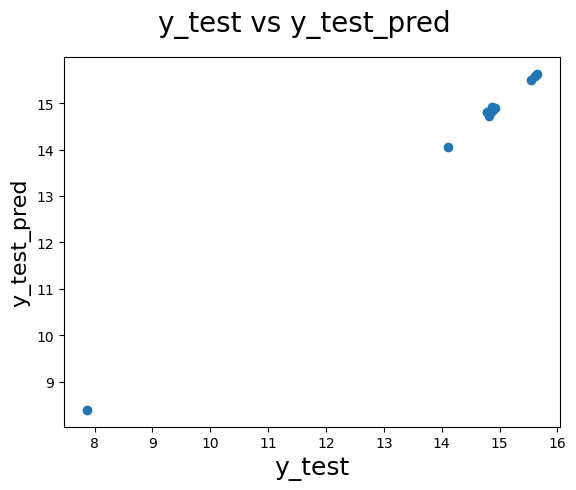

In [245]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                               # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label
plt.show()

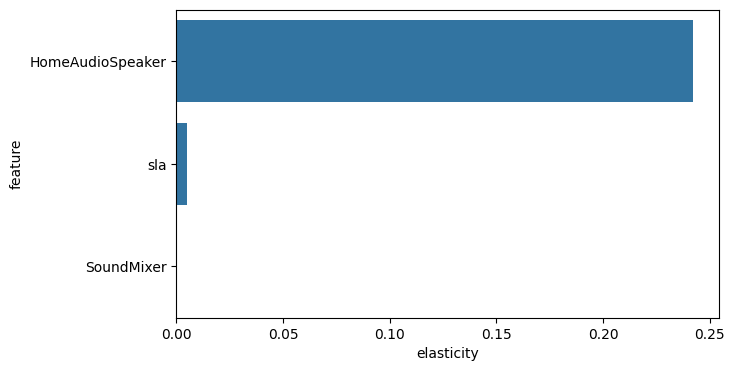

In [246]:
# Check elastificty
coefficients = pd.DataFrame(pd.DataFrame(lr.params)[1:]).reset_index()
coefficients.columns = ['feature','coefficient']
elasticity = getElasticity(X_train_lm, y_train, coefficients)
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity.sort_values('elasticity', ascending = False))
plt.show()

### Distributed Lag Model

In [247]:
# Function to create features for the Distributed Lag Model
def getDistributedLagFeatures(df):
    df['adStock_TV_lag1'] = df['adStock_TV'].shift(1)
    df['adStock_TV_lag2'] = df['adStock_TV'].shift(2)
    df['adStock_TV_lag3'] = df['adStock_TV'].shift(3)

    df['adStock_Digital_lag1'] = df['adStock_Digital'].shift(1)
    df['adStock_Digital_lag2'] = df['adStock_Digital'].shift(2)
    df['adStock_Digital_lag3'] = df['adStock_Digital'].shift(3)

    df['adStock_Sponsorship_lag1'] = df['adStock_Sponsorship'].shift(1)
    df['adStock_Sponsorship_lag2'] = df['adStock_Sponsorship'].shift(2)
    df['adStock_Sponsorship_lag3'] = df['adStock_Sponsorship'].shift(3)

    df['adStock_Content Marketing_lag1'] = df['adStock_Content Marketing'].shift(1)
    df['adStock_Content Marketing_lag2'] = df['adStock_Content Marketing'].shift(2)
    df['adStock_Content Marketing_lag3'] = df['adStock_Content Marketing'].shift(3)

    df['adStock_Online marketing_lag1'] = df['adStock_Online marketing'].shift(1)
    df['adStock_Online marketing_lag2'] = df['adStock_Online marketing'].shift(2)
    df['adStock_Online marketing_lag3'] = df['adStock_Online marketing'].shift(3)

    df['adStock_ Affiliates_lag1'] = df['adStock_ Affiliates'].shift(1)
    df['adStock_ Affiliates_lag2'] = df['adStock_ Affiliates'].shift(2)
    df['adStock_ Affiliates_lag3'] = df['adStock_ Affiliates'].shift(3)

    df['adStock_SEM_lag1'] = df['adStock_SEM'].shift(1)
    df['adStock_SEM_lag2'] = df['adStock_SEM'].shift(2)
    df['adStock_SEM_lag3'] = df['adStock_SEM'].shift(3)

    df['adStock_Other_lag1'] = df['adStock_Other'].shift(1)
    df['adStock_Other_lag2'] = df['adStock_Other'].shift(2)
    df['adStock_Other_lag3'] = df['adStock_Other'].shift(3)

    df['gmv_lag1'] = df['gmv'].shift(1)
    df['gmv_lag2'] = df['gmv'].shift(2)
    df['gmv_lag3'] = df['gmv'].shift(3)

    df['sla_lag1'] = df['sla'].shift(1)
    df['sla_lag2'] = df['sla'].shift(2)
    df['sla_lag3'] = df['sla'].shift(3)

    df['product_procurement_sla_lag1'] = df['product_procurement_sla'].shift(1)
    df['product_procurement_sla_lag2'] = df['product_procurement_sla'].shift(2)
    df['product_procurement_sla_lag3'] = df['product_procurement_sla'].shift(3)

    df['discount_lag1'] = df['discount'].shift(1)
    df['discount_lag2'] = df['discount'].shift(2)
    df['discount_lag3'] = df['discount'].shift(3)

    df['NPS_lag1'] = df['NPS'].shift(1)
    df['NPS_lag2'] = df['NPS'].shift(2)
    df['NPS_lag3'] = df['NPS'].shift(3)


    return df.fillna(0)

#### Camera Accessory

In [248]:
# Adding the lagged features
cameraAcc_model3 = getDistributedLagFeatures(cameraAcc_final)
cameraAcc_model3.head()

order_week  Month  Year  adStock_TV  adStock_Digital  adStock_Sponsorship  \
0          27      7  2015    0.053833         0.633253             1.853567   
1          28      7  2015    0.080749         0.949880             2.780351   
2          29      7  2015    0.094207         1.108193             3.243743   
3          30      7  2015    0.100936         1.187350             3.475439   
4          31      8  2015    0.052078         0.913194             2.003552   

   adStock_Content Marketing  adStock_Online marketing  adStock_ Affiliates  \
0                   0.000233                  0.331819             0.136813   
1                   0.000350                  0.497729             0.205220   
2                   0.000408                  0.580684             0.239424   
3                   0.000437                  0.622161             0.256525   
4                   0.000220                  0.343392             0.146684   

   adStock_SEM  ...  sla_lag3  product_procurement_sla_lag1  \
0     1.255924  ...  0.000000                      0.000000   
1     1.883887  ...  0.000000                      2.960000   
2     2.197868  ...  0.000000                      2.740145   
3     2.354858  ...  2.280000                      2.763449   
4     1.805811  ...  7.154612                      2.831400   

   product_procurement_sla_lag2  product_procurement_sla_lag3  discount_lag1  \
0                      0.000000                      0.000000       0.000000   
1                      0.000000                      0.000000       0.525600   
2                      2.960000                      0.000000       0.465201   
3                      2.740145                      2.960000       0.468001   
4                      2.763449                      2.740145       0.459985   

   discount_lag2  discount_lag3   NPS_lag1   NPS_lag2   NPS_lag3  
0       0.000000       0.000000   0.000000   0.000000   0.000000  
1       0.000000       0.000000  54.599588   0.000000   0.000000  
2       0.525600       0.000000  54.599588  54.599588   0.000000  
3       0.465201       0.525600  54.599588  54.599588  54.599588  
4       0.468001       0.465201  54.599588  54.599588  54.599588  

[5 rows x 89 columns]

In [249]:
# dropping the features which are not in control of the company
cameraAcc_model3 = cameraAcc_model3.drop(['selling_price','units','product_mrp','total_transactions'], axis = 1)

#Test-train split
df_train, df_test = train_test_split(cameraAcc_model3, train_size = 0.8, test_size = 0.2, random_state = 100)

# Assigning the X_train, X_test, y_train & y_test values
y_train = df_train.pop('gmv')
X_train = df_train

y_test = df_test.pop('gmv')
X_test = df_test

cameraAcc_model3.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'NPS', 'discount', 'total_premiumn_products',
       'total_holidays', 'is_holiday', 'total_special_sale_days',
       'is_special_sale_day', 'total_pay_days', 'is_pay_day', 'Binoculars',
       'CameraAccessory', 'CameraBag', 'CameraBattery', 'CameraBatteryCharger',
       'CameraBatteryGrip', 'CameraEyeCup', 'CameraFilmRolls', 'CameraHousing',
       'CameraMicrophone', 'CameraMount', 'CameraRemoteControl',
       'CameraTripod', 'ExtensionTube', 'Filter', 'Flash', 'FlashShoeAdapter',
       'Lens', 'ReflectorUmbrella', 'Softbox', 'Strap', 'Telescope',
       'adStock_TV_lag1', 'adStock_TV_lag2', 'adStock_TV_lag3',
       'adStock_Digital_lag1', 'adStock_Digital_lag2', 'adStock_Digital_lag3',
    

In [250]:
# Scaling all the numerical values
scaler = MinMaxScaler()
num_cols = ['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holidays',
       'total_special_sale_days',
       'total_pay_days',
       'Binoculars', 'CameraAccessory', 'CameraBag', 'CameraBattery',
       'CameraBatteryCharger', 'CameraBatteryGrip', 'CameraEyeCup',
       'CameraFilmRolls', 'CameraHousing', 'CameraMicrophone', 'CameraMount',
       'CameraRemoteControl', 'CameraTripod', 'ExtensionTube', 'Filter',
       'Flash', 'FlashShoeAdapter', 'Lens', 'ReflectorUmbrella', 'Softbox',
       'Strap', 'Telescope', 'adStock_TV_lag1', 'adStock_TV_lag2',
       'adStock_TV_lag3', 'adStock_Digital_lag1', 'adStock_Digital_lag2',
       'adStock_Digital_lag3', 'adStock_Sponsorship_lag1',
       'adStock_Sponsorship_lag2', 'adStock_Sponsorship_lag3',
       'adStock_Content Marketing_lag1', 'adStock_Content Marketing_lag2',
       'adStock_Content Marketing_lag3', 'adStock_Online marketing_lag1',
       'adStock_Online marketing_lag2', 'adStock_Online marketing_lag3',
       'adStock_ Affiliates_lag1', 'adStock_ Affiliates_lag2',
       'adStock_ Affiliates_lag3', 'adStock_SEM_lag1', 'adStock_SEM_lag2',
       'adStock_SEM_lag3', 'adStock_Other_lag1', 'adStock_Other_lag2',
       'adStock_Other_lag3', 'gmv_lag1', 'gmv_lag2', 'gmv_lag3', 'sla_lag1',
       'sla_lag2', 'sla_lag3', 'product_procurement_sla_lag1',
       'product_procurement_sla_lag2', 'product_procurement_sla_lag3',
       'discount_lag1', 'discount_lag2', 'discount_lag3', 'NPS_lag1',
       'NPS_lag2', 'NPS_lag3']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [251]:
# Executing RFE by limiting the features to 20
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

# top 20 features selected by RFE
cols = X_train.columns[rfe.support_]

# Creating X_train_rfe dataframe with RFE selected features
X_train_rfe = X_train[cols]

In [252]:
# Adding a constant
X_train_lm = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     431.1
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           3.99e-22
Time:                        17:25:26   Log-Likelihood:                -500.32
No. Observations:                  41   AIC:                             1043.
Df Residuals:                      20   BIC:                             1079.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [253]:
# Removing the feature with higher p-value
X_train_v2 = X_train_rfe.drop(["adStock_Digital"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v2)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     411.4
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           8.28e-23
Time:                        17:25:26   Log-Likelihood:                -503.32
No. Observations:                  41   AIC:                             1047.
Df Residuals:                      21   BIC:                             1081.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [254]:
# Removing the feature with higher p-value
X_train_v3 = X_train_v2.drop(["adStock_Other_lag2"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v3)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     404.3
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.38e-23
Time:                        17:25:26   Log-Likelihood:                -505.74
No. Observations:                  41   AIC:                             1049.
Df Residuals:                      22   BIC:                             1082.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [255]:
# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

Features     VIF
0          const  117.60
10          Lens   23.30
8         Filter   22.25
7   CameraTripod   13.18
9          Flash   12.08

In [256]:
# Removing the feature with higher p-value
X_train_v4 = X_train_v3.drop(["Lens"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v4)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     365.7
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           6.39e-24
Time:                        17:25:26   Log-Likelihood:                -509.86
No. Observations:                  41   AIC:                             1056.
Df Residuals:                      23   BIC:                             1087.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [257]:
# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

Features     VIF
0            const  116.47
7     CameraTripod   12.86
9            Flash   11.84
2         discount   10.61
4  CameraFilmRolls    7.85

In [258]:
# Removing the feature with higher p-value
X_train_v5 = X_train_v4.drop(["CameraTripod"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v5)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     184.9
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           3.53e-21
Time:                        17:25:27   Log-Likelihood:                -525.87
No. Observations:                  41   AIC:                             1086.
Df Residuals:                      24   BIC:                             1115.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [259]:
# Removing the feature with higher p-value
X_train_v6 = X_train_v5.drop(["discount"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v6)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     201.4
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           3.06e-22
Time:                        17:25:27   Log-Likelihood:                -526.27
No. Observations:                  41   AIC:                             1085.
Df Residuals:                      25   BIC:                             1112.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [260]:
# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

Features    VIF
0            const  40.63
3  CameraFilmRolls   6.79
7            Flash   6.75
8        Telescope   6.39
2       Binoculars   6.11

In [261]:
# Removing the feature with higher p-value
X_train_v7 = X_train_v6.drop(["CameraFilmRolls"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v7)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     150.6
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           3.31e-21
Time:                        17:25:27   Log-Likelihood:                -534.37
No. Observations:                  41   AIC:                             1099.
Df Residuals:                      26   BIC:                             1124.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [262]:
# Removing the feature with higher p-value
X_train_v8 = X_train_v7.drop(["sla_lag3"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v8)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     159.1
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           5.24e-22
Time:                        17:25:27   Log-Likelihood:                -535.52
No. Observations:                  41   AIC:                             1099.
Df Residuals:                      27   BIC:                             1123.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [263]:
# Removing the feature with higher p-value
X_train_v9 = X_train_v8.drop(["CameraHousing"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v9)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     165.1
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.13e-22
Time:                        17:25:27   Log-Likelihood:                -537.12
No. Observations:                  41   AIC:                             1100.
Df Residuals:                      28   BIC:                             1123.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [264]:
# Removing the feature with higher p-value
X_train_v10 = X_train_v9.drop(["adStock_Other_lag3"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v10)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     170.0
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           3.03e-23
Time:                        17:25:27   Log-Likelihood:                -539.01
No. Observations:                  41   AIC:                             1102.
Df Residuals:                      29   BIC:                             1123.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [265]:
# Removing the feature with higher p-value
X_train_v11 = X_train_v10.drop(["sla_lag1"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v11)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     170.8
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.30e-23
Time:                        17:25:27   Log-Likelihood:                -541.51
No. Observations:                  41   AIC:                             1105.
Df Residuals:                      30   BIC:                             1124.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [266]:
# Removing the feature with higher p-value
X_train_v12 = X_train_v11.drop(["NPS_lag2"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v12)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     182.2
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           2.75e-24
Time:                        17:25:27   Log-Likelihood:                -543.00
No. Observations:                  41   AIC:                             1106.
Df Residuals:                      31   BIC:                             1123.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [267]:
# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

Features    VIF
0       const  38.60
2  Binoculars   5.22
5       Flash   4.21
4      Filter   4.08
6   Telescope   4.01

In [268]:
# Removing the feature with higher p-value
X_train_v13 = X_train_v12.drop(["Binoculars"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v13)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     147.5
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           4.99e-23
Time:                        17:25:28   Log-Likelihood:                -550.22
No. Observations:                  41   AIC:                             1118.
Df Residuals:                      32   BIC:                             1134.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

After multiple iterations of fine-tuning the model with manual feature eliminations, we have reached a stable & statistically significant model where the p-values & VIFs of all the features are within the acceptable range. Hence, we can consider this as our FINAL Distributed Lag model.

In [269]:
# Model Evaluation
X_test = X_test[X_train_lm.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)

# Making predictions using the final model
y_test_pred = lr.predict(X_test)

r2_score(y_test, y_test_pred)

0.745448872062274

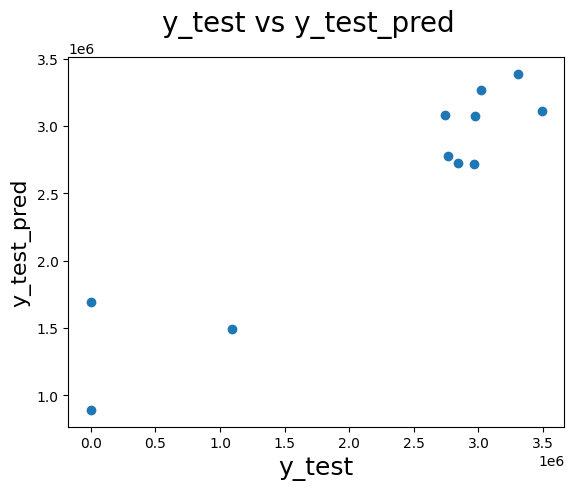

In [270]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                               # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label
plt.show()

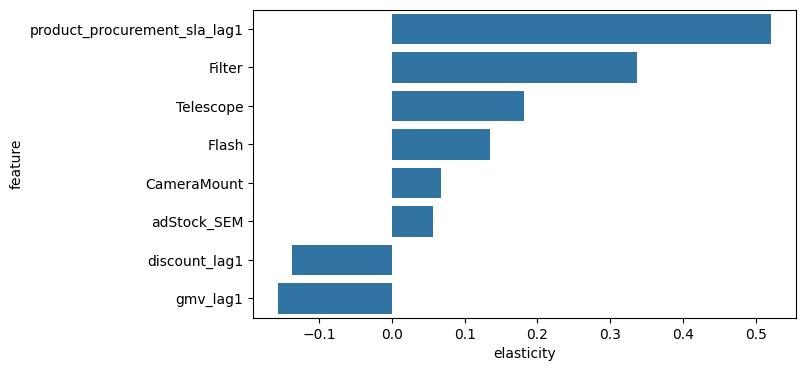

In [271]:
# Check elasticity
coefficients = pd.DataFrame(pd.DataFrame(lr.params)[1:]).reset_index()
coefficients.columns = ['feature','coefficient']
elasticity = getElasticity(X_train_lm, y_train, coefficients)

plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity.sort_values('elasticity', ascending = False))
plt.show()

#### Gaming Accessory

In [272]:
# Adding the lagged features
gamingAcc_model3 = getDistributedLagFeatures(gamingAcc_final)
gamingAcc_model3.head()

order_week  Month  Year  adStock_TV  adStock_Digital  adStock_Sponsorship  \
0          27      7  2015    0.053833         0.633253             1.853567   
1          28      7  2015    0.080749         0.949880             2.780351   
2          29      7  2015    0.094207         1.108193             3.243743   
3          30      7  2015    0.100936         1.187350             3.475439   
4          31      8  2015    0.052078         0.913194             2.003552   

   adStock_Content Marketing  adStock_Online marketing  adStock_ Affiliates  \
0                   0.000233                  0.331819             0.136813   
1                   0.000350                  0.497729             0.205220   
2                   0.000408                  0.580684             0.239424   
3                   0.000437                  0.622161             0.256525   
4                   0.000220                  0.343392             0.146684   

   adStock_SEM  ...  sla_lag3  product_procurement_sla_lag1  \
0     1.255924  ...  0.000000                      0.000000   
1     1.883887  ...  0.000000                      3.347826   
2     2.197868  ...  0.000000                      3.249432   
3     2.354858  ...  3.565217                      2.718877   
4     1.805811  ...  5.373959                      2.594230   

   product_procurement_sla_lag2  product_procurement_sla_lag3  discount_lag1  \
0                      0.000000                      0.000000       0.000000   
1                      0.000000                      0.000000       0.330000   
2                      3.347826                      0.000000       0.422820   
3                      3.249432                      3.347826       0.452880   
4                      2.718877                      3.249432       0.400047   

   discount_lag2  discount_lag3   NPS_lag1   NPS_lag2   NPS_lag3  
0        0.00000        0.00000   0.000000   0.000000   0.000000  
1        0.00000        0.00000  54.599588   0.000000   0.000000  
2        0.33000        0.00000  54.599588  54.599588   0.000000  
3        0.42282        0.33000  54.599588  54.599588  54.599588  
4        0.45288        0.42282  54.599588  54.599588  54.599588  

[5 rows x 82 columns]

In [273]:
# dropping the features which are not in control of the company
gamingAcc_model3 = gamingAcc_model3.drop(['selling_price','units','product_mrp','total_transactions'], axis = 1)

#Test-train split
df_train, df_test = train_test_split(gamingAcc_model3, train_size = 0.8, test_size = 0.2, random_state = 100)

# Assigning the X_train, X_test, y_train & y_test values
y_train = df_train.pop('gmv')
X_train = df_train

y_test = df_test.pop('gmv')
X_test = df_test

# Scaling all the numerical values
scaler = MinMaxScaler()
num_cols = ['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holidays',
        'total_special_sale_days',
       'total_pay_days',
       'CoolingPad', 'GameControlMount', 'GamePad', 'GamingAccessoryKit',
       'GamingAdapter', 'GamingChargingStation', 'GamingHeadset',
       'GamingKeyboard', 'GamingMemoryCard', 'GamingMouse', 'GamingMousePad',
       'GamingSpeaker', 'JoystickGamingWheel', 'MotionController',
       'TVOutCableAccessory', 'adStock_TV_lag1', 'adStock_TV_lag2',
       'adStock_TV_lag3', 'adStock_Digital_lag1', 'adStock_Digital_lag2',
       'adStock_Digital_lag3', 'adStock_Sponsorship_lag1',
       'adStock_Sponsorship_lag2', 'adStock_Sponsorship_lag3',
       'adStock_Content Marketing_lag1', 'adStock_Content Marketing_lag2',
       'adStock_Content Marketing_lag3', 'adStock_Online marketing_lag1',
       'adStock_Online marketing_lag2', 'adStock_Online marketing_lag3',
       'adStock_ Affiliates_lag1', 'adStock_ Affiliates_lag2',
       'adStock_ Affiliates_lag3', 'adStock_SEM_lag1', 'adStock_SEM_lag2',
       'adStock_SEM_lag3', 'adStock_Other_lag1', 'adStock_Other_lag2',
       'adStock_Other_lag3', 'gmv_lag1', 'gmv_lag2', 'gmv_lag3', 'sla_lag1',
       'sla_lag2', 'sla_lag3', 'product_procurement_sla_lag1',
       'product_procurement_sla_lag2', 'product_procurement_sla_lag3',
       'discount_lag1', 'discount_lag2', 'discount_lag3', 'NPS_lag1',
       'NPS_lag2', 'NPS_lag3']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [274]:
# Executing RFE by limiting the features to 20
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

# top 20 features selected by RFE
cols = X_train.columns[rfe.support_]

# Creating X_train_rfe dataframe with RFE selected features
X_train_rfe = X_train[cols]

In [275]:
# Adding a constant
X_train_lm = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     192.3
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.97e-19
Time:                        17:25:31   Log-Likelihood:                -530.09
No. Observations:                  42   AIC:                             1102.
Df Residuals:                      21   BIC:                             1139.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [276]:
# Removing the feature with higher p-value
X_train_v2 = X_train_rfe.drop(["GamingMousePad"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v2)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     208.1
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.62e-20
Time:                        17:25:31   Log-Likelihood:                -530.48
No. Observations:                  42   AIC:                             1101.
Df Residuals:                      22   BIC:                             1136.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [277]:
# Removing the feature with higher p-value
X_train_v3 = X_train_v2.drop(["discount_lag2"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v3)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     224.4
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.35e-21
Time:                        17:25:31   Log-Likelihood:                -530.96
No. Observations:                  42   AIC:                             1100.
Df Residuals:                      23   BIC:                             1133.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [278]:
# Removing the feature with higher p-value
X_train_v4 = X_train_v3.drop(["adStock_ Affiliates"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v4)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     238.1
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.36e-22
Time:                        17:25:31   Log-Likelihood:                -531.81
No. Observations:                  42   AIC:                             1100.
Df Residuals:                      24   BIC:                             1131.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [279]:
# Removing the feature with higher p-value
X_train_v5 = X_train_v4.drop(["adStock_SEM_lag1"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v5)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     248.0
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.73e-23
Time:                        17:25:31   Log-Likelihood:                -533.07
No. Observations:                  42   AIC:                             1100.
Df Residuals:                      25   BIC:                             1130.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [280]:
# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

Features    VIF
7                  adStock_TV_lag3  40.64
0                            const  33.66
6                  adStock_TV_lag2  33.12
10        adStock_Sponsorship_lag3  29.78
11  adStock_Content Marketing_lag2  26.03

In [281]:
# Removing the feature with higher p-value
X_train_v6 = X_train_v5.drop(["adStock_TV_lag3"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v6)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     153.2
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.86e-21
Time:                        17:25:31   Log-Likelihood:                -545.26
No. Observations:                  42   AIC:                             1123.
Df Residuals:                      26   BIC:                             1150.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [282]:
# Removing the feature with higher p-value
X_train_v7 = X_train_v6.drop(["adStock_Digital_lag2"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v7)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     170.2
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.42e-22
Time:                        17:25:31   Log-Likelihood:                -545.30
No. Observations:                  42   AIC:                             1121.
Df Residuals:                      27   BIC:                             1147.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [283]:
# Removing the feature with higher p-value
X_train_v8 = X_train_v7.drop(["adStock_Content Marketing_lag2"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v8)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     187.7
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.19e-23
Time:                        17:25:31   Log-Likelihood:                -545.55
No. Observations:                  42   AIC:                             1119.
Df Residuals:                      28   BIC:                             1143.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [284]:
# Removing the feature with higher p-value
X_train_v9 = X_train_v8.drop(["adStock_TV_lag2"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v9)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     197.3
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           2.01e-24
Time:                        17:25:31   Log-Likelihood:                -546.91
No. Observations:                  42   AIC:                             1120.
Df Residuals:                      29   BIC:                             1142.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [285]:
# Removing the feature with higher p-value
X_train_v10 = X_train_v9.drop(["adStock_ Affiliates_lag2"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v10)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     208.4
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           3.49e-25
Time:                        17:25:32   Log-Likelihood:                -548.29
No. Observations:                  42   AIC:                             1121.
Df Residuals:                      30   BIC:                             1141.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [286]:
# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

Features    VIF
0                          const  30.99
7       adStock_Sponsorship_lag3  12.75
6       adStock_Sponsorship_lag2   9.02
10                      NPS_lag2   8.50
9   product_procurement_sla_lag2   6.52

In [287]:
# Removing the feature with higher p-value
X_train_v11 = X_train_v10.drop(["adStock_Sponsorship_lag3"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v11)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     170.4
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           3.26e-24
Time:                        17:25:32   Log-Likelihood:                -555.09
No. Observations:                  42   AIC:                             1132.
Df Residuals:                      31   BIC:                             1151.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [288]:
# Removing the feature with higher p-value
X_train_v12 = X_train_v11.drop(["adStock_Sponsorship_lag2"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v12)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     195.3
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           2.29e-25
Time:                        17:25:32   Log-Likelihood:                -555.11
No. Observations:                  42   AIC:                             1130.
Df Residuals:                      32   BIC:                             1148.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [289]:
# Removing the feature with higher p-value
X_train_v13 = X_train_v12.drop(["adStock_Content Marketing_lag3"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v13)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     224.9
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.64e-26
Time:                        17:25:32   Log-Likelihood:                -555.26
No. Observations:                  42   AIC:                             1129.
Df Residuals:                      33   BIC:                             1144.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [290]:
# Removing the feature with higher p-value
X_train_v14 = X_train_v13.drop(["product_procurement_sla_lag2"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v14)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     237.3
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           6.01e-27
Time:                        17:25:32   Log-Likelihood:                -557.53
No. Observations:                  42   AIC:                             1131.
Df Residuals:                      34   BIC:                             1145.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.301e+05   1.26e+05      1.

In [291]:
# Removing the feature with higher p-value
X_train_v15 = X_train_v14.drop(["GamingKeyboard"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v15)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     262.0
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.43e-27
Time:                        17:25:32   Log-Likelihood:                -559.25
No. Observations:                  42   AIC:                             1133.
Df Residuals:                      35   BIC:                             1145.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.247e+05   1.16e+05      1.938

In [292]:
# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

Features    VIF
0        const  21.83
5     NPS_lag2   3.21
6     NPS_lag3   3.07
3  GamingMouse   2.48
1      GamePad   2.30

After multiple iterations of fine-tuning the model with manual feature eliminations, we have reached a stable & statistically significant model where the p-values & VIFs of all the features are within the acceptable range. Hence, we can consider this as our FINAL Distributed Lag model.

In [293]:
# Model Evaluation
X_test = X_test[X_train_lm.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)

# Making predictions using the final model
y_test_pred = lr.predict(X_test)

r2_score(y_test, y_test_pred)

0.9788290634762096

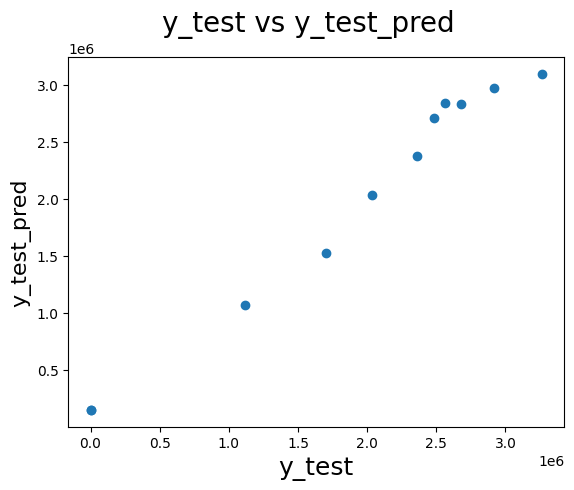

In [294]:
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                               # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label
plt.show()

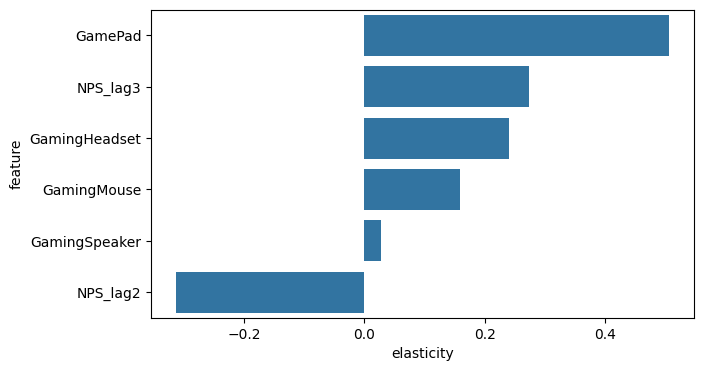

In [295]:
# Check elasticity
coefficients = pd.DataFrame(pd.DataFrame(lr.params)[1:]).reset_index()
coefficients.columns = ['feature','coefficient']
elasticity = getElasticity(X_train_lm, y_train, coefficients)

plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity.sort_values('elasticity', ascending = False))
plt.show()

#### House Audio

In [296]:
# Adding the lagged features
homeAudio_model3 = getDistributedLagFeatures(homeAudio_final)

# dropping the features which are not in control of the company
homeAudio_model3 = homeAudio_model3.drop(['selling_price','units','product_mrp','total_transactions'], axis = 1)

#Test-train split
df_train, df_test = train_test_split(homeAudio_model3, train_size = 0.8, test_size = 0.2, random_state = 100)

# Assigning the X_train, X_test, y_train & y_test values
y_train = df_train.pop('gmv')
X_train = df_train

y_test = df_test.pop('gmv')
X_test = df_test

# Scaling all the numerical values
scaler = MinMaxScaler()
num_cols = ['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holidays',
        'total_special_sale_days',
       'total_pay_days', 'BoomBox',
       'DJController', 'Dock', 'DockingStation', 'FMRadio', 'HiFiSystem',
       'HomeAudioSpeaker', 'SlingBox', 'SoundMixer', 'VoiceRecorder',
       'adStock_TV_lag1', 'adStock_TV_lag2', 'adStock_TV_lag3',
       'adStock_Digital_lag1', 'adStock_Digital_lag2', 'adStock_Digital_lag3',
       'adStock_Sponsorship_lag1', 'adStock_Sponsorship_lag2',
       'adStock_Sponsorship_lag3', 'adStock_Content Marketing_lag1',
       'adStock_Content Marketing_lag2', 'adStock_Content Marketing_lag3',
       'adStock_Online marketing_lag1', 'adStock_Online marketing_lag2',
       'adStock_Online marketing_lag3', 'adStock_ Affiliates_lag1',
       'adStock_ Affiliates_lag2', 'adStock_ Affiliates_lag3',
       'adStock_SEM_lag1', 'adStock_SEM_lag2', 'adStock_SEM_lag3',
       'adStock_Other_lag1', 'adStock_Other_lag2', 'adStock_Other_lag3',
       'gmv_lag1', 'gmv_lag2', 'gmv_lag3', 'sla_lag1', 'sla_lag2', 'sla_lag3',
       'product_procurement_sla_lag1', 'product_procurement_sla_lag2',
       'product_procurement_sla_lag3', 'discount_lag1', 'discount_lag2',
       'discount_lag3', 'NPS_lag1', 'NPS_lag2', 'NPS_lag3']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [297]:
# Executing RFE by limiting the features to 20
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

# top 20 features selected by RFE
cols = X_train.columns[rfe.support_]

# Creating X_train_rfe dataframe with RFE selected features
X_train_rfe = X_train[cols]

In [298]:
# Adding a constant
X_train_lm = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     932.9
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           2.49e-24
Time:                        17:25:33   Log-Likelihood:                -497.84
No. Observations:                  40   AIC:                             1038.
Df Residuals:                      19   BIC:                             1073.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [299]:
# Removing the feature with higher p-value
X_train_v2 = X_train_rfe.drop(["gmv_lag1"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v2)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     936.2
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           2.03e-25
Time:                        17:25:33   Log-Likelihood:                -499.82
No. Observations:                  40   AIC:                             1040.
Df Residuals:                      20   BIC:                             1073.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [300]:
# Removing the feature with higher p-value
X_train_v3 = X_train_v2.drop(["adStock_Sponsorship_lag1"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v3)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     932.5
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.88e-26
Time:                        17:25:33   Log-Likelihood:                -501.95
No. Observations:                  40   AIC:                             1042.
Df Residuals:                      21   BIC:                             1074.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [301]:
# Removing the feature with higher p-value
X_train_v4 = X_train_v3.drop(["gmv_lag3"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v4)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     872.3
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           3.69e-27
Time:                        17:25:33   Log-Likelihood:                -505.35
No. Observations:                  40   AIC:                             1047.
Df Residuals:                      22   BIC:                             1077.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [302]:
# Removing the feature with higher p-value
X_train_v5 = X_train_v4.drop(["adStock_Other_lag3"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v5)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     855.0
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           4.85e-28
Time:                        17:25:33   Log-Likelihood:                -507.85
No. Observations:                  40   AIC:                             1050.
Df Residuals:                      23   BIC:                             1078.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [303]:
# Removing the feature with higher p-value
X_train_v6 = X_train_v5.drop(["adStock_ Affiliates_lag3"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v6)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     910.0
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           2.62e-29
Time:                        17:25:33   Log-Likelihood:                -508.75
No. Observations:                  40   AIC:                             1049.
Df Residuals:                      24   BIC:                             1077.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [304]:
# Removing the feature with higher p-value
X_train_v7 = X_train_v6.drop(["adStock_TV_lag3"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v7)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1009.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           8.71e-31
Time:                        17:25:33   Log-Likelihood:                -508.89
No. Observations:                  40   AIC:                             1048.
Df Residuals:                      25   BIC:                             1073.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [305]:
# Removing the feature with higher p-value
X_train_v8 = X_train_v7.drop(["adStock_Sponsorship_lag3"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v8)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1042.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           7.17e-32
Time:                        17:25:34   Log-Likelihood:                -510.50
No. Observations:                  40   AIC:                             1049.
Df Residuals:                      26   BIC:                             1073.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [306]:
# Removing the feature with higher p-value
X_train_v9 = X_train_v8.drop(["adStock_Sponsorship"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v9)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1078.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           6.25e-33
Time:                        17:25:34   Log-Likelihood:                -512.16
No. Observations:                  40   AIC:                             1050.
Df Residuals:                      27   BIC:                             1072.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [307]:
# Removing the feature with higher p-value
X_train_v10 = X_train_v9.drop(["adStock_SEM"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v10)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1205.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           2.05e-34
Time:                        17:25:34   Log-Likelihood:                -512.40
No. Observations:                  40   AIC:                             1049.
Df Residuals:                      28   BIC:                             1069.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [308]:
# Removing the feature with higher p-value
X_train_v11 = X_train_v10.drop(["product_procurement_sla"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v11)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1277.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.54e-35
Time:                        17:25:34   Log-Likelihood:                -513.86
No. Observations:                  40   AIC:                             1050.
Df Residuals:                      29   BIC:                             1068.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [309]:
# Removing the feature with higher p-value
X_train_v12 = X_train_v11.drop(["discount"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v12)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1359.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.22e-36
Time:                        17:25:34   Log-Likelihood:                -515.39
No. Observations:                  40   AIC:                             1051.
Df Residuals:                      30   BIC:                             1068.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [310]:
# Removing the feature with higher p-value
X_train_v13 = X_train_v12.drop(["adStock_Other_lag1"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v13)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1451.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.10e-37
Time:                        17:25:34   Log-Likelihood:                -517.09
No. Observations:                  40   AIC:                             1052.
Df Residuals:                      31   BIC:                             1067.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [311]:
# Removing the feature with higher p-value
X_train_v14 = X_train_v13.drop(["adStock_Radio"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v14)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1639.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           5.08e-39
Time:                        17:25:34   Log-Likelihood:                -517.95
No. Observations:                  40   AIC:                             1052.
Df Residuals:                      32   BIC:                             1065.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [312]:
# Removing the feature with higher p-value
X_train_v15 = X_train_v14.drop(["Dock"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v15)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1809.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           4.51e-40
Time:                        17:25:34   Log-Likelihood:                -519.68
No. Observations:                  40   AIC:                             1053.
Df Residuals:                      33   BIC:                             1065.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [313]:
# Removing the feature with higher p-value
X_train_v16 = X_train_v15.drop(["sla"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v16)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     2087.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           2.90e-41
Time:                        17:25:34   Log-Likelihood:                -521.05
No. Observations:                  40   AIC:                             1054.
Df Residuals:                      34   BIC:                             1064.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [314]:
# Removing the feature with higher p-value
X_train_v17 = X_train_v16.drop(["discount_lag1"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v17)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     2536.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.42e-42
Time:                        17:25:34   Log-Likelihood:                -522.20
No. Observations:                  40   AIC:                             1054.
Df Residuals:                      35   BIC:                             1063.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [315]:
# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

Features    VIF
0                          const  11.46
3               HomeAudioSpeaker   2.68
2                        FMRadio   2.62
1       adStock_Online marketing   2.60
4  adStock_Online marketing_lag3   2.45

After multiple iterations of fine-tuning the model with manual feature eliminations, we have reached a stable & statistically significant model where the p-values & VIFs of all the features are within the acceptable range. Hence, we can consider this as our FINAL Distributed Lag model.

In [316]:
# Model Evaluation
X_test = X_test[X_train_lm.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)

# Making predictions using the final model
y_test_pred = lr.predict(X_test)

r2_score(y_test, y_test_pred)

0.9928130107508358

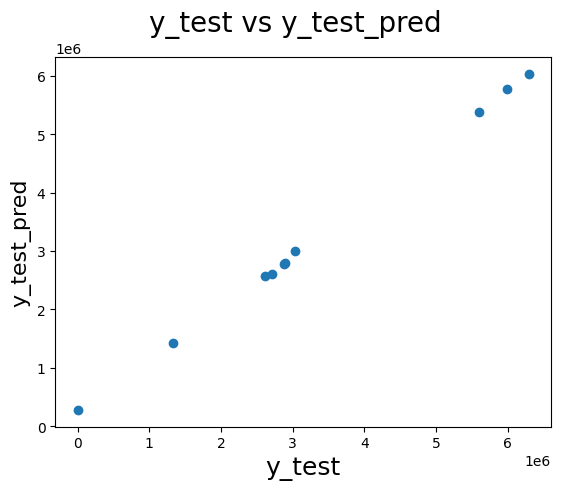

In [317]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                               # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label
plt.show()

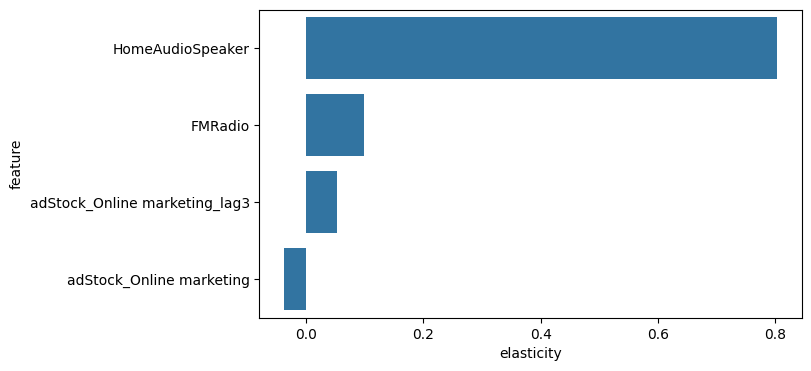

In [318]:
# Check elasticity
coefficients = pd.DataFrame(pd.DataFrame(lr.params)[1:]).reset_index()
coefficients.columns = ['feature','coefficient']
elasticity = getElasticity(X_train_lm, y_train, coefficients)

plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity.sort_values('elasticity', ascending = False))
plt.show()

## Recommendations

**Camera Accessory**

* Products - Camera Bag, Flash and Camera Battery Charger should be promoted as it has a very positive impact on the overall revenue (GMV) growth.
* Product procurement SLA should be reduced for the last 1 week.

**Gaming Accessory**

* Products like TV Out Cables, Gaming Headsets, mouse, keyboard and joysticks should be promoted
* Marketing and advertising spends on TV should be increased.
* An increase in NPS score for the last 3 weeks also contributed to the revenue growth.

**Home Audio**

* Products like Home Audio Speakers and FM Radio should be promoted as they have shown significant impact on the increment of revenue (GMV) values.
* Marketing and Advertising spends on Online Marketing channels for last 3 weeks should be increased.
* Increase in SLA didn't negatively affected the revenue growth of the company.